In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')
%config InlineBackend.figure_format='retina'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import scipy
import math
from itertools import repeat
import scipy.io as sio
from Bio import Phylo
from io import StringIO 
from itertools import repeat
import os
from matplotlib.patches import Rectangle
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors

In [2]:
# os.mkdir('figures')
# os.mkdir('figures/Main')
# os.mkdir('figures/Supp')
# os.mkdir('figures/Main/fig1')
# os.mkdir('figures/Main/fig2')
# os.mkdir('figures/Main/fig3')
# os.mkdir('figures/Main/fig4')
# os.mkdir('figures/Main/fig5')

# Targets + general

In [3]:
be_thresh = 0.26
ecmap = sns.color_palette("light:#6470b5", as_cmap=True)
bcmap = sns.color_palette("light:#9ad2ca", as_cmap=True)
mcmap = sns.color_palette("light:#8e4775", as_cmap=True)

In [4]:
all_table = pd.read_csv('data/final_table.csv', index_col=0)

targets = ['BDH2', 'TPS1', 'OM14', 'GLK1', 'HSP30', 'STP4', 'YDL124W', 'TPS2',
       'GIS1', 'CCW22', 'HXT7', 'EMI2', 'GRH1', 'GLC3', 'RGI1', 'DOT6', 'SPI1',
       'BMH1', 'HSP12', 'GSY1', 'HXK1', 'PNC1', 'STF2', 'CTT1', 'MGA1',
       'AIM17', 'RTC3', 'PAL2', 'UBX6', 'PEX2', 'UGP1', 'MCR1', 'NNR2', 'GSY2',
       'TMA10', 'TSL1', 'ISF1', 'PGM2', 'ICY1', 'TDA1', 'RAS2', 'ZWF1', 'GAC1',
       'TPO4', 'CIP1', 'HST2', 'USV1', 'NCE102', 'GPH1', 'DDR2', 'HOR7',
       'YBR085C-A', 'MEO1', 'COQ21', 'COX26']

wt_tergets_all = ['BDH2', 'HSP26', 'TPS1', 'OM14', 'GLK1', 'HSP30', 'SIT4', 'STP4',
       'MRK1', 'YDL124W', 'HNT1', 'SNF11', 'TPS2', 'GIS1', 'YDR133C', 'CCW22',
       'ADR1', 'VHS1', 'HXT7', 'EMI2', 'GRH1', 'GLC3', 'GIP2', 'RGI1', 'DOT6',
       'SPI1', 'BMH1', 'HSP12', 'MDJ1', 'GSY1', 'HXK1', 'MIG1', 'YGL036W',
       'PNC1', 'STF2', 'CTT1', 'RTS3', 'MGA1', 'AIM17', 'RIM4', 'RTC3', 'PAL2',
       'UBX6', 'PEX2', 'OPT1', 'UGP1', 'HAP4', 'KTI12', 'MCR1', 'NNR2', 'GSY2',
       'TMA10', 'TSL1', 'CUE4', 'ISF1', 'PGM2', 'ICY1', 'HAS1', 'TDA1', 'RAS2',
       'YNL144C', 'YNL193W', 'YNL194C', 'ZWF1', 'GAC1', 'TPO4', 'CIP1', 'HST2',
       'SUR1', 'USV1', 'NCE102', 'GPH1', 'DDR2', 'HOR7', 'SNA2', 'YMR194C-A',
       'EGO4', 'YPR160W-A', 'YBR085C-A', 'MEO1', 'YBR126W-B', 'COQ21', 'COX26',
       'YDR524C-A', 'YFR052C-A', 'YGR161W-C']
med_targets = ['VPS36','GLN1','TYE7','YGR146C-A','TPI1','HHF2','CIT2','VHR1','LEE1',
               'BAP2','DIP5','ALD6','APJ1','PLB1',
 'YLR257W','HHT2','HSP150','FBA1','BAP3','TDH1','ENO2','CTR2','SPO24','ENO1','GPP1','MOD5','MMO1','YNL097W-A','SED1','PDR5','YIL055C','TDH3','YLR415C',
 'PGK1','ADP1','GSC2','IPT1','RGI2','CMC4','LGE1','JEN1','IXR1','GDH1','HEM12']

common_msnmed = ['CIP1','SUR1','YBR126W-B','RGI1','ICY1','HXT7','UGP1','GAC1','STP4','GLC3','HSP12','YFR052C-A','YDL124W','SNF11',
 'TPO4','BDH2','YPR160W-A','TPS1','MIG1','PAL2','ADR1','PNC1','TSL1','MEO1','GSY2','GPH1','TPS2','YDR133C','CCW22','VHS1','YBR085C-A',
 'YGR161W-C','MRK1','MDJ1','GSY1','PGM2','GIS1','YMR194C-A','HSP26','DDR2','HOR7','ISF1','GIP2','HAP4','SIT4','HNT1','USV1','HXK1','CUE4',
 'EGO4','RAS2','TMA10','RTC3','YNL144C','RTS3','YGL036W','ZWF1','HST2','GLK1']

unique_msn = ['HAS1','KTI12','MGA1', 'BMH1','NCE102','MCR1', 'NNR2', 'YNL194C','AIM17','YNL193W','COX26','COQ21','HSP30',
 'EMI2','GRH1','UBX6','OM14','DOT6','YDR524C-A','STF2','SPI1','OPT1','SNA2','RIM4','TDA1','PEX2','CTT1']
t_for_med = ['BDH2', 'TPS1', 'OM14', 'HSP30', 'TPS2', 'CCW22', 'HXT7', 'EMI2',
       'GRH1', 'GLC3', 'RGI1', 'DOT6', 'SPI1', 'BMH1', 'HSP12', 'GSY1', 'HXK1',
       'PNC1', 'STF2', 'CTT1', 'MGA1', 'AIM17', 'RTC3', 'PAL2', 'UBX6', 'PEX2',
       'UGP1', 'MCR1', 'NNR2', 'GSY2', 'TMA10', 'TSL1', 'ISF1', 'PGM2', 'TDA1',
       'RAS2', 'GAC1', 'CIP1', 'HST2', 'USV1', 'NCE102', 'GPH1', 'DDR2',
       'YBR085C-A', 'MEO1', 'COQ21', 'COX26']


gp = sio.loadmat('data/general_params_110120.mat')
msn2_paddle = np.load('data/ms2_paddle.npy')
exp_data_paddle = pd.read_csv('data/paddle_experimental_ads.csv', index_col=0)
exp_data_paddle.columns = [name.replace(' ', '_') for name in exp_data_paddle.columns]
dis = pd.read_csv('data/MSN2WT_iupred_long.dis', delimiter='\t', header=None, index_col=0)
aro80 = pd.read_csv('data/basic_info.csv', index_col=1).aro80Sig.dropna().drop(['FWY_random2', 'LIV_random2', 'LIV_random3'])


# Expression

In [5]:
exp = pd.read_csv('data/20221120_rna_combined_repeats.csv',index_col=0)
nexp = (2**exp)-1
sp_og = pd.read_csv('data/20230521_sumrpom_wdmsn4.csv', index_col=0)

induce = sp_og.iloc[gp['esr_gasch_induce'].T[0]-1].index.drop('[]')
reduce = sp_og.iloc[gp['esr_gasch_reduce'].T[0]-1].index.drop('[]')

exp.columns = [name.split('.')[0] for name in exp.columns]
average = exp.transpose().reset_index().groupby('index').median().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)
sem = exp.transpose().reset_index().groupby('index').sem().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)
norm_reduce= average.loc[reduce,:].median(axis=0)/average.loc[reduce,:].median(axis=0).median()
average = average.multiply(norm_reduce)
sem = sem.multiply(norm_reduce)

norm_reduce = nexp.loc[reduce,:].median(axis=0)/nexp.loc[reduce,:].median(axis=0).median()
nexp =  nexp.multiply(norm_reduce)
nexp.columns = [name.split('.')[0] for name in nexp.columns]
naverage = nexp.transpose().reset_index().groupby('index').median().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)

e = (naverage.loc[targets]).median()
e_repeats= (nexp.loc[targets]).median()


allfcs_e_mean = naverage.loc[targets, :].sub(naverage.loc[targets, 'dMsn2'], axis=0).median()
maxfc_e = (naverage.loc[targets, 'Msn2'] - naverage.loc[targets, 'dMsn2']).median()
e_model_mean = pd.DataFrame(allfcs_e_mean/maxfc_e)
allfcs_e_repeats = nexp.loc[targets].sub(naverage.loc[targets, 'dMsn2'], axis=0).median()
e_model_sem = (allfcs_e_repeats/maxfc_e).reset_index().groupby('index').sem().fillna(0)
e_model_mean.loc['MSN2WT'] = e_model_mean.loc['Msn2'] 
e_model_sem.loc['MSN2WT'] = e_model_sem.loc['Msn2']


# Binding + Supp absolute binding

24.792840457901082 -0.5661986168920295


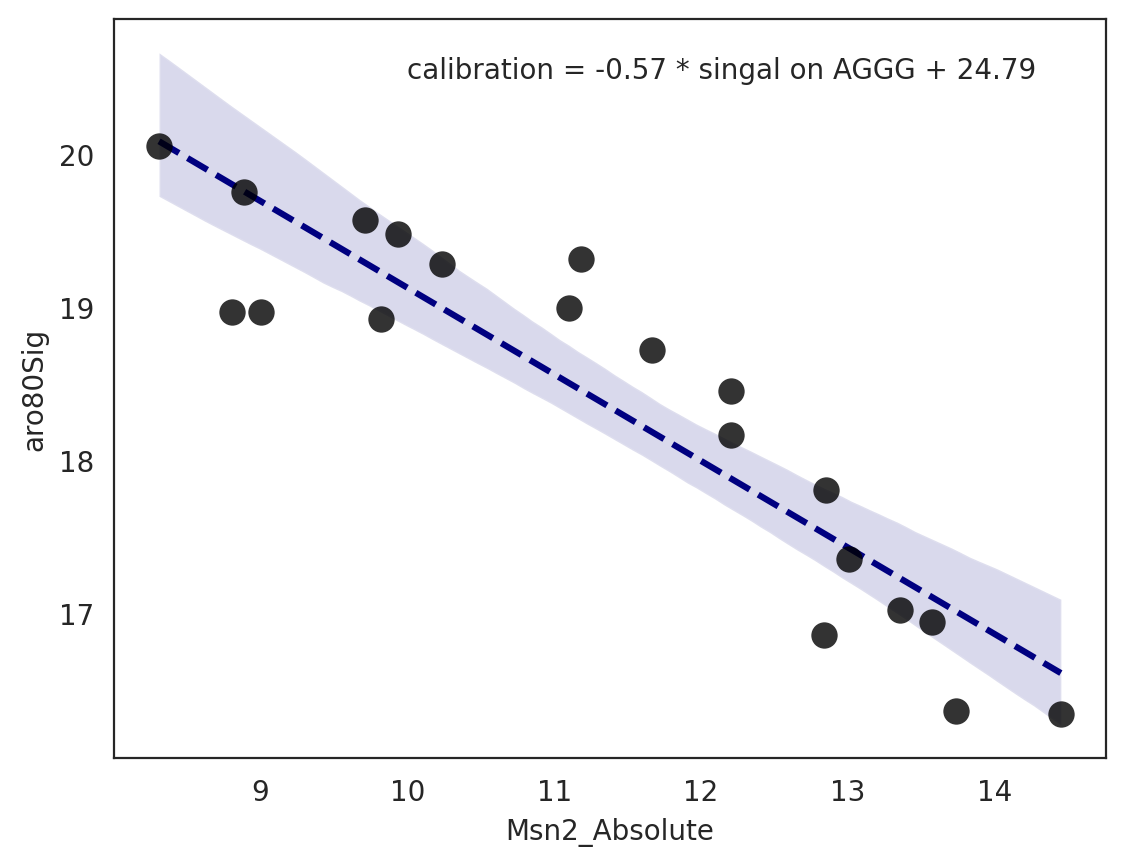

In [6]:
sp_repeats = pd.read_parquet('data/repeats_sp_20230723.parquet.gzip')
sp_repeats.columns = ['_'.join(name.split('_')[:-1]) for name in sp_repeats.columns]
mean_sp = sp_repeats.transpose().reset_index().groupby('index').mean().transpose().rename_axis(None, axis='columns').rename({'G_P deletion':'G_P_deletion'}, axis=1)
sp_og.loc[:, 'LIVFWY_deletion'] = sp_repeats.loc[:, 'LIVFWY_deletion'].mean(axis=1)
msn2t = list(sp_og.loc[common_msnmed+unique_msn, 'Msn2'].sort_values(ascending=False).index)

abs_repeats = pd.read_csv('data/calculatednonmed_log2abs.csv', index_col=0)
abs_repeats.index = ['_'.join(name.split('_')[:-1]) for name in abs_repeats.index]



signal = all_table.loc[aro80.index]
fig, ax = plt.subplots(1)
p = sns.regplot(x=signal.Msn2_Absolute, y=np.log2(aro80), scatter_kws={'color':'k', 'linewidth':0, 's':90, 'zorder':20},
                line_kws={'linestyle':'--', 'color':'navy'}, n_boot=1000)
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())
print(intercept, slope)
ax.text(10,20.5, "calibration = {} * singal on AGGG + {}".format(np.round(slope,2), np.round(intercept,2)))


all_table = all_table.rename({'LIVFWY_deletion_all1':'LIVFWY_deletion'})
all_table.loc[:, 'ARO80_from_regression'] = all_table.Msn2_Absolute.apply(lambda x : x*slope + intercept).rename({'LIVFWY_deletion_all1':'LIVFWY_deletion'})
all_table.loc[:, 'log2_Paddle_pred_sum'] = np.log2(all_table.Paddle_pred_sum)
sp = sp_og.loc[:, list(all_table.drop(['Msn2_150_450_dMsn4', 'Msn2_150_550_dMsn4', 'Msn2_250_550_dMsn4', 'Msn2_250_642_dMsn4', 'Msn2_Zfonly_dMsn4', 'Msn2_dMotB_dMsn4', 'LIVFWY_deletion_all2']).index)].div(2**all_table.ARO80_from_regression)


msn4 = ['Msn2_135_dMsn4', 'Msn2_150_350_dMsn4', 'Msn2_150_450_dMsn4', 'Msn2_150_550_dMsn4', 'Msn2_200_dMsn4',
'Msn2_250_450_dMsn4', 'Msn2_250_550_dMsn4', 'Msn2_250_642_dMsn4', 'Msn2_320_dMsn4', 'Msn2_350_550_dMsn4', 'Msn2_370_dMsn4',
'Msn2_420_dMsn4', 'Msn2_450_642_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4',
'Msn2_604_dMsn4', 'Msn2_Zfonly_dMsn4', 'Msn2_dMotA_dMsn4', 'Msn2_dMotB_dMsn4', 'Msn2_dTAD_dMsn4']




b_repeats = sp_repeats.loc[targets, :].median()/(2 ** abs_repeats.apply(lambda x : x*slope + intercept)).squeeze().values
maxfc_f = (b_repeats.loc['MSN2WT'].mean() - b_repeats.loc['MSN2_start_nls'].mean())
maxfc_s = (b_repeats.loc['Msn2'].mean() - b_repeats.loc['MSN2_start_nls'].mean())
allfcs_repeats = b_repeats - b_repeats.loc['MSN2_start_nls'].mean()

b_model_repeats = (allfcs_repeats/maxfc_f)



b_model_mean = allfcs_repeats.reset_index().groupby('index').mean().fillna(0)/maxfc_f
b_model_sem = (allfcs_repeats/maxfc_f).reset_index().groupby('index').sem().fillna(0)
b_model_mean_sag = allfcs_repeats.reset_index().groupby('index').mean().fillna(0)/maxfc_s
b_model_mean_sag = b_model_mean_sag.rename({'Msn2_ZFonly_dMsn4':'Msn2_dMsn4', 'Msn2_dMsn4':'Msn2_ZFonly_dMsn4'})
b_model_sem_sag = (allfcs_repeats/maxfc_s).reset_index().groupby('index').sem().fillna(0)
b_model_sem_sag = b_model_sem_sag.rename({'Msn2_ZFonly_dMsn4':'Msn2_dMsn4', 'Msn2_dMsn4':'Msn2_ZFonly_dMsn4'})

fig.savefig('figures/Supp/Supp_aro80_parameter.pdf')


# Med15

In [7]:
med_repeats = pd.read_csv('data/med15repeats_20230721.csv', index_col=0).rename({'start_nls':'MSN2_start_nls'}, axis=1)
med_repeats.columns = [name.split('.')[0] for name in med_repeats.columns]
med = med_repeats.transpose().reset_index().groupby('index').mean().transpose().rename_axis(None, axis='columns').rename({'start_nls':'MSN2_start_nls'}, axis=1)
medt = list(med.loc[med_targets, 'Msn2'].sort_values(ascending=False).index)


offir_dat = pd.read_csv('data/offie_med_dat.csv', index_col=0)

ddmed15 = offir_dat.loc[t_for_med, 'Gal11_ddmsn'].median() 
med15wt = med.loc[t_for_med,'Msn2'].median() 
med_norm1 = lambda x : x.loc[t_for_med].median()

maxfc =  med_norm1(med.loc[t_for_med,'Msn2']) - ddmed15
fc_repeats = med_norm1(med_repeats) - ddmed15
res_repeats = fc_repeats.div(maxfc, axis=0).drop('Msn2_ddMotAMotB')
m_model_sem = res_repeats.reset_index().groupby('index').sem().fillna(0)
m_model_mean = (med.loc[t_for_med].median()- ddmed15).div(maxfc, axis=0).drop('Msn2_ddMotAMotB').fillna(0)

# Constructing + supp Med15 correlation

In [8]:
m_model_mean = m_model_mean.rename({'Msn2_kWal_m_Tail':'Msn2_lWal_m_Tail'})
m_model_sem= m_model_sem.rename({'Msn2_kWal_m_Tail':'Msn2_lWal_m_Tail'})

pattern = '_delMsn4'
rename = dict()
for i in b_model_mean.index:
    if pattern in i:
        if 'MotA' in i or 'TAD' in i:
            rename[i] = i.replace(pattern,'') + '_dMsn4' 
        else:
            rename[i] = i.replace(pattern,'').replace('d', '') + '_dMsn4' 

b_model_mean = b_model_mean.rename(rename)
b_model_mean_sag = b_model_mean_sag.rename(rename)
b_model_sem = b_model_sem.rename(rename)
b_model_sem_sag = b_model_sem_sag.rename(rename)
mean_sp = mean_sp.rename(rename, axis=1)

In [9]:
all_data= pd.concat([e_model_mean, b_model_mean, b_model_mean_sag, m_model_mean,
                      e_model_sem, b_model_sem, b_model_sem_sag, m_model_sem], axis=1)
all_data.columns = ['e', 'b_f', 'b_s', 'm', 'eci', 'bci_f', 'bci_s', 'm_ci']
all_data.loc['MSN2WT', 'm'] = all_data.loc['Msn2', 'm']
all_data.loc[:, 'edges'] = 'k'
edges = np.logical_or((all_data.loc[:, 'e'] <=0).values,
              (all_data.loc[:, 'b_f'] <=0.05).values,
             (all_data.loc[:, 'b_s'] <=0.05).values)

all_data.loc[edges, 'edges'] = 'firebrick'

sl = lambda val : math.degrees(math.atan((0-val[1])/(0-val[0])))
all_data.loc[:, 'a_f'] = np.array(list(map(sl,all_data.loc[:, ('b_f', 'e')].values))).clip(0) / 45
all_data.loc[:, 'a_s'] = np.array(list(map(sl,all_data.loc[:, ('b_s', 'e')].values))).clip(0) / 45

all_data.loc[:, 'a_ms'] = np.array(list(map(sl,all_data.loc[:, ('b_s', 'm')].values))).clip(0) / 45
all_data.loc[:, 'a_mf'] = np.array(list(map(sl,all_data.loc[:, ('b_f', 'm')].values))).clip(0) / 45

all_data.loc[~all_data.e.isna(), 'a_f'] = all_data.loc[~all_data.e.isna(), 'a_f'].fillna(0)
all_data.loc[~all_data.e.isna(), 'a_s'] = all_data.loc[~all_data.e.isna(), 'a_s'].fillna(0)
all_data.loc[~all_data.m.isna(), 'a_mf'] = all_data.loc[~all_data.m.isna(), 'a_mf'].fillna(0)
all_data.loc[~all_data.m.isna(), 'a_ms'] = all_data.loc[~all_data.m.isna(), 'a_ms'].fillna(0)

problematic = ['G_is_placed_next_to_N', 'G_P_deletion', 'LIV_cluster1', 'ED_shift1',
               'Msn2_Scramble30', 'MotA_NLS', 'Msn2_dZF', 'BY', 'MotA_3rep1',
               'MotA_4rep1', 'Msn2_Scramble10', 'Msn2_dZF','MSN2_motA_nls', 'Msn2_20s', 'MotA_NLS', 'dMsn2', 'G_P deletion']

all_data = all_data.drop(problematic)

all_data.loc[:, 'corr_s'] = mean_sp.corr().loc[all_data.index, 'Msn2']
all_data.loc[:, 'corr_f'] = mean_sp.corr().loc[all_data.index, 'MSN2WT']

In [10]:
med = med.rename({'Msn2_kWal_m_Tail':'Msn2_lWal_m_Tail'}, axis=1)
med.loc[:, 'MSN2WT'] = med.loc[:, 'Msn2'] 

In [11]:
corr_med = lambda x:np.corrcoef(mean_sp.loc[t_for_med, x], med.loc[t_for_med, x])[0][1]
mcorr = pd.DataFrame(dict(zip(all_data.m.dropna().index,list(map(corr_med, all_data.m.dropna().index)))), index=['med_corr']).transpose()
all_data = pd.concat([all_data, mcorr], axis=1)
all_data.loc[:, 'med_corr_s'] = (all_data.med_corr - all_data.med_corr.MSN2_start_nls) / (all_data.med_corr.Msn2 - all_data.med_corr.MSN2_start_nls)
all_data.loc[:, 'med_corr_f'] = (all_data.med_corr - all_data.med_corr.MSN2_start_nls) / (all_data.med_corr.MSN2WT - all_data.med_corr.MSN2_start_nls)

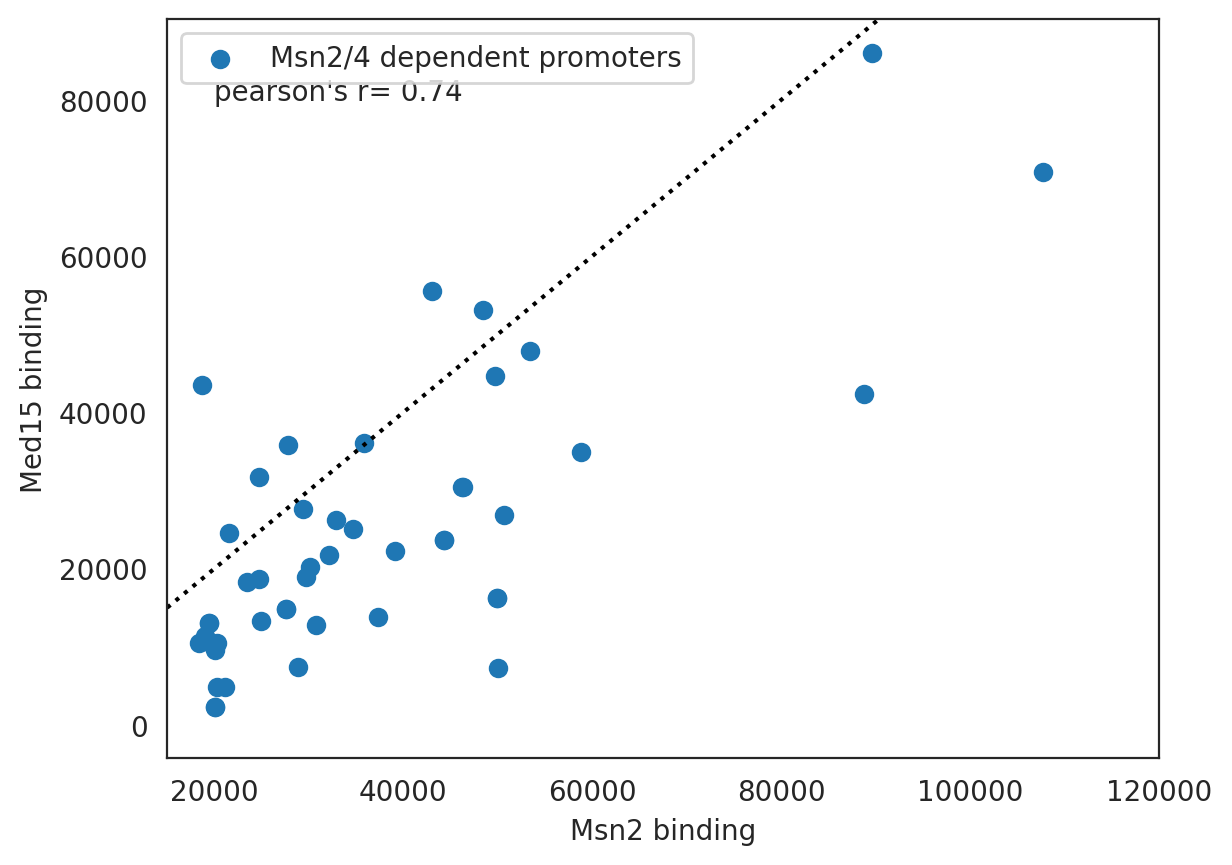

In [12]:
fig, ax = plt.subplots(1)
ax.axline((0,0), slope=1, c='k', linestyle=':')
ax.scatter(x=mean_sp.loc[t_for_med, 'Msn2'], y=med.loc[t_for_med, 'Msn2'], label='Msn2/4 dependent promoters')
ax.set_xlabel('Msn2 binding')
ax.legend()
ax.set_ylabel('Med15 binding')
ax.text(20000, 80000, "pearson's r= {}".format(np.round(corr_med('Msn2'),2)))
ax.set_xlim([15e3, 120000])
fig.savefig('figures/Supp/Supp_mediator_parameter.pdf')


## Error propagation
$\Delta z = \left| \frac{y}{{45x^2 (x^2 + y^2)}} \right| \Delta x + \left| \frac{1}{{45x (x^2 + y^2)}} \right| \Delta y$


In [13]:
def error_prop(name, wt, data=all_data, ):
    d = all_data.loc[name]
    y = d.e
    dy = d.eci
    if wt == 'sagie':
        x = d.b_s
        dx = d.bci_s
    elif wt == 'felix':
        x = d.b_f
        dx = d.bci_f
    
    first = 45*(x**2)*(x**2 + y**2)
    firstd = np.abs(y/first) * dx
    second = 45*x*(x**2 + y**2)
    secondd = np.abs(1/first) * dy
    return firstd + secondd

In [14]:
all_data.loc[:, 'zerf'] = list(map(error_prop, all_data.index, repeat('felix')))
all_data.loc[:, 'zers'] = list(map(error_prop, all_data.index, repeat('sagie')))

# Fig1

## A

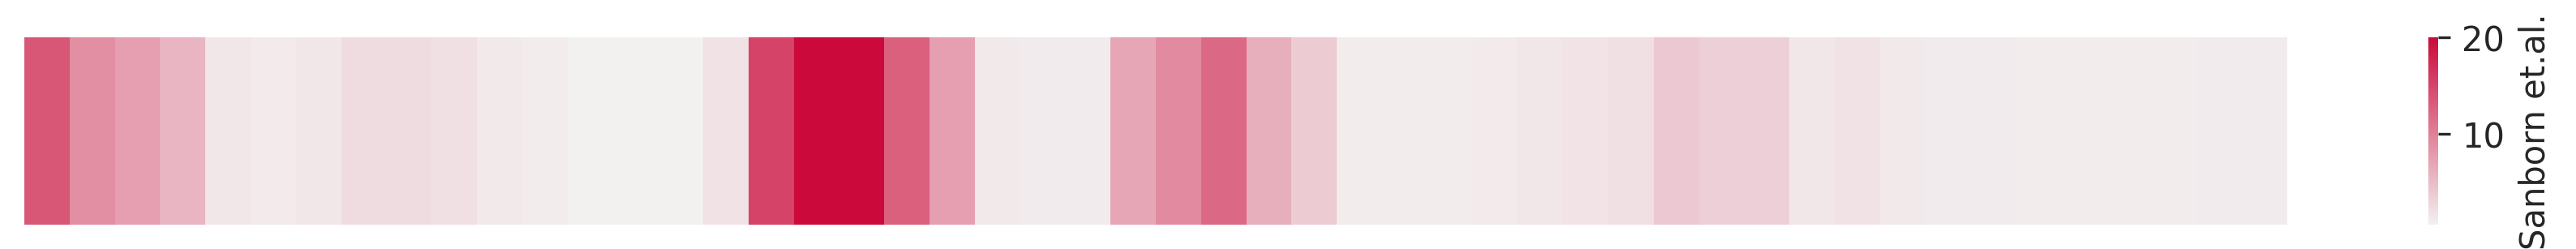

In [15]:
fig, axes = plt.subplots(1, figsize=(15,1), dpi=150)
salmon_map = sns.color_palette("light:#cb0a3b", as_cmap=True)
ax = axes
dat = exp_data_paddle.query("protein=='MSN2'").sort_values(by='position').drop('A_controls-mean_MSN2').activation.fillna(0).values

sns.heatmap(pd.DataFrame(dat).transpose().rolling(window=3,center=True, axis=1).mean().dropna(axis=1),
            cmap=salmon_map, ax=ax, vmax=20, cbar_kws=dict(label='Sanborn et.al.'))

ax.set_xticklabels('')
ax.set_yticklabels('')
fig.savefig('figures/Main/fig1/Fig1A.pdf')

### Disorder

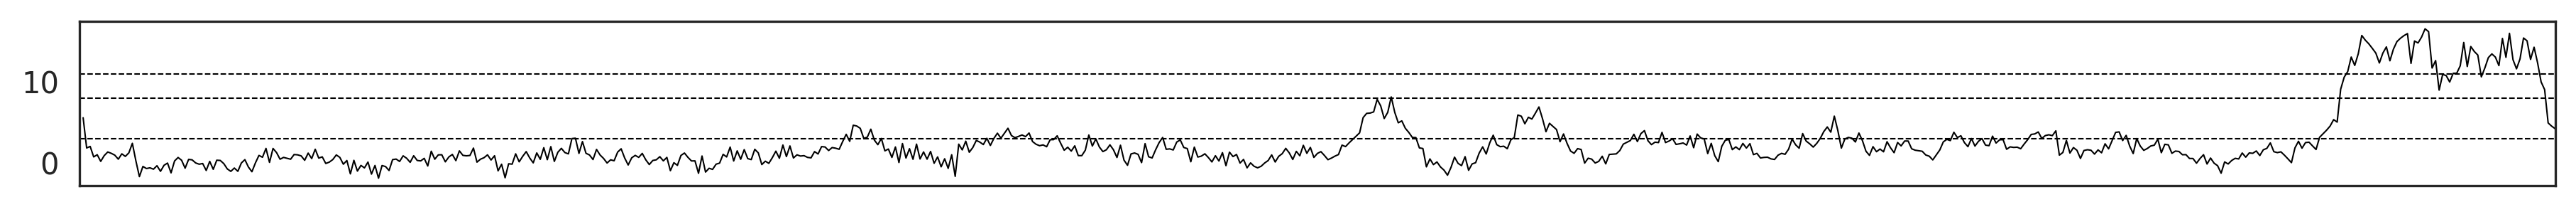

In [16]:
fig, axes = plt.subplots(1, figsize=(15,1), dpi=150)
ax = axes
dat = pd.read_csv('data/adopt.csv', header=None).transpose()
dat.index = np.arange(dat.shape[0])
dat = dat.drop(0)
ax.plot(dat, c='k', lw=.5)
ax.axhline(3, lw=.5, c='k',ls='--')
ax.axhline(8, lw=.5, c='k',ls='--')
ax.axhline(11, lw=.5, c='k',ls='--')
ax.set_xticklabels('')
ax.set_xlim([0 ,dat.shape[0]])
# ax.set_yticklabels('')
fig.savefig('figures/Main/fig1/Fig1A_disorder.pdf')

In [17]:
(dat <= 8 ).sum() / dat.shape[0]

0    0.914773
dtype: float64

## B, F

/tmp/ipykernel_248804/1098894436.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2DBD_dMsn4\nprojected'], rotation=90)


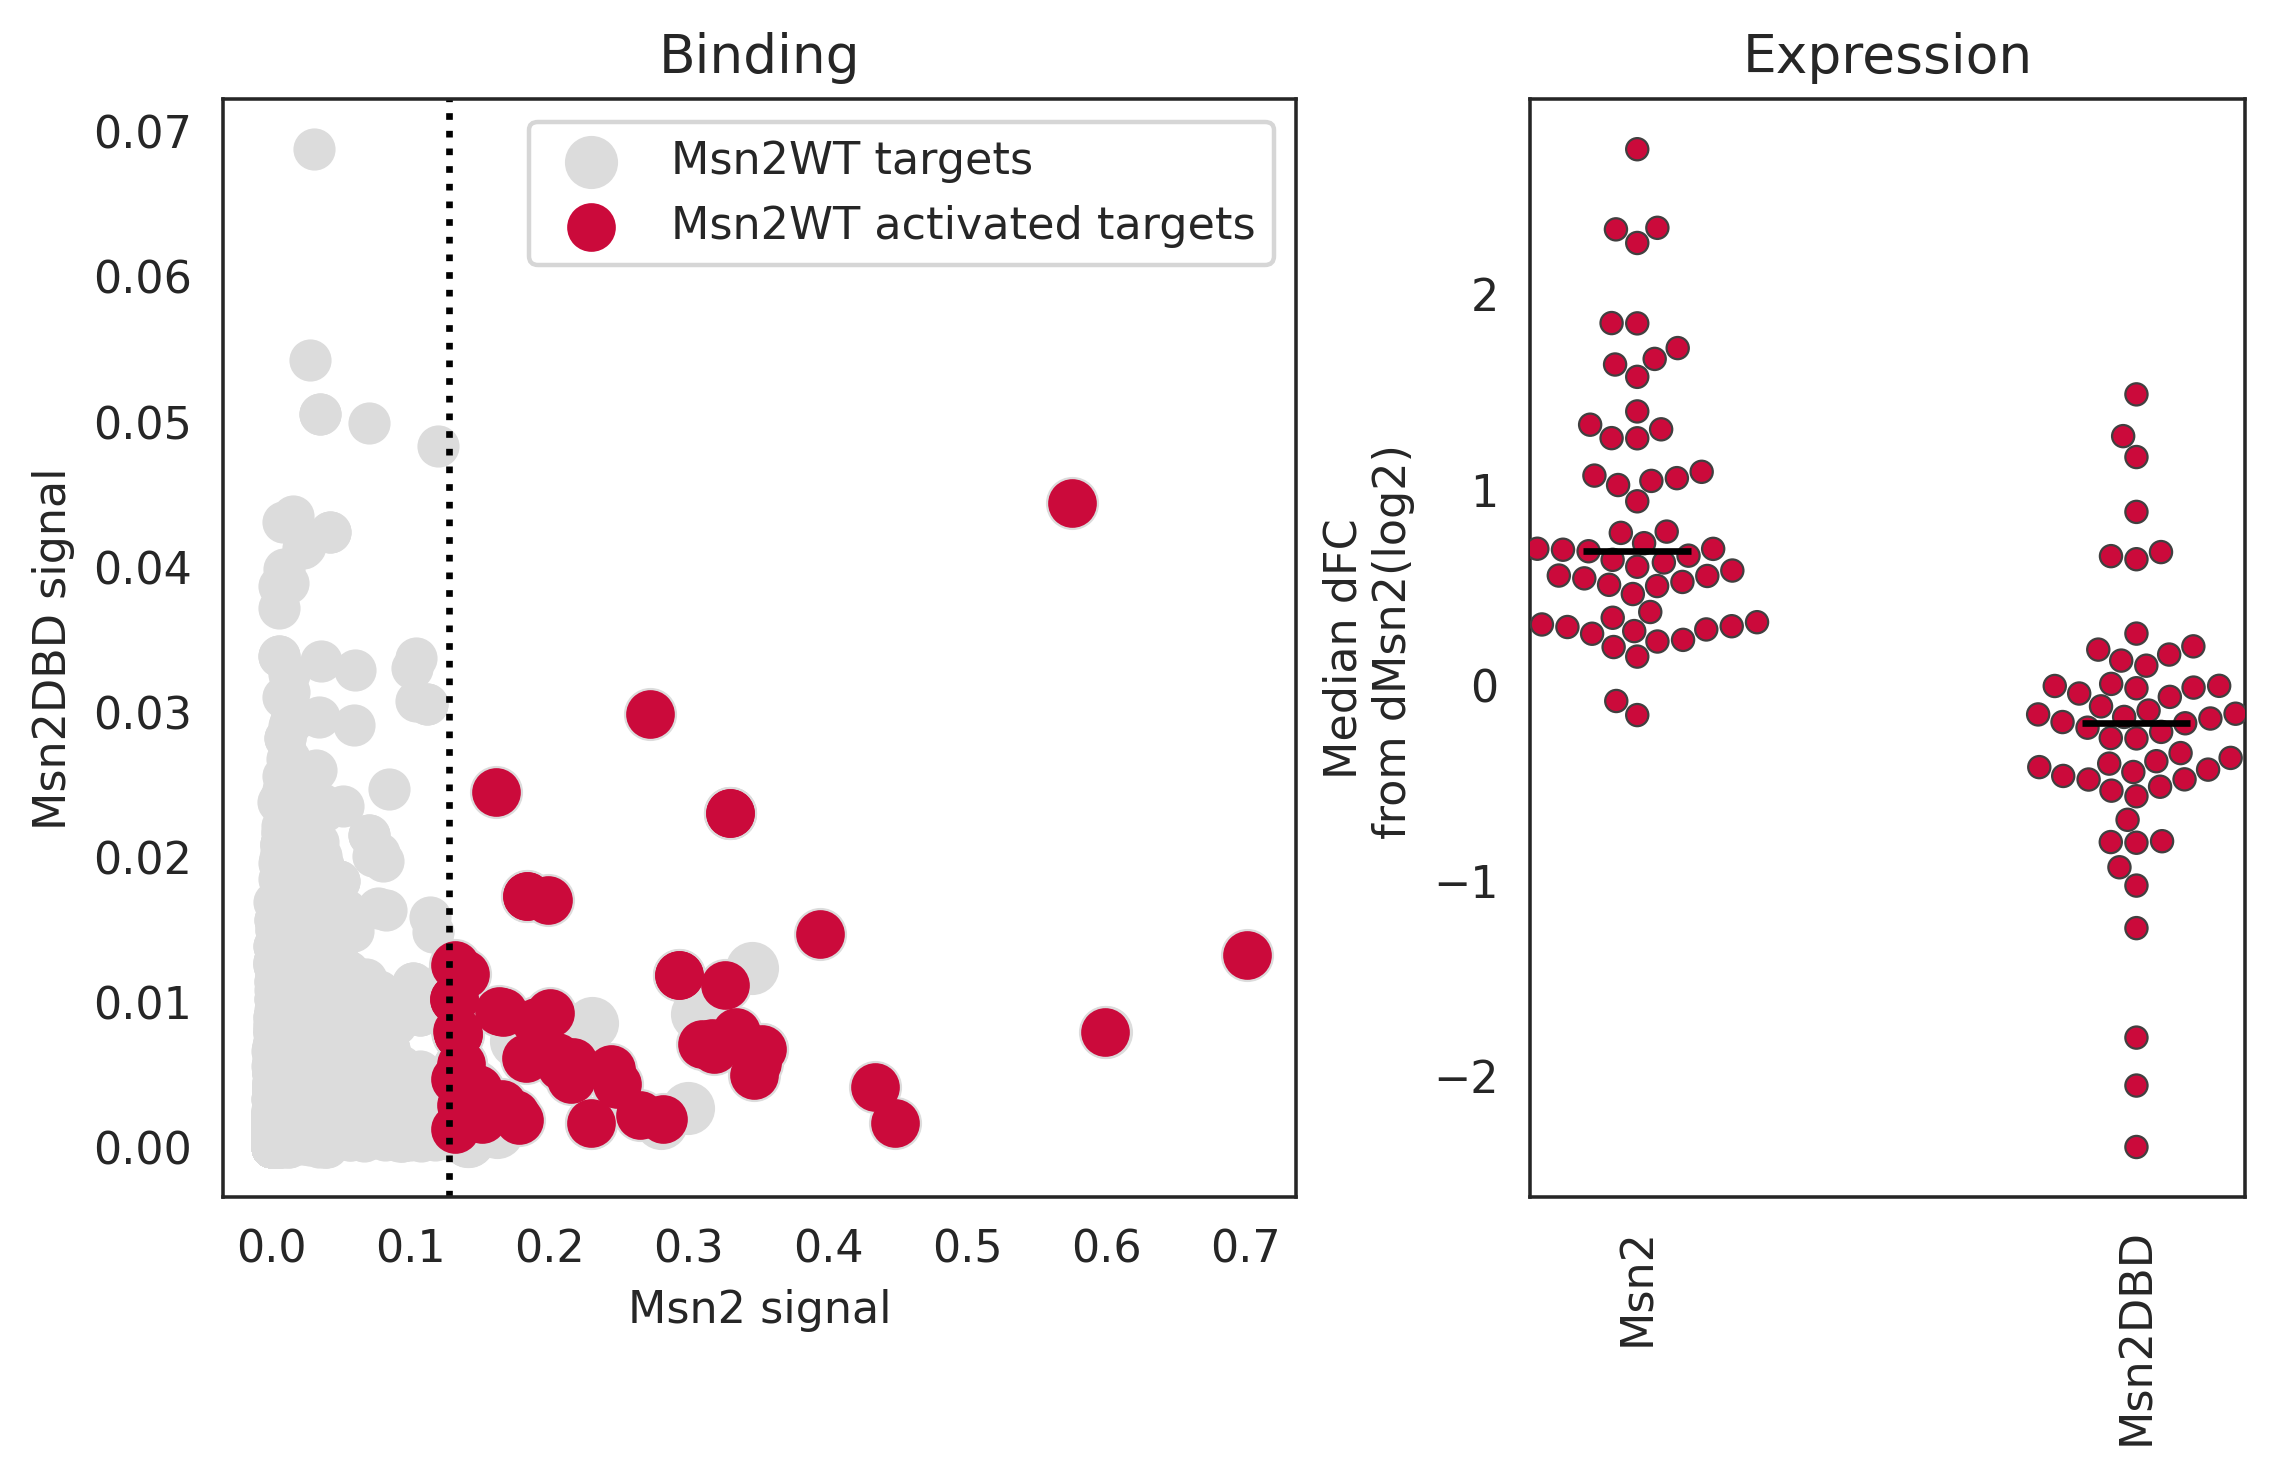

In [18]:
binding_comp = (sp.loc[targets, ['Msn2', 'MSN2_start_nls']]/ all_table.ARO80_from_regression.loc[['Msn2', 'MSN2_start_nls']]).sort_values(by='Msn2', ascending=False)
exp_data = average.loc[targets].sub(average.loc[targets, 'dMsn2'], axis=0).sort_values(by='Msn2', ascending=False)


fig, axes = plt.subplots(1,2, width_ratios=[1.8,1.2], figsize=(7,4.5), constrained_layout=True, dpi=160)
tunion = wt_tergets_all
ax = axes[0]
ax.scatter(sp.Msn2.drop(tunion), sp.MSN2_start_nls.drop(tunion), c='gainsboro', alpha=1, s=90, linewidths=0)
ax.scatter(sp.loc[wt_tergets_all, 'Msn2'], sp.loc[wt_tergets_all, 'MSN2_start_nls'], c='gainsboro', s=120, label='Msn2WT targets', alpha=1)

ax.axvline(sp.loc[wt_tergets_all, 'Msn2'].min(), c='k', linestyle=':')
ax.scatter(sp.loc[targets, 'Msn2'], sp.loc[targets, 'MSN2_start_nls'], facecolor='#cb0a3b', s=120, label='Msn2WT activated targets', linewidths=0)

ax.set_ylabel('Msn2DBD signal')
ax.set_xlabel('Msn2 signal')
ax.set_title('Binding')
ax.legend()

ax=axes[1]
sns.swarmplot(exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls']].sort_values(by='Msn2', ascending=False), palette=['#cb0a3b', '#cb0a3b'], edgecolors='k', linewidth=.5,)
ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', ]].median().index,
          y = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls',]].median().values, s=600, zorder=20, marker='_', c='k')

ax.set_ylabel('Median dFC\n from dMsn2(log2)')
ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2DBD_dMsn4\nprojected'], rotation=90)
ax.set_title('Expression')
fig.savefig('figures/Main/fig1/Fig1B_F.pdf')
plt.show()




## C

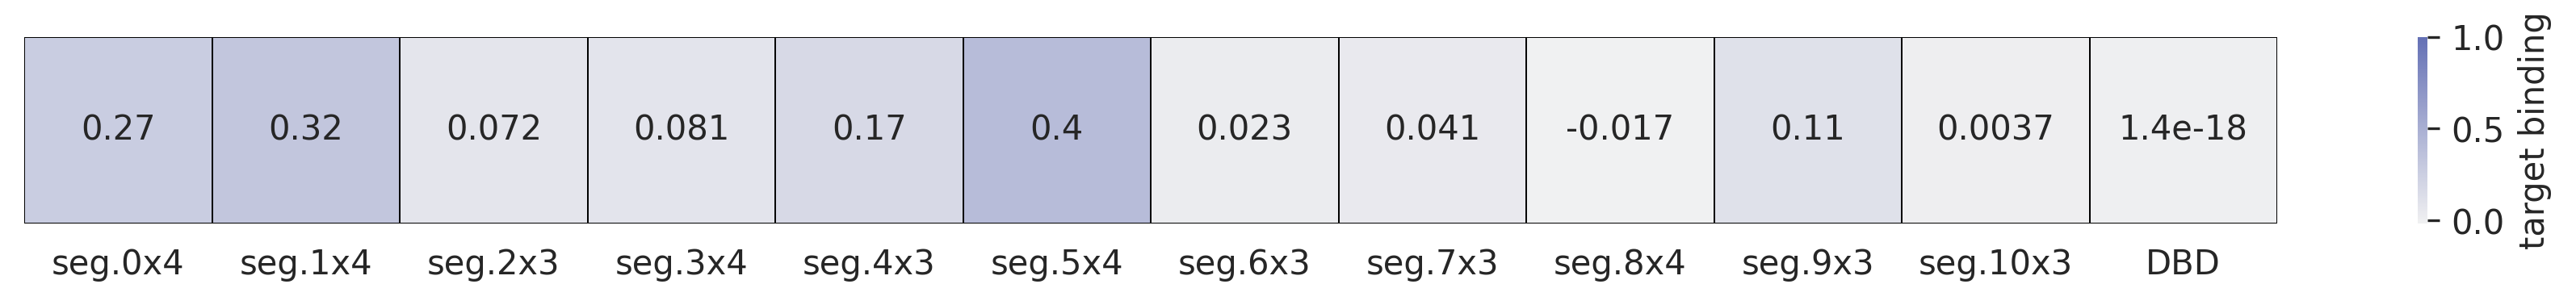

In [19]:
bigr_names = ['rep0x4','rep1x4', 'rep2x3', 'rep3x4', 'rep4x3', 'rep5x4', 'rep6x3', 'rep7x3','rep8x4', 'rep9x3', 'rep10x3',]
bigr_abs_corrected = all_data.filter(regex='Rep|rep', axis=0).filter(regex='x3|x4', axis=0).loc[:, 'b_f'].copy()
bigr_abs_corrected.index = [name.lower() for name in bigr_abs_corrected.index]
bigr_abs_corrected = pd.DataFrame(bigr_abs_corrected.loc[bigr_names])

bigr_abs_corrected.loc['DBD'] = all_data.loc['MSN2_start_nls', 'b_f']

fig, ax = plt.subplots(1, figsize=(15,1),dpi=150)
sns.heatmap(bigr_abs_corrected.transpose(), cmap=sns.color_palette("light:#6470b5", as_cmap=True),
            linecolor='k', linewidths=.4, annot=True, cbar_kws=dict(label='target binding'), vmax=1)
ax.set_xticklabels(bigr_abs_corrected.index.str.replace('rep', 'seg.'))
ax.set_yticklabels('')
fig.savefig('figures/Main/fig1/Fig1C.pdf')

## H

/tmp/ipykernel_248804/2870738556.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))
/tmp/ipykernel_248804/2870738556.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))


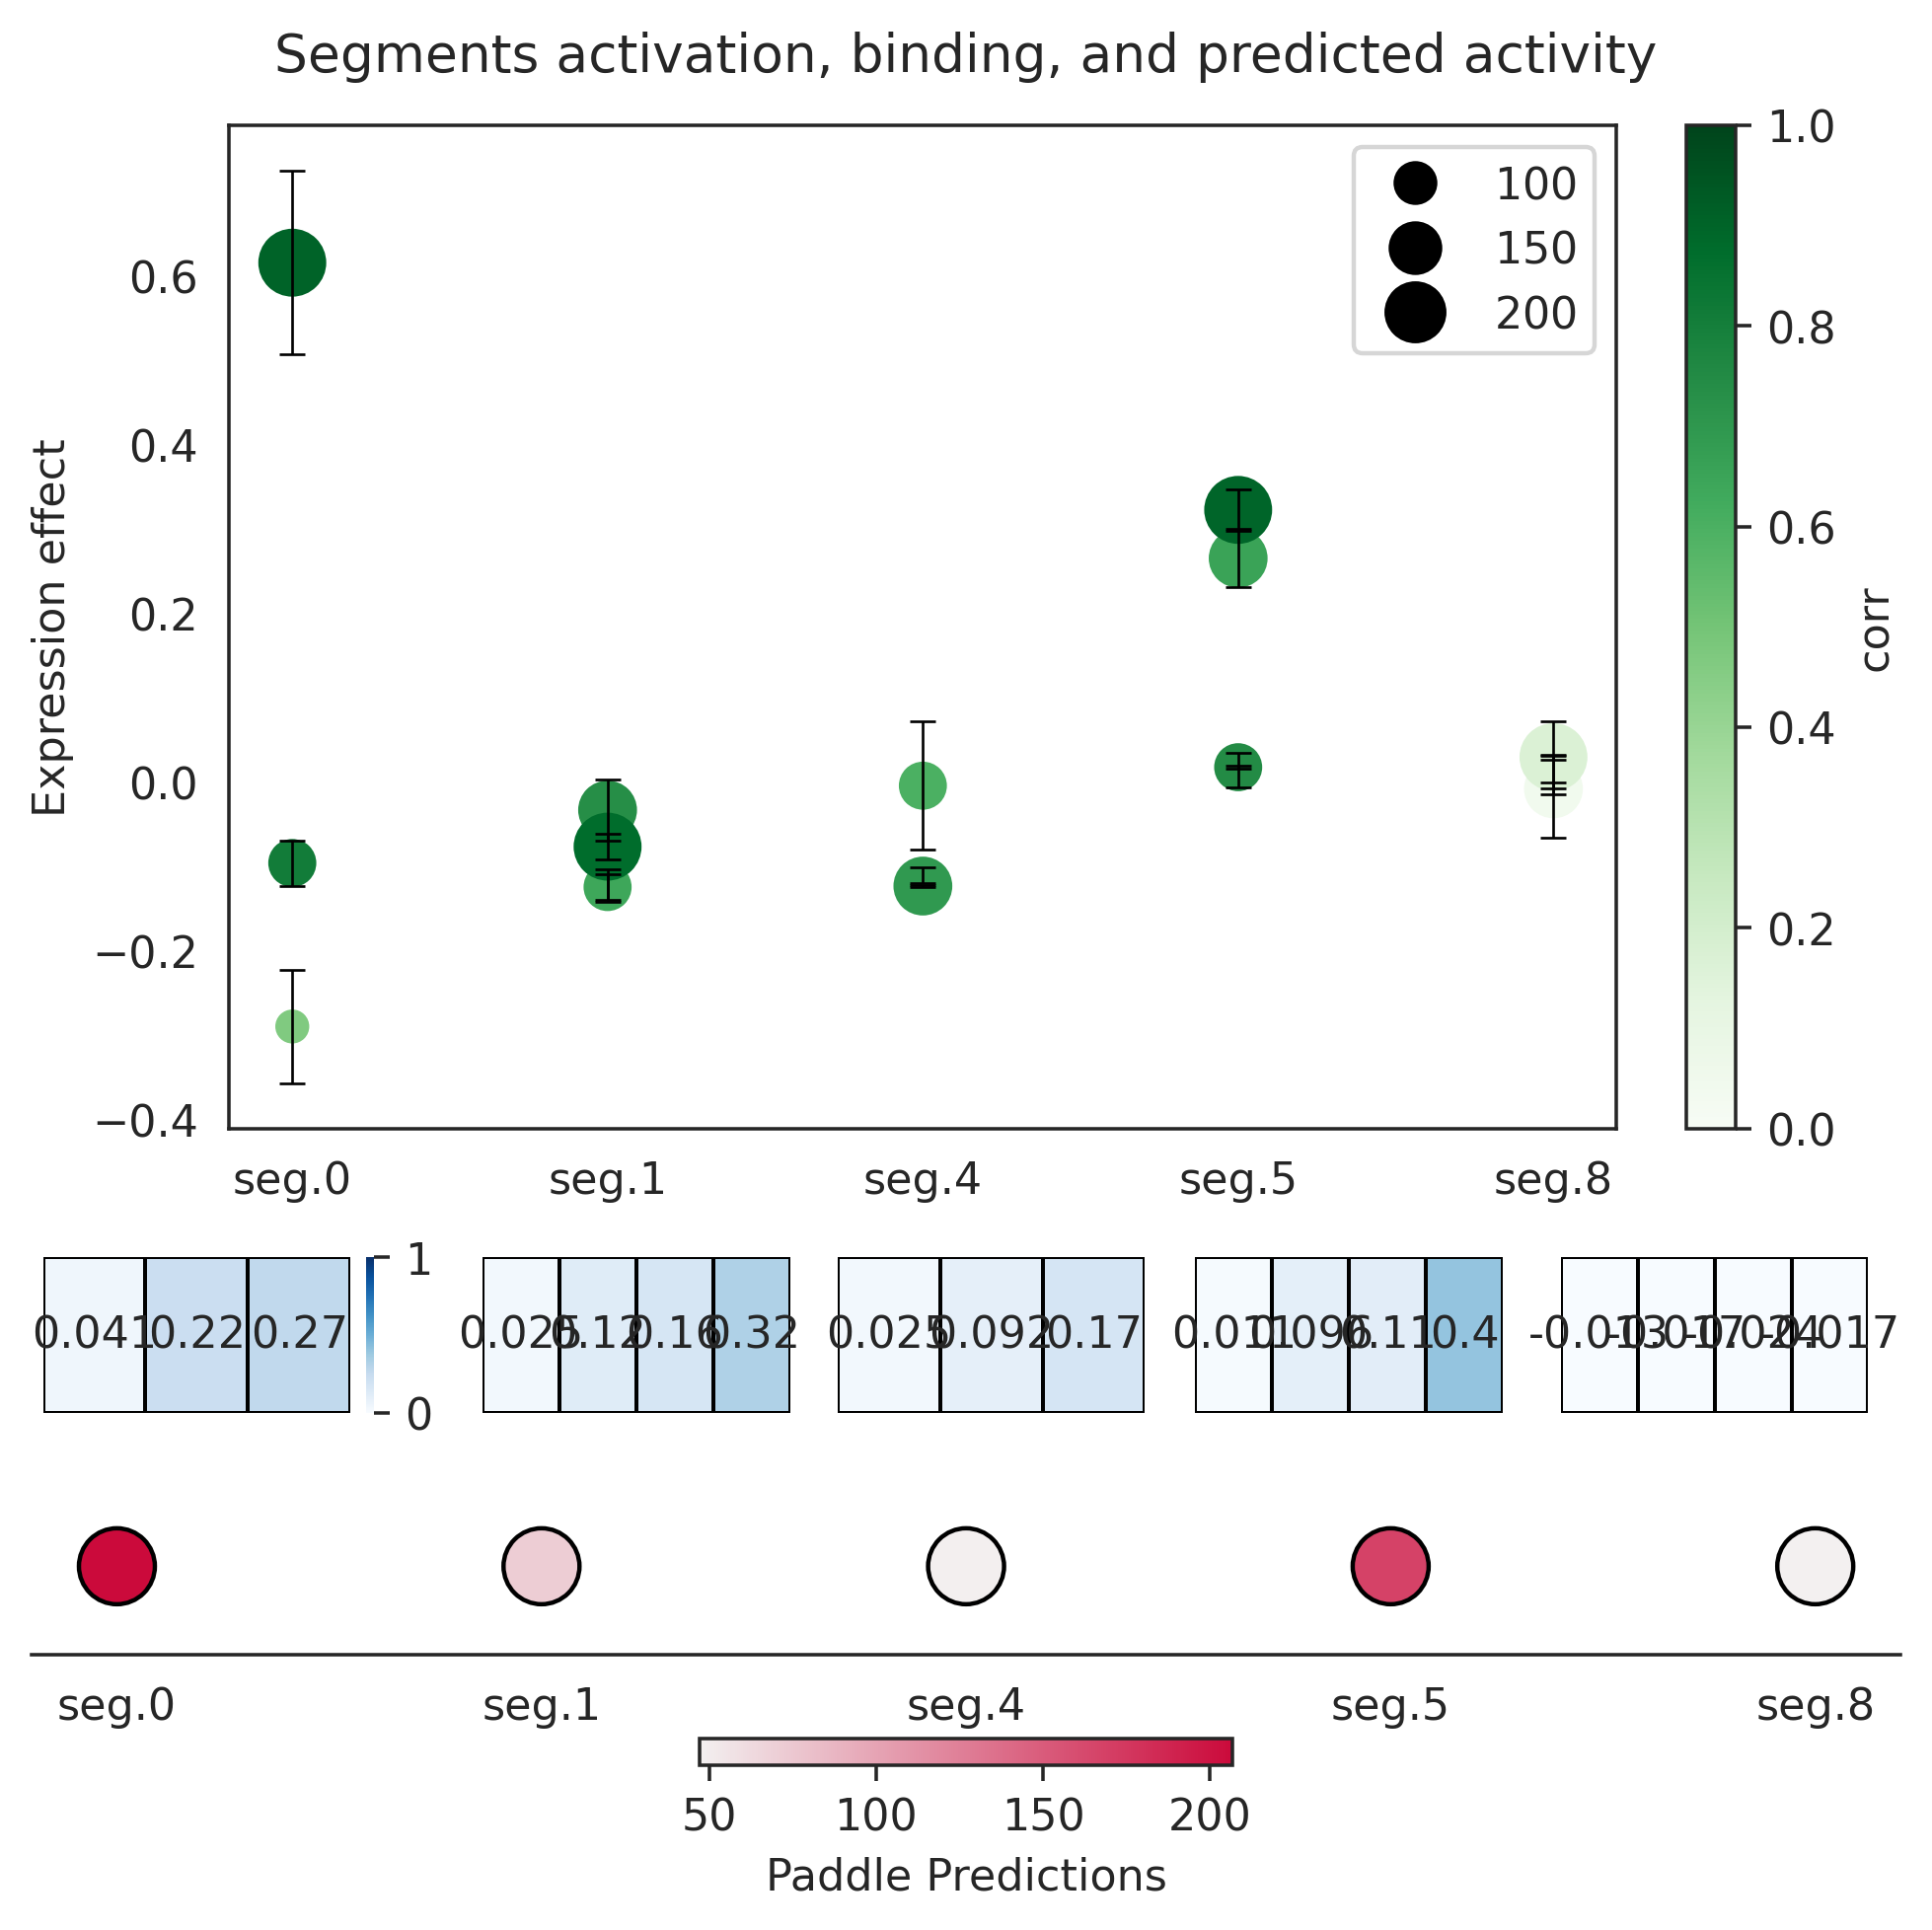

In [20]:
salmon_map = sns.color_palette("light:#cb0a3b", as_cmap=True)

rep_table = all_table.query("Group=='rep' | Group=='control'").copy()
order = ['rep0','rep1','rep4','rep5','rep8','rep0x2','rep1x2','rep5x2','rep8x2','rep1x3','rep4x2','rep4x3','rep5x3','rep8x3','rep0x4','rep1x4','rep5x4','rep8x4']
nwn = ['rep0x1','rep1x1','rep4x1','rep5x1','rep8x1','rep0x2','rep1x2','rep5x2','rep8x2','rep1x3','rep4x2','rep4x3','rep5x3','rep8x3','rep0x4','rep1x4','rep5x4','rep8x4']
rep_table = rep_table.loc[order]
rep_table.index = nwn
xreps = list(rep_table.query("Group=='rep'").reset_index().loc[:, 'index'].apply(lambda x: int(x.split('x')[1])*60))
rep_table.loc[:, 'Info'] = rep_table.reset_index().loc[:, 'index'].apply(lambda x: x.split('x')[0]).values
rep_table.loc[:, 'xreps'] = xreps

fig = plt.figure(figsize=(6,6), constrained_layout=True, dpi=160)

subf = fig.subfigures(3,1,height_ratios=[2.5,.5,1], )


ax = subf[0].subplots(1)
s = ax.scatter(rep_table.Info, all_data.loc[order, 'e'], s=rep_table.xreps.values,
               c= all_data.loc[order, 'corr_f'], cmap='Greens', zorder=18, vmax=1, vmin=0, linewidths=0)
ax.errorbar(rep_table.Info, all_data.loc[order, 'e'].squeeze().values, all_data.loc[order, 'eci'].squeeze().values/1.96, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6, zorder=20)
fig.colorbar(s, label='corr')
ax.legend(*s.legend_elements("sizes", num=4), loc='upper right',)
ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))
ax.set_ylabel('Expression effect')
paddle = rep_table.groupby('Info').agg(lambda x: list(x)[0]).Paddle_pred_sum - 81.80135
inner_axs= subf[1].subplots(1,5)
hmp = ['rep0','rep0x2','rep0x4','rep1','rep1x2','rep1x3','rep1x4','rep4','rep4x2','rep4x3','rep5','rep5x2','rep5x3','rep5x4','rep8','rep8x2','rep8x3','rep8x4']
hmp_dat = pd.DataFrame(all_data.loc[hmp, 'b_f']).transpose()


for axi, rep in zip(inner_axs, ['rep0', 'rep1', 'rep4', 'rep5', 'rep8']):
    if rep != 'rep0':
        cbar=False
    else:
        cbar=True
    sns.heatmap(hmp_dat.filter(regex=rep), cmap='Blues',
                ax=axi, cbar=cbar, linecolor='k', linewidths=.5, vmin=0, vmax=1, annot=True)
    axi.set_yticklabels('')
    axi.set_xticklabels('')


ax = subf[2].subplots(1)

s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticklabels(rep_table.Info.str.replace('rep', 'seg.'))

fig.colorbar(s, label='Paddle Predictions', location='bottom')
ax.set_yticklabels('')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.suptitle('Segments activation, binding, and predicted activity')
fig.savefig('figures/Main/fig1/Fig1H.pdf')

# Fig 2

## B

/tmp/ipykernel_248804/2791255444.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = d.figure.colorbar(sm,)
/tmp/ipykernel_248804/2791255444.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(labels=list(map(extract, cbar.ax.get_yticklabels())))


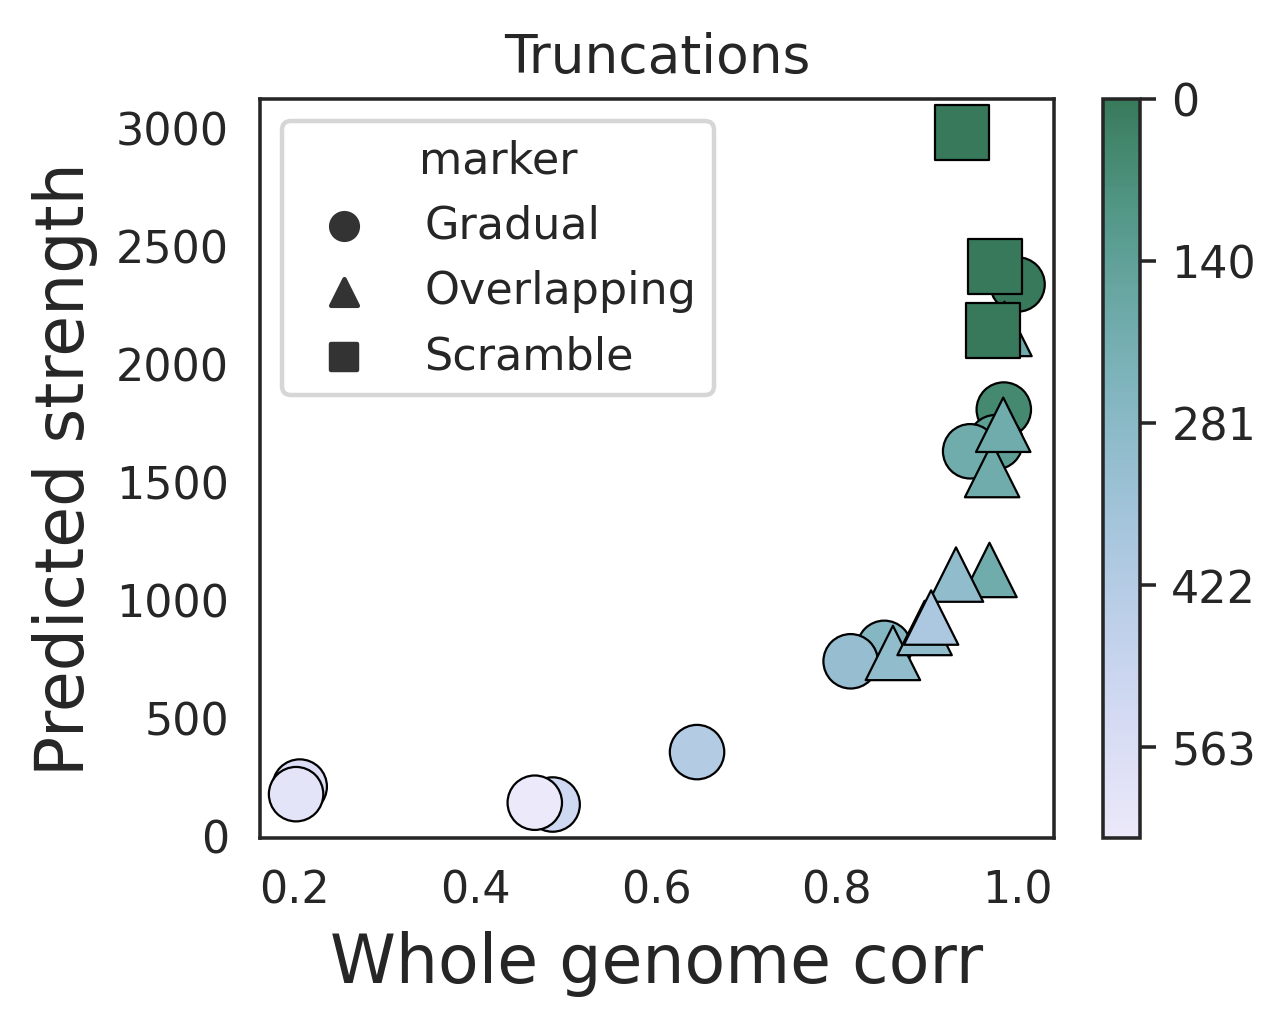

In [21]:
trunc = ['Msn2', 'Msn2_dMotA', 'Msn2_135',
  'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420', 'Msn2_520', 'Msn2_570', 'Msn2_604','Msn2_Zfonly',]
overlap = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642',]

dat = pd.DataFrame(all_table.loc[pd.Index(trunc + ['Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642', 'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3']).drop_duplicates(), 'Paddle_pred_sum'])


trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034, 0.2613, 0.19, 0.1420, 0.088068, 0.7159, 0.7159, 0.7159,0.5738,0.5738,0.5738, 0.443, 0.727,1,1,1]


dat.loc[:, 'corrected_Msn2_Absolute'] = all_data.loc[dat.index, 'corr_s']

dat.loc[:, 'color'] = trunc_len_perc
dat.loc[:, 'marker'] = ['Gradual']*11 + ['Overlapping']*8 + ['Scramble'] *3


fig, ax = plt.subplots(1, figsize=(4,3), dpi=160)
d = sns.scatterplot(data=dat, x='corrected_Msn2_Absolute', y='Paddle_pred_sum'
                    , s=150, c=dat.color, style='marker', linewidth=.5, edgecolor='k',
                    ax=ax, cmap=sns.cubehelix_palette(as_cmap=True,start=2,gamma=.5), zorder=20, markers=['o', '^', 's'])

ax.set_xlabel('Whole genome corr', size=15)
ax.set_ylabel('Predicted strength', size=15)
ax.set_title('Truncations')

norm = plt.Normalize(min(trunc_len_perc), max(trunc_len_perc))
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("light:dimgray", as_cmap=True), norm=norm)
sm = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True,start=2,gamma=.5), norm=norm)

sm.set_array([])
cbar = d.figure.colorbar(sm,)
extract = lambda x: 704 - int(np.ceil(704*float(x.get_text())))
orig = lambda x: float(x.get_text())
cbar.ax.set_yticklabels(labels=list(map(extract, cbar.ax.get_yticklabels())))

fig.savefig('figures/Main/fig2/Fig2B.pdf')


## C + Supp 2.1

/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/utils.py:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


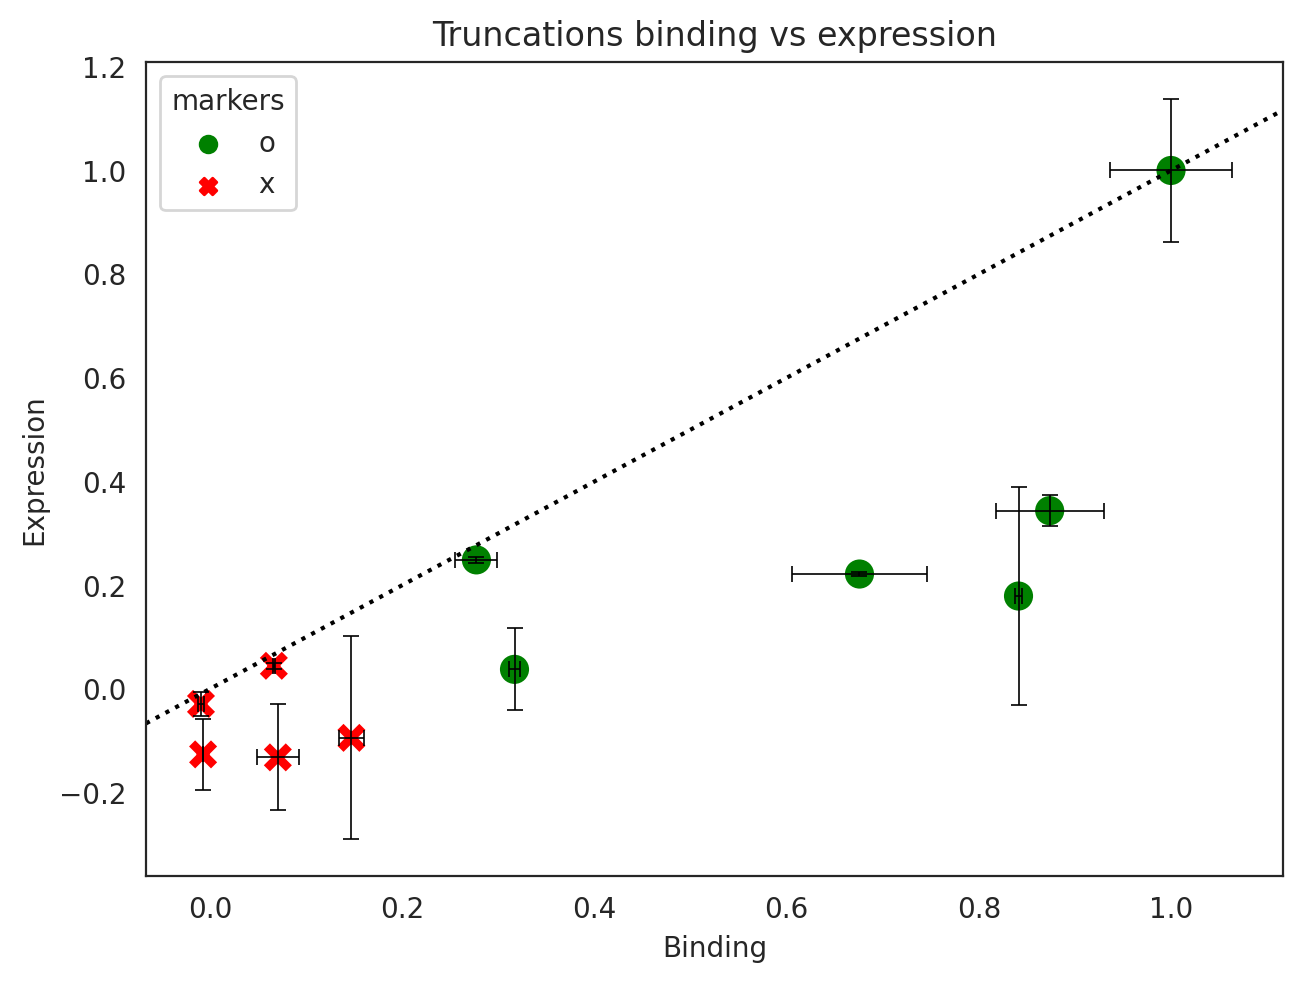

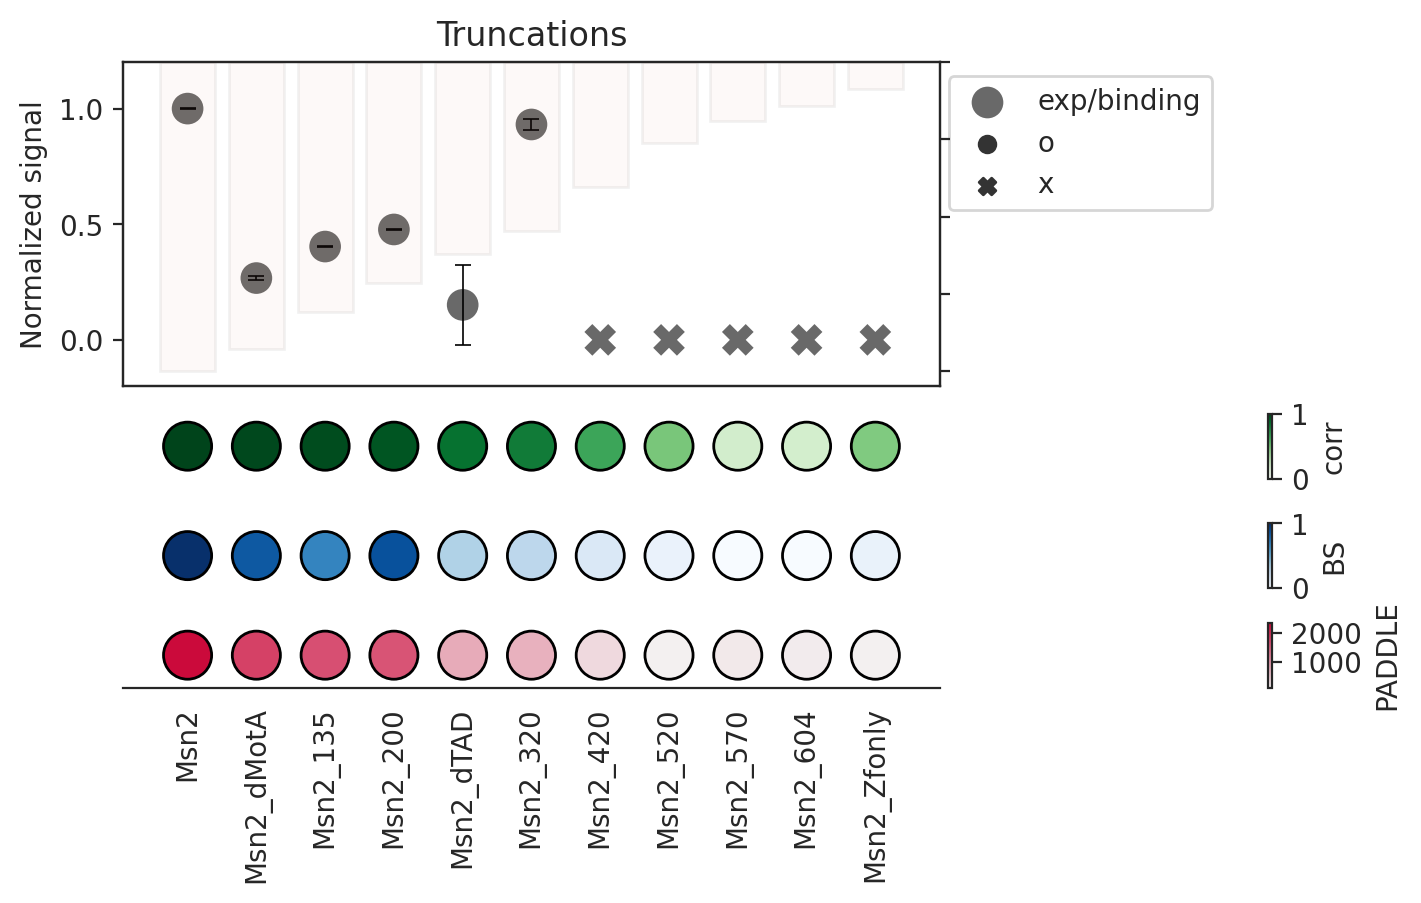

In [22]:

trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034, 0.2613, 0.19, 0.1420, 0.088068]
order = trunc
dat = all_data.loc[pd.Index(order).drop_duplicates()].fillna(0).copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'])
ax.errorbar(data=dat, x='b_s', y='e', yerr='eci', xerr='bci_s', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('Truncations binding vs expression')
fig.savefig('figures/Supp/S_truncations.pdf')


x = range(dat.shape[0])
y1 = dat.loc[order, 'a_s'].fillna(0)
y2 = dat.loc[order, 'corr_s'].fillna(0)
fig, axes = plt.subplots(4,1, figsize=(7,4.4), height_ratios=[5, 1, 1, 1], sharex=True, constrained_layout=True)
ax=axes[0]

size=130

sns.scatterplot(data=dat, x=x,y='a_s', c='dimgray', s=size, linewidth=0,
               zorder=20, label='exp/binding', vmax=1, vmin=0, ax=ax, style='markers')
ax.errorbar(x, y1.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zers'].squeeze().values,
            zorder=20, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)


secax = ax.twinx()
minus = lambda x: -x
secax.bar(x,list(map(minus,trunc_len_perc)), zorder=1, alpha=.05, edgecolor='k', color='darksalmon')
secax.set_yticklabels('')
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Truncations')
ax.set_ylim([-.2,1.2])
ax.legend(bbox_to_anchor=[1,.5,.35,.5])

ax=axes[1]
s = ax.scatter(x, np.zeros(len(order)), c=y2.values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')


ax=axes[2]
s = ax.scatter(x, np.zeros(len(order)), c=all_data.loc[order, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='BS')

paddle = all_table.loc[order, 'Paddle_pred_sum']
ax = axes[3]
s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='PADDLE', location='right')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

fig.savefig('figures/Main/fig2/Fig2C.pdf')
plt.show()

## Supp 2 dMsn4

In [23]:
trunc_dmsn4  = ['Msn2_dMsn4', 'Msn2_dMotA_dMsn4', 'Msn2_135_dMsn4',  'Msn2_200_dMsn4','Msn2_dTAD_dMsn4',
        'Msn2_320_dMsn4', 'Msn2_370_dMsn4', 'Msn2_420_dMsn4', 'Msn2_470_dMsn4', 'Msn2_520_dMsn4', 'Msn2_570_dMsn4','Msn2_ZFonly_dMsn4']

overlap_dmsn4 = ['Msn2_dMsn4', 'Msn2_150_350_dMsn4',
'Msn2_250_450_dMsn4',
'Msn2_350_550_dMsn4',
'Msn2_450_642_dMsn4','Msn2_ZFonly_dMsn4']


/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/utils.py:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/tmp/ipykernel_248804/357848718.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trunc_dmsn4, rotation=90, )


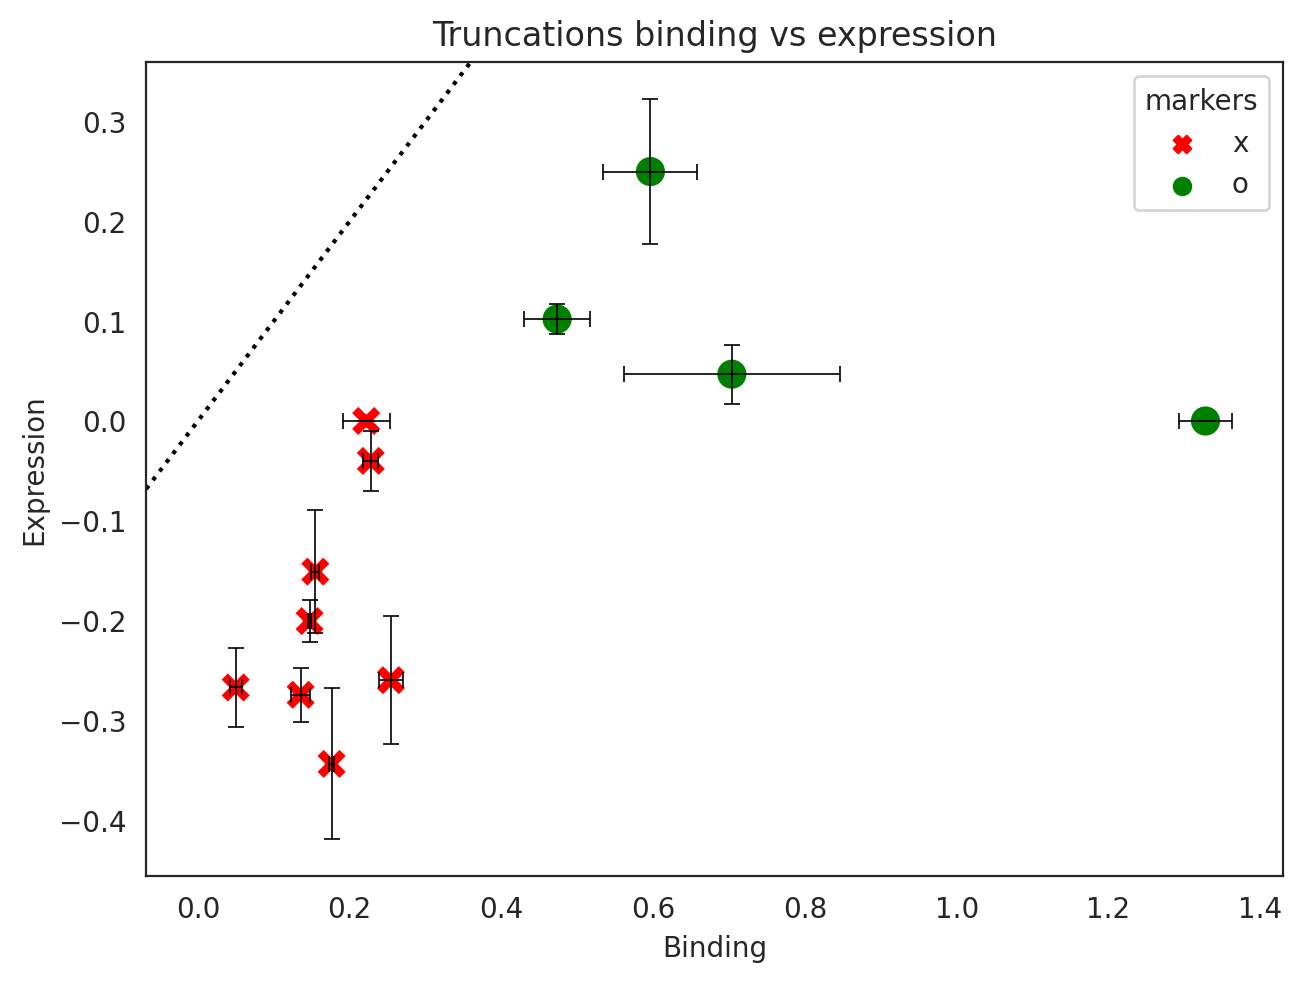

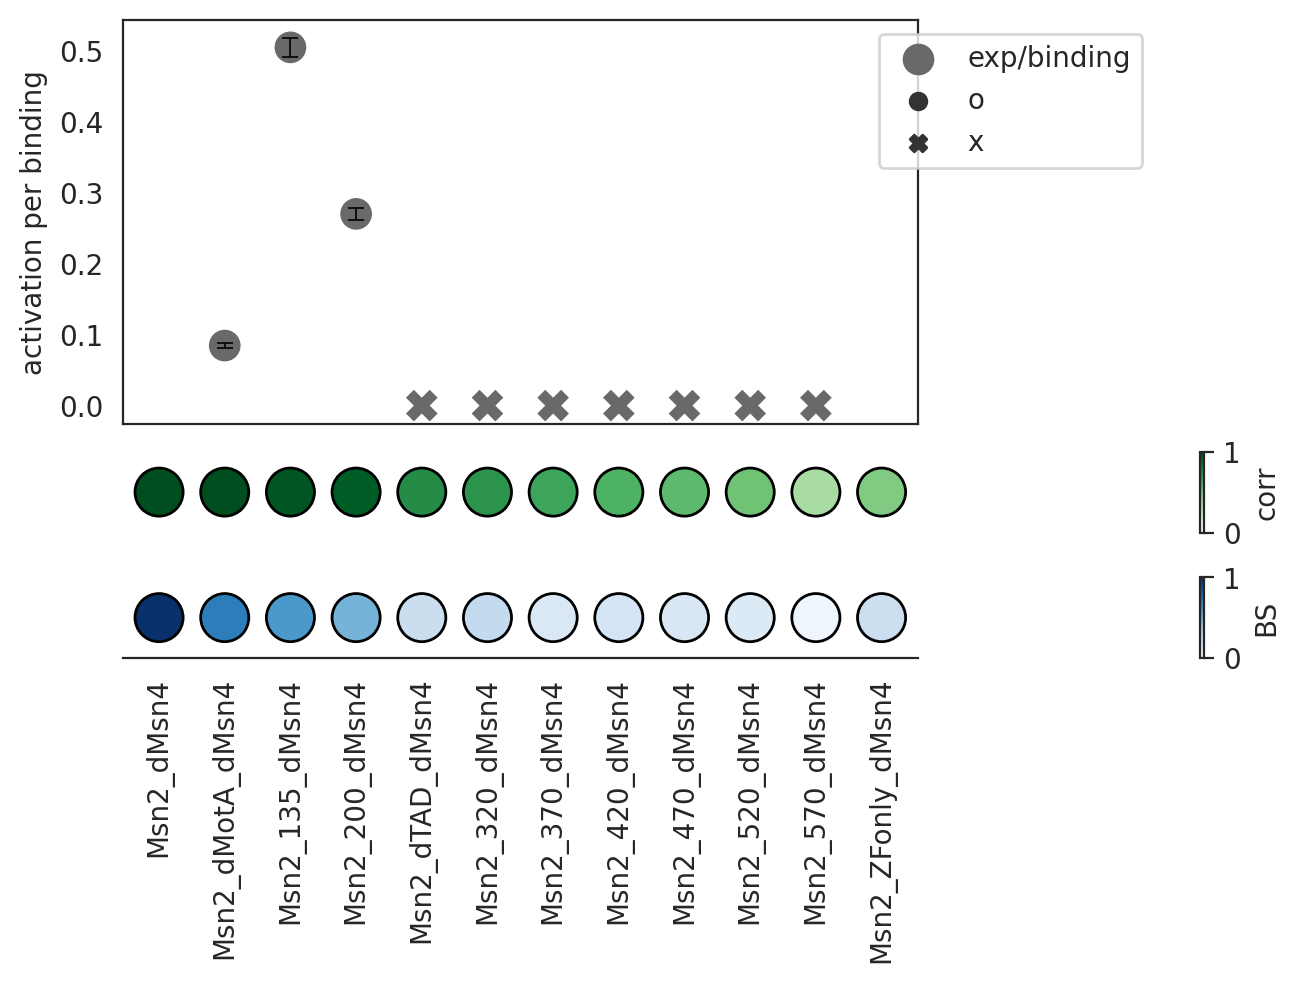

In [24]:
order = trunc_dmsn4
dat = all_data.loc[pd.Index(trunc_dmsn4).drop_duplicates()].fillna(0).copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan
dat.loc['Msn2_dMsn4', 'a_s'] = math.nan
dat.loc['Msn2_ZFonly_dMsn4', 'a_s'] = math.nan
dat = dat.rename({'Msn2_dMsn4':'Msn2_ZFonly_dMsn4', 'Msn2_ZFonly_dMsn4':'Msn2_dMsn4'}, axis=0)
dat = dat.loc[trunc_dmsn4]

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['r', 'g'], style_order=['o', 'x'])
ax.errorbar(data=dat, x='b_s', y='e', yerr='eci', xerr='bci_s', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('Truncations binding vs expression')
fig.savefig('figures/Supp/S_truncations_dmsn4.pdf')


fig, axes = plt.subplots(3, 1, height_ratios=[5, 1, 1], constrained_layout=True, sharex=True)

ax = axes[0]
sns.scatterplot(data=dat, x=trunc_dmsn4,y='a_s',c='dimgray',s=size, linewidth=0,
               zorder=20, label='exp/binding', vmax=1, vmin=0, ax=ax, style='markers', style_order=['o', 'x'])
ax.errorbar(trunc_dmsn4, dat.a_s.squeeze().values, dat.loc[pd.Index(trunc_dmsn4).drop_duplicates(), 'zers'].squeeze().values,
            zorder=20, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.set_xticklabels('')
ax.legend(bbox_to_anchor=[.8,.5,.5,.5])
ax.set_ylabel('activation per binding')

ax = axes[1]
s = ax.scatter(trunc_dmsn4, np.zeros(len(trunc_dmsn4)), c=dat.corr_s.values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')


ax = axes[2]
s = ax.scatter(trunc_dmsn4, np.zeros(len(trunc_dmsn4)), c=all_data.loc[trunc_dmsn4, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(trunc_dmsn4, rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.colorbar(s, location='right', label='BS')

fig.savefig('figures/Supp/S_truncations2_dmsn4.pdf')


/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/utils.py:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/tmp/ipykernel_248804/364394573.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order, rotation=90, )


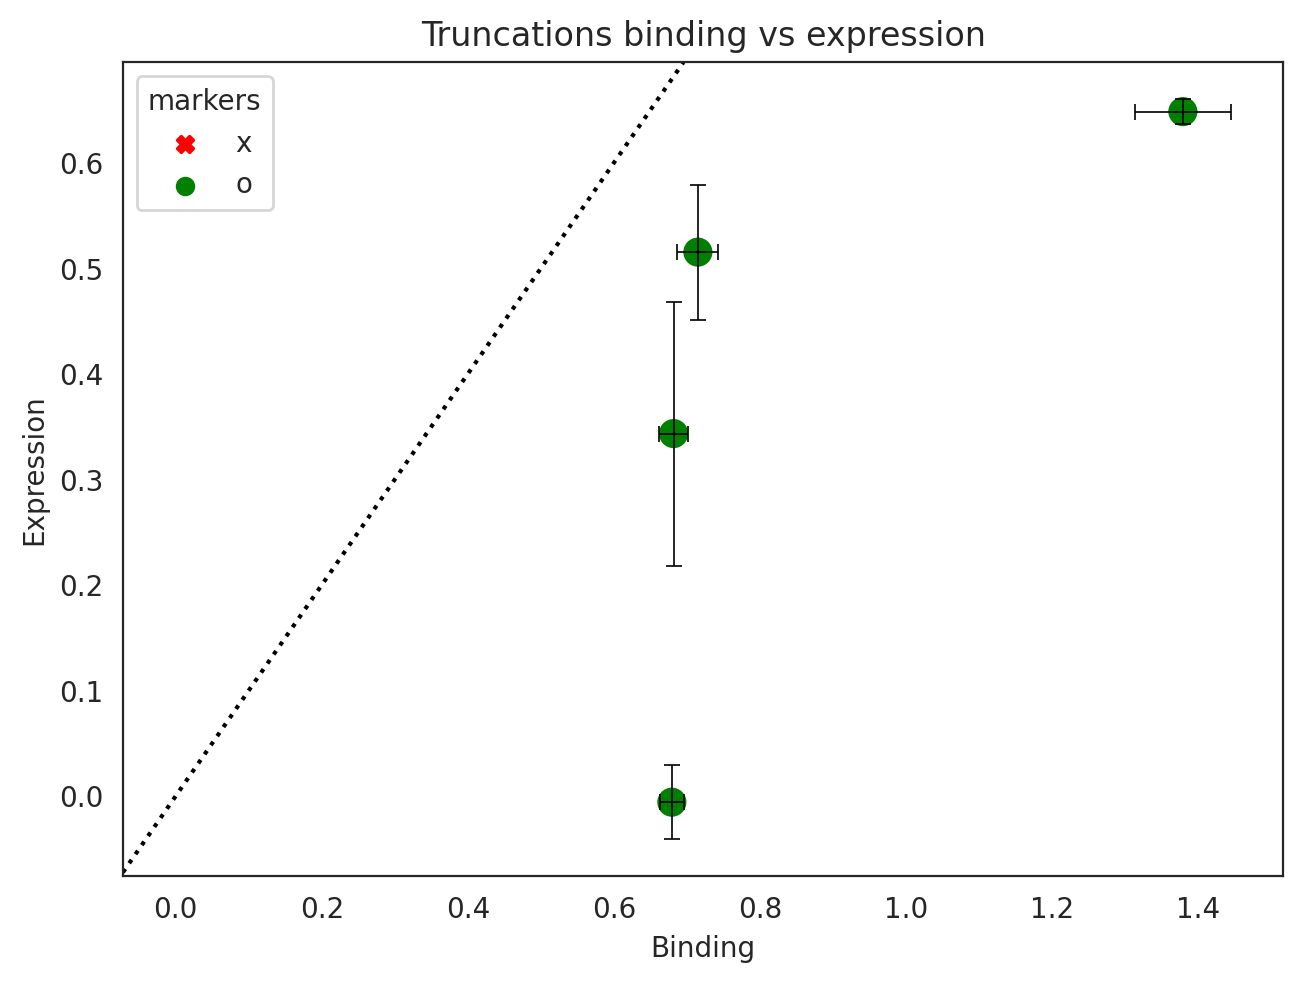

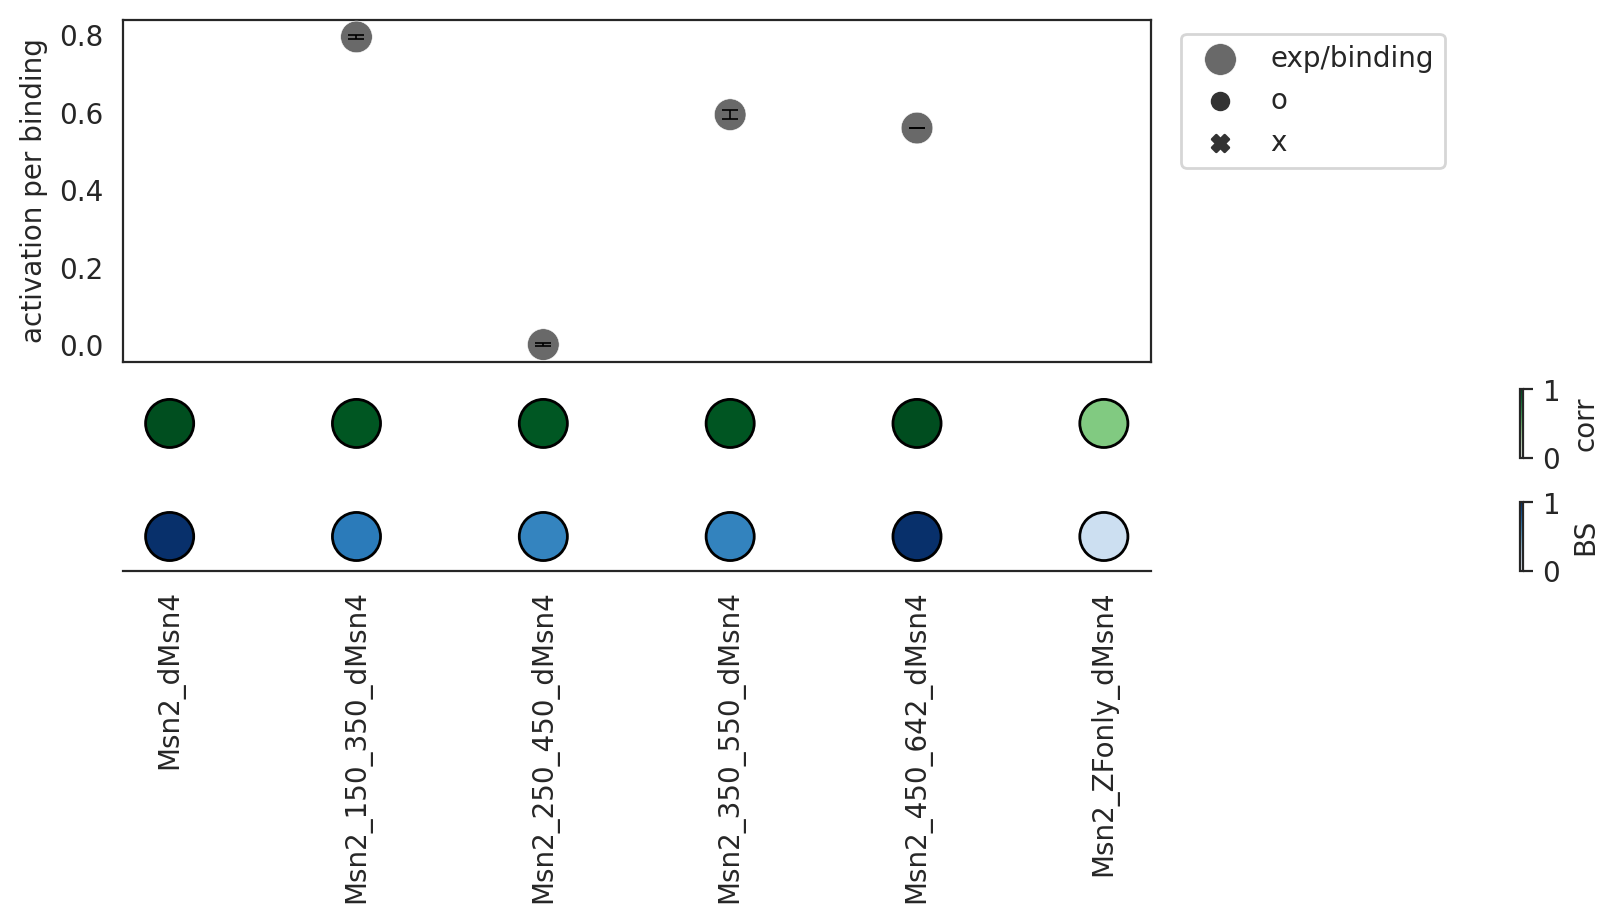

In [25]:
order = overlap_dmsn4
dat = all_data.loc[pd.Index(order).drop_duplicates()].fillna(0).copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan
dat.loc['Msn2_dMsn4', 'a_s'] = math.nan
dat.loc['Msn2_ZFonly_dMsn4', 'a_s'] = math.nan
dat.loc['Msn2_dMsn4', 'e'] = math.nan
dat.loc['Msn2_ZFonly_dMsn4', 'e'] = math.nan
dat = dat.rename({'Msn2_dMsn4':'Msn2_ZFonly_dMsn4', 'Msn2_ZFonly_dMsn4':'Msn2_dMsn4'}, axis=0)
dat = dat.loc[order]

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['r', 'g'], style_order=['o', 'x'])
ax.errorbar(data=dat, x='b_s', y='e', yerr='eci', xerr='bci_s', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('Truncations binding vs expression')
fig.savefig('figures/Supp/S_overlap_dmsn4.pdf')


fig, axes = plt.subplots(3, 1, height_ratios=[5, 1, 1], constrained_layout=True, figsize=(8,4.5), sharex=True)
ax = axes[0]
sns.scatterplot(data=dat, x=order,y='a_s',c='dimgray',s=size, linewidth=.2,
               zorder=20, label='exp/binding', vmax=1, vmin=0, ax=ax, style='markers', style_order=['o', 'x'])

ax.errorbar(order, dat.a_s.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zers'].squeeze().values,
            zorder=20, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.set_xticklabels('')
ax.legend(bbox_to_anchor=[.8,.5,.5,.5])
ax.set_ylabel('activation per binding')

ax = axes[1]
s = ax.scatter(order, np.zeros(len(order)), c=dat.corr_s.values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')

ax = axes[2]
s = ax.scatter(order, np.zeros(len(order)), c=all_data.loc[order, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(order, rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.colorbar(s, location='right', label='BS')

fig.savefig('figures/Supp/S_overlap2_dmsn4.pdf')


## D + Supp 2.2

/tmp/ipykernel_248804/2860893243.py:13: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'], linewidth=0)
/tmp/ipykernel_248804/2860893243.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  secax.set_xticklabels(dat.index, rotation=90)
/tmp/ipykernel_248804/2860893243.py:94: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  c = ax.scatter(x,y, label='exp/bind', s=s,c='dimgray', linewidth=.25, zorder=20, edgecolors='k', cmap='Blues', vmin=0, vmax=1)


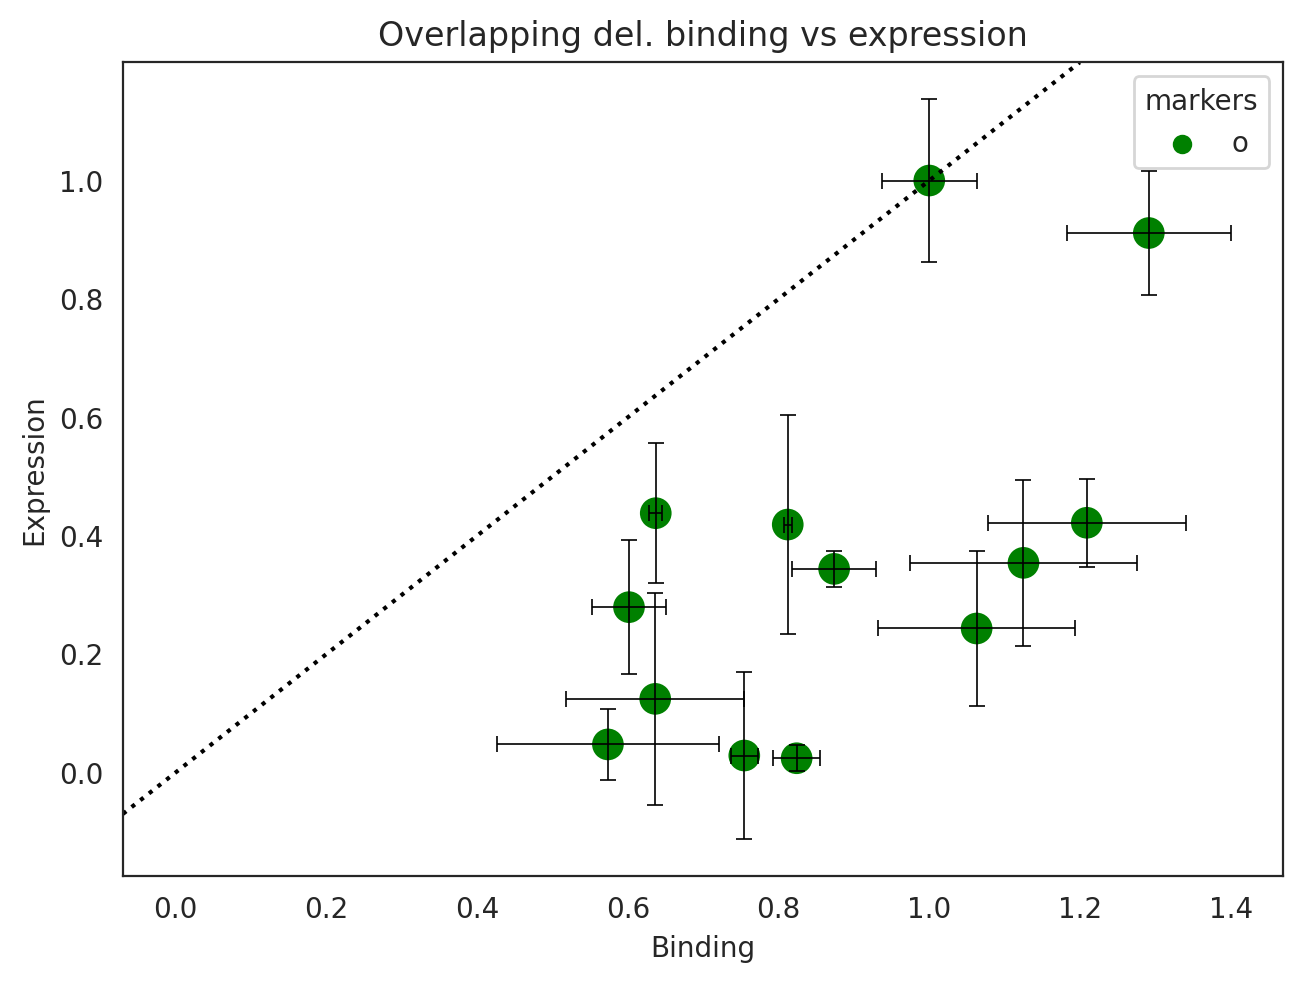

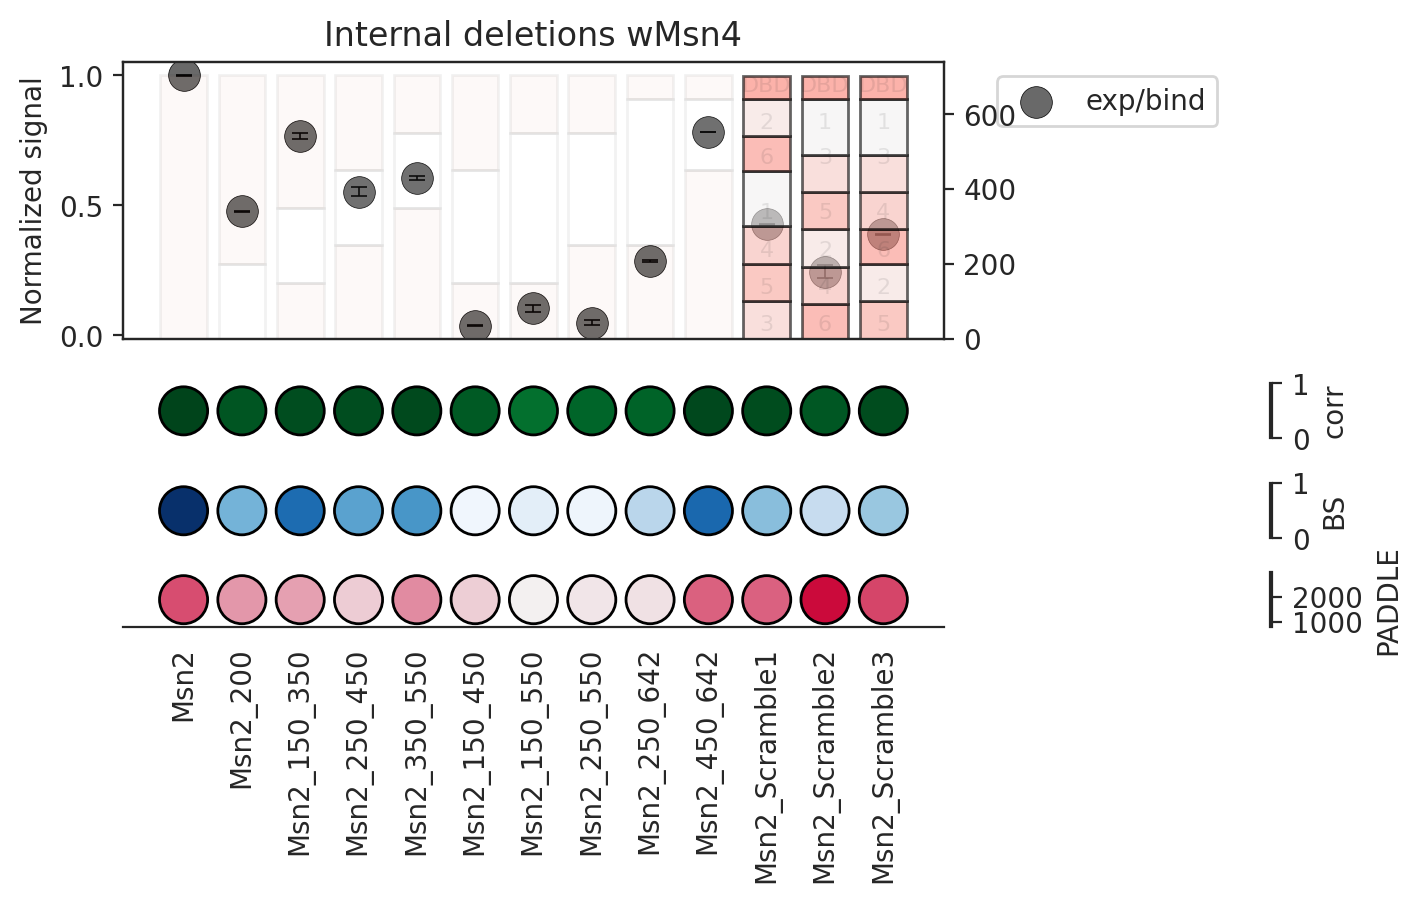

In [26]:
scrambles = ['Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3']
order = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
 'Msn2_150_450','Msn2_150_550', 'Msn2_250_550',
'Msn2_250_642','Msn2_450_642', 'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3']
dat = all_data.loc[pd.Index(order).drop_duplicates()]
order = dat.index
dat = all_data.loc[pd.Index(order).drop_duplicates()].fillna(0).copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'], linewidth=0)
ax.errorbar(data=dat, x='b_s', y='e', yerr='eci', xerr='bci_s', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('Overlapping del. binding vs expression')

fig.savefig('figures/Supp/S_overlapping.pdf')


x = range(dat.shape[0])
y = dat.loc[:, 'a_s']
y2 = dat.loc[:, 'corr_s']

fig, axes = plt.subplots(4,1, figsize=(7,4.4), height_ratios=[5, 1, 1, 1], sharex=True, constrained_layout=True)
ax=axes[0]

secax = ax.twinx()
species = (
    'Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
       'Msn2_150_450', 'Msn2_150_550', 'Msn2_250_550', 'Msn2_250_642',
       'Msn2_450_642'
)
weight_counts = {
    "Above": np.array([0, 0, 150, 250, 350, 150,150,250,250, 450]),
    "Middle": np.array([0, 200, 200, 200, 200,300,400,300, 392, 192]),
     "Below": np.array([704, 504, 354,254, 154, 254,154,154, 62, 62]),
    
}
width = 0.5
bottom = np.zeros(10)

c = {'Below':'darksalmon', 'Middle':'w', 'Above':'darksalmon'}
# i
for boolean, weight_count in weight_counts.items():
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c[boolean], edgecolor='k', alpha=0.05, zorder=1)
    bottom += weight_count

    
species = (
'Msn2_Scramble1', 'Msn2_Scramble2', 'Msn2_Scramble3'
)

scr_len = np.array([149,100,100,100,100,92,62])
scr1 = scr_len[np.array([2,4,3,0,5,1,6])]
scr2 = scr_len[np.array([5,3,1,4,2,0,6])]
scr3 = scr_len[np.array([4,1,5,3,2,0,6])]
a = sns.color_palette("light:salmon", n_colors=7)
hex_colors = np.array(a.as_hex())
scr1_c = hex_colors[np.array([2,4,3,0,5,1,6])]
scr2_c = hex_colors[np.array([5,3,1,4,2,0,6])]
scr3_c = hex_colors[np.array([4,1,5,3,2,0,6])]
scr_c = np.array([scr1_c, scr2_c, scr3_c]).T

weight_counts = dict(zip(np.arange(dat.index.shape[0]), np.array([scr1, scr2, scr3]).T)) 
width = 0.5
bottom = np.zeros(3)


t1 = list(np.array([2,4,3,0,5,1])+1) + ['DBD']
t2 = list(np.array([5,3,1,4,2,0])+1) + ['DBD']
t3 = list(np.array([4,1,5,3,2,0])+1) + ['DBD']


for boolean, weight_count in weight_counts.items():
    c = scr_c[boolean]
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c, edgecolor='k', alpha=0.6, zorder=1)

    secax.text(10, bottom[0]+20, t1[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)
    secax.text(11, bottom[0]+20,t2[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)
    secax.text(12, bottom[0]+20,t3[boolean], zorder=20, alpha=0.1, horizontalalignment='center', size=8)

    bottom += weight_count



secax.set_xticklabels(dat.index, rotation=90)

s=130
c = ax.scatter(x,y, label='exp/bind', s=s,c='dimgray', linewidth=.25, zorder=20, edgecolors='k', cmap='Blues', vmin=0, vmax=1)
ax.errorbar(x, y.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zers'].squeeze().values,zorder=20, fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Internal deletions wMsn4')
ax.legend(bbox_to_anchor=[1,.5,.35,.5])

ax = axes[1]

s = ax.scatter(x, np.zeros(len(x)), c=y2, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='corr', location='right')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

ax = axes[2]

s = ax.scatter(x, np.zeros(len(x)), c=y, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='BS', location='right')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

paddle = all_table.loc[order, 'Paddle_pred_sum']
ax = axes[3]
s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='PADDLE', location='right')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)

fig.savefig('figures/Main/fig2/Fig2D.pdf')

plt.show()

# Fig3

## B

/tmp/ipykernel_248804/403553610.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']].median().index,
/tmp/ipykernel_248804/403553610.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2_dMed15'], rotation=90)


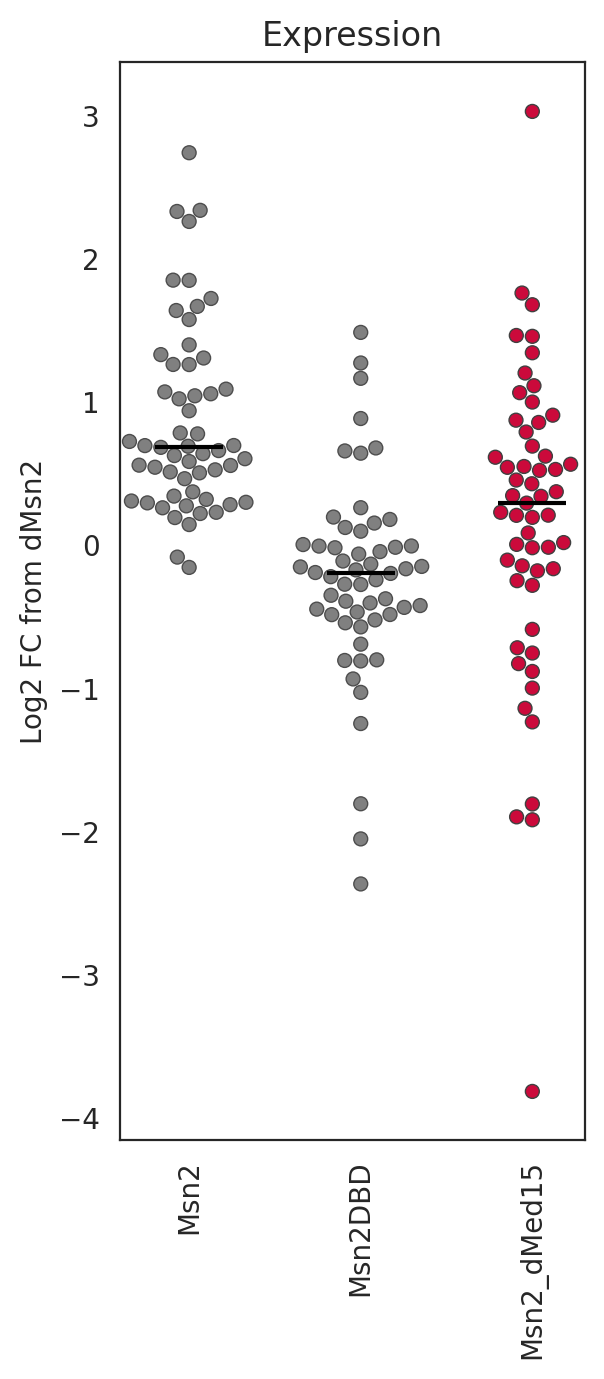

In [27]:
fig, ax = plt.subplots(1, figsize=(3,7))
sns.swarmplot(exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']], palette=['gray','gray', '#cb0a3b'], edgecolors='k', linewidth=.5, ax=ax)
ax.scatter(x = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls', 'Msn2_dGal11']].median().index,
          y = exp_data.loc[binding_comp.index, ['Msn2', 'MSN2_start_nls','Msn2_dGal11']].median().values, s=600, zorder=20, marker='_', c='k', edgecolors='k')

ax.set_ylabel('Log2 FC from dMsn2')
ax.set_xticklabels(['Msn2', 'Msn2DBD', 'Msn2_dMed15'], rotation=90)
ax.set_title('Expression')
fig.savefig('figures/Main/fig3/Fig3B.pdf')

## C

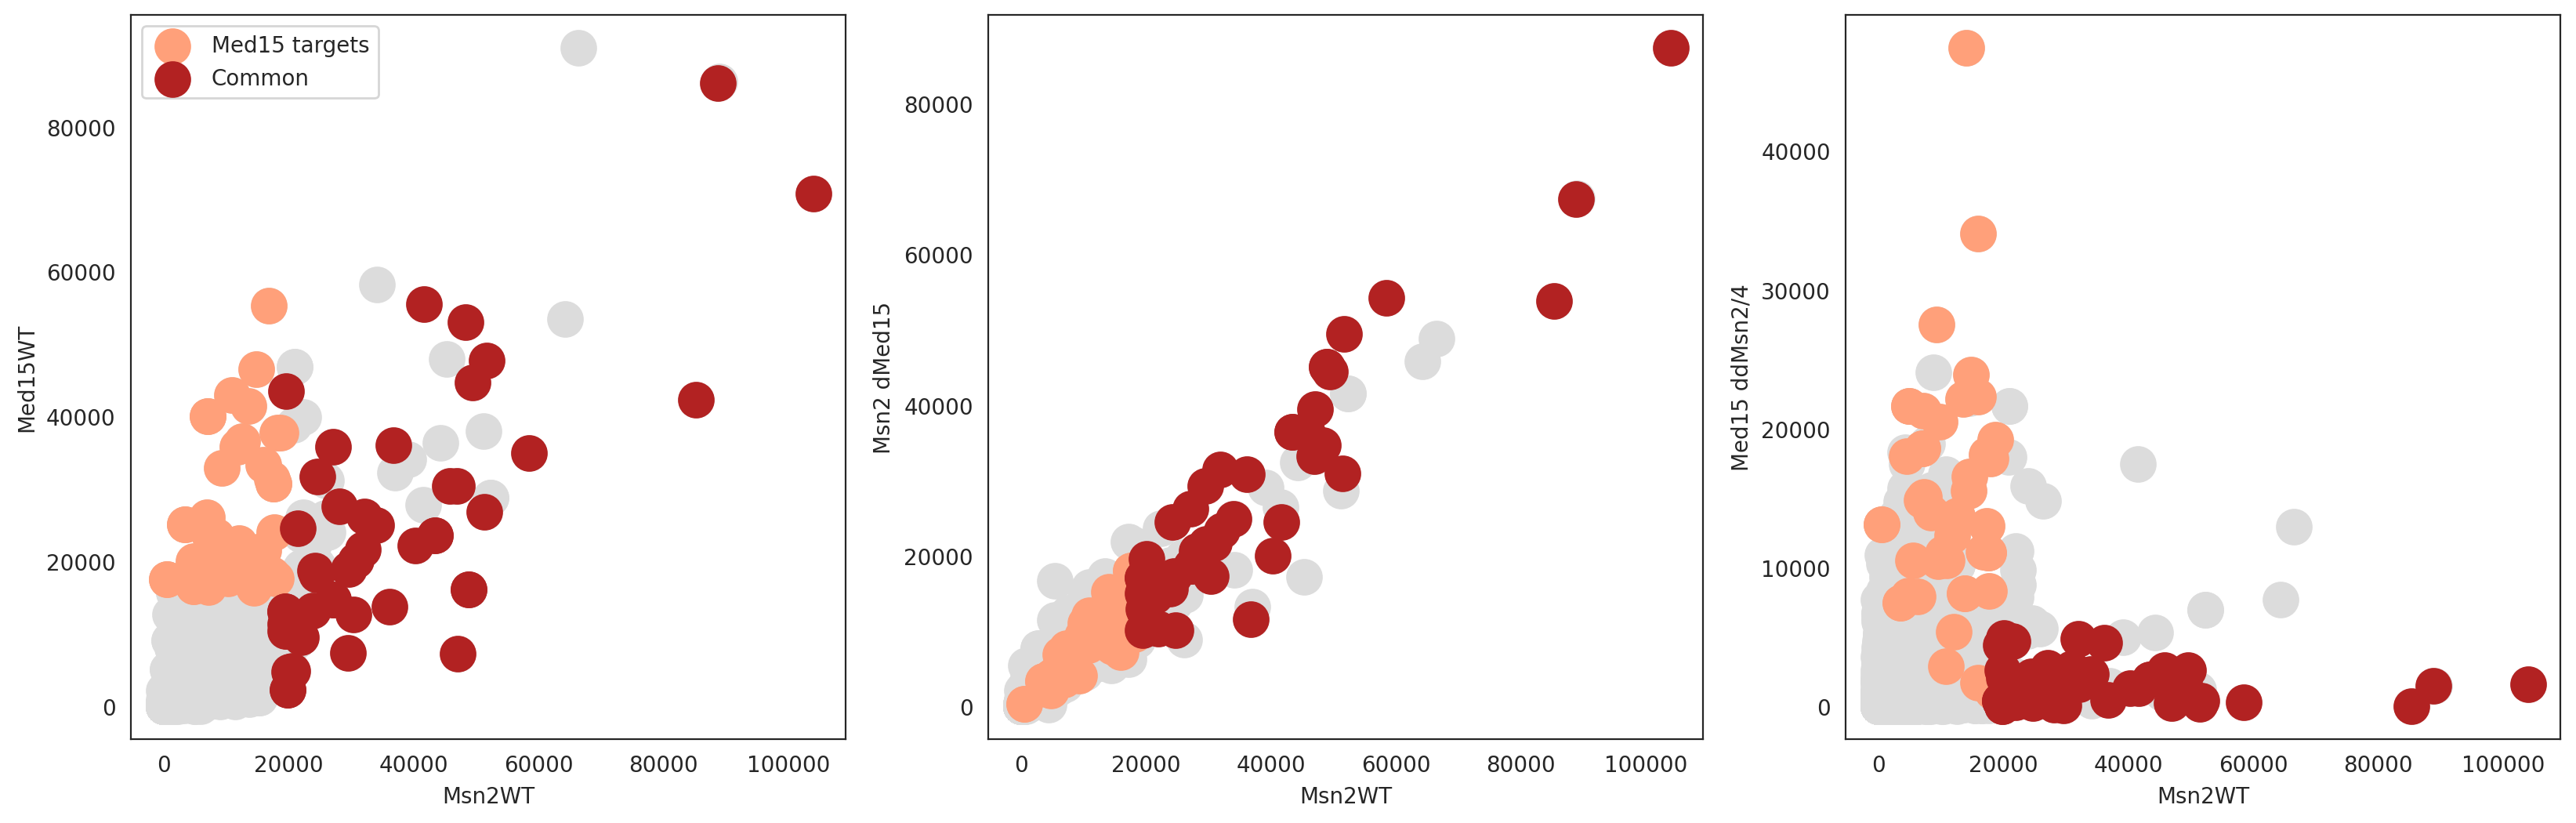

In [28]:
def scatter(x, y, ax, legend=False):
    size=250
    ax.scatter(x, y, c='gainsboro', s=size)
    ax.scatter(x.loc[med_targets],y.loc[med_targets], s=size, label='Med15 targets', c='lightsalmon')
    ax.scatter(x.loc[t_for_med], y.loc[t_for_med], s=size, label='Common', c='firebrick')
    if legend:
        ax.legend()
fig, ax = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=False)
scatter(sp_og.loc[:, 'Msn2'], med.loc[:,'Msn2'], ax[0], legend=True)
scatter(sp_og.loc[:, 'Msn2'], sp_og.loc[:, 'Msn2_dGal11'], ax[1], legend=False)
scatter(sp_og.loc[:, 'Msn2'], offir_dat.loc[:, 'Gal11_ddmsn'], ax[2], legend=False)
ax[0].set_xlabel('Msn2WT')
ax[0].set_ylabel('Med15WT')
ax[1].set_xlabel('Msn2WT')
ax[1].set_ylabel('Msn2 dMed15')
ax[2].set_xlabel('Msn2WT')
ax[2].set_ylabel('Med15 ddMsn2/4')
fig.savefig('figures/Main/fig3/Fig3C.pdf')

## D

/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/utils.py:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


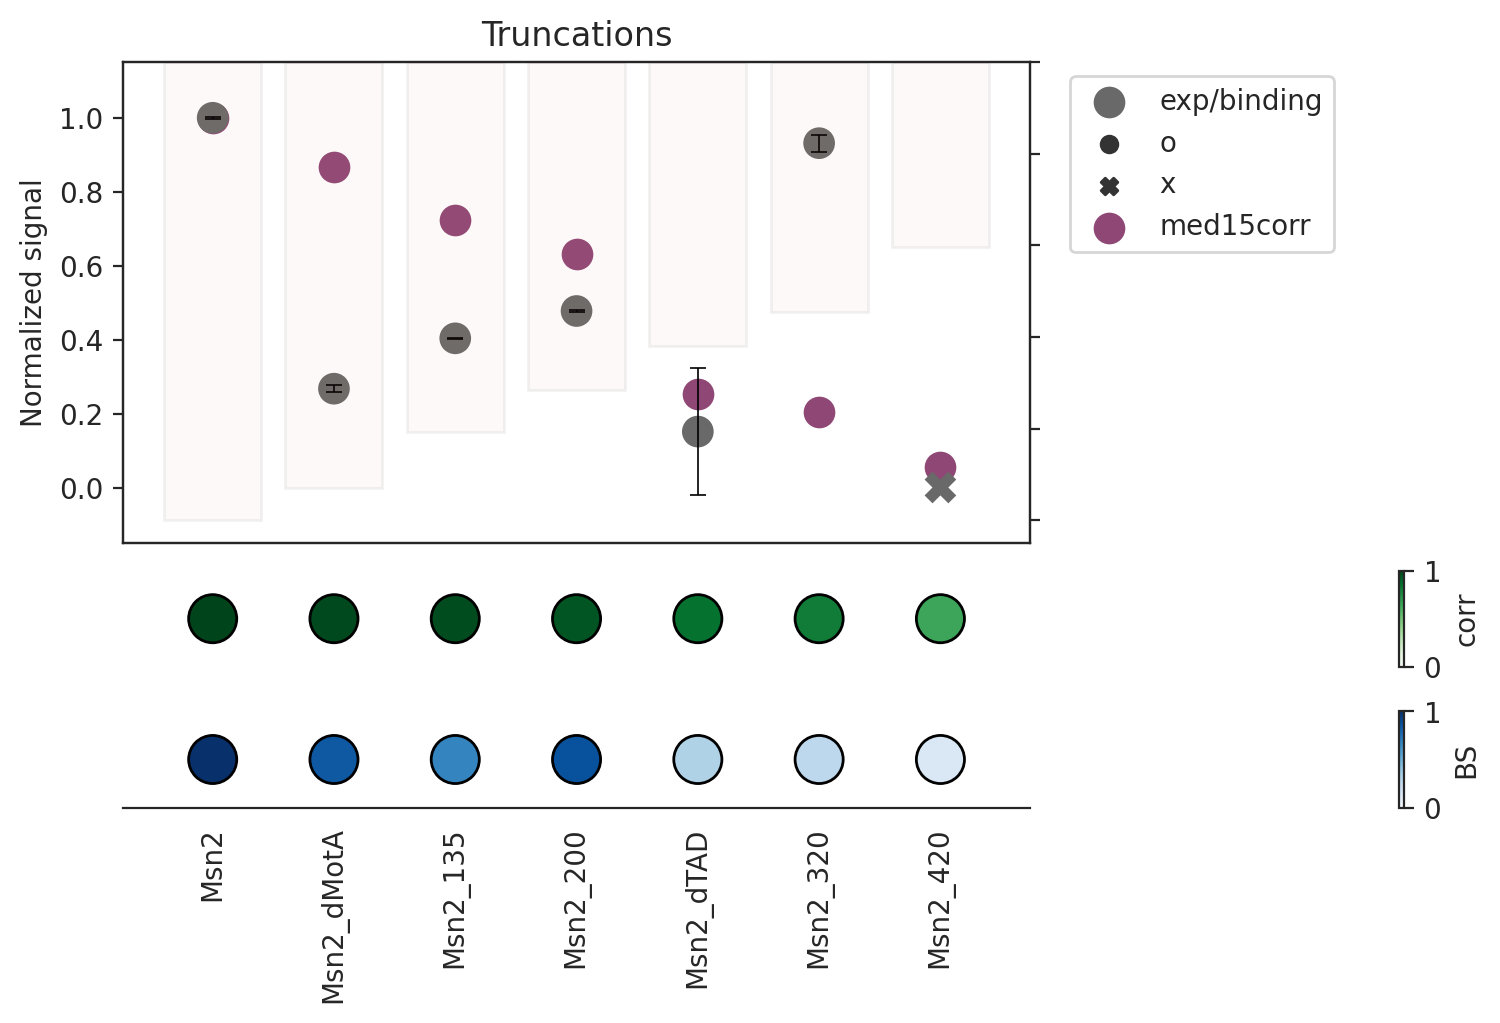

In [29]:
med_truncations = ['Msn2', 'Msn2_dMotA', 'Msn2_135', 'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420',]
med_overlap = ['Msn2', 'Msn2_200','Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',]

order = ['Msn2', 'Msn2_dMotA', 'Msn2_135',
  'Msn2_200','Msn2_dTAD', 'Msn2_320', 'Msn2_420']
trunc_len_perc = [1, 0.9289, 0.808, 0.7159, 0.6207, 0.5454, 0.4034]


dat = all_data.loc[pd.Index(order).drop_duplicates()].copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan

size=130


x = range(len(order))
y = dat.loc[:, 'a_s']
fig, axes = plt.subplots(3, 1, figsize=(7.4,5), height_ratios=[5, 1, 1], sharex=True, constrained_layout=True)
ax = axes[0]
sns.scatterplot(data=dat, x=x,y='a_s',c='dimgray',s=size,
               zorder=20, label='exp/binding', vmax=1, vmin=0, ax=ax, style='markers', linewidth=0)
ax.errorbar(x, y.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zers'].squeeze().values,zorder=20,
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)


x = list(map(pd.Index(order).drop_duplicates().get_loc, med_truncations))
y = dat.loc[med_truncations, 'med_corr_s']
ax.scatter(x,y, s=size, linewidths=0, c='#8f4875', label='med15corr')
ax.set_ylim([-0.15,1.15])
ax.set_xticks(range(len(order)), order, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Truncations')
ax.legend(bbox_to_anchor=[1,.5,.35,.5])
secax = ax.twinx()
minus = lambda x: -x
secax.bar(x,list(map(minus,trunc_len_perc)), zorder=1, alpha=.05, edgecolor='k', color='darksalmon')
secax.set_yticklabels('')

ax = axes[1]
x = range(len(order))
s = ax.scatter(x, np.zeros(len(x)), c=dat.loc[:, 'corr_s'].values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels('')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')

ax = axes[2]
x = range(len(order))
s = ax.scatter(x, np.zeros(len(x)), c=all_data.loc[order, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(order, rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.colorbar(s, location='right', label='BS')

fig.savefig('figures/Main/fig3/Fig3D1.pdf')
plt.show()

/tmp/ipykernel_248804/3182559172.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  s = ax.scatter(x, y1 ,c='dimgray', zorder=20, s=size, label='exp/bind', cmap='Blues',vmax=1, vmin=0)


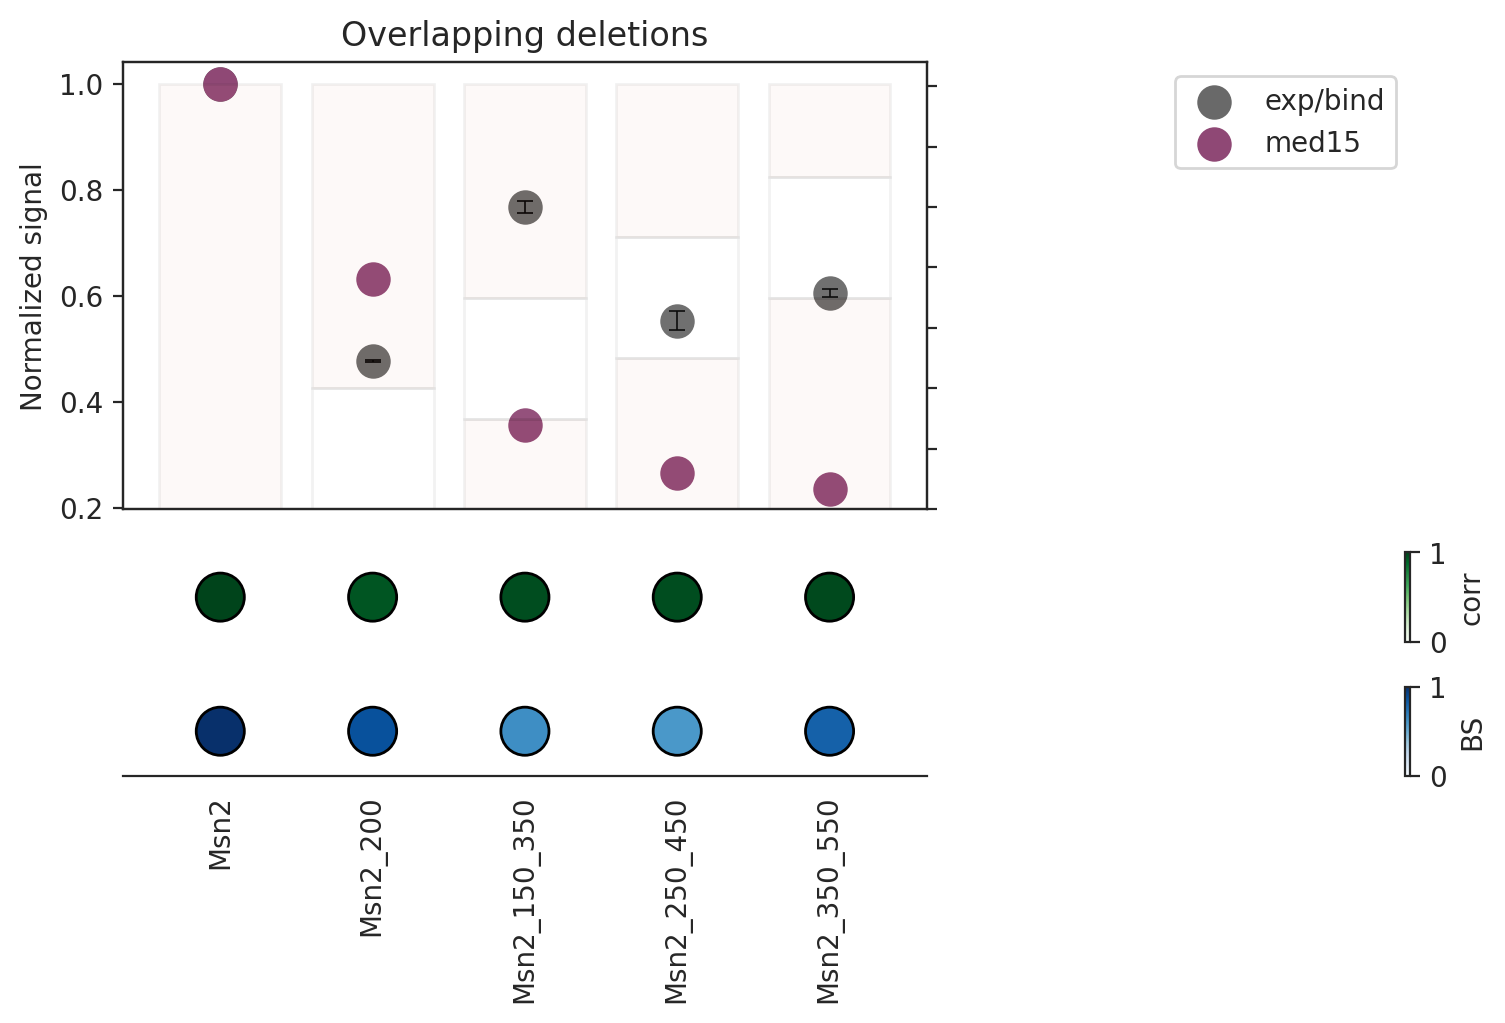

In [30]:
order = ['Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',]

dat = all_data.loc[pd.Index(order).drop_duplicates()]

x = range(dat.shape[0])
x1 = list(map(pd.Index(order).drop_duplicates().get_loc, med_overlap))

y1 = dat.loc[:, 'a_s']
y2 = dat.loc[:, 'corr_s']
y3 = dat.loc[:, 'med_corr_s']

size=130

fig, axes = plt.subplots(3, 1, figsize=(7.4,5), height_ratios=[5, 1, 1], sharex=True, constrained_layout=True)
ax = axes[0]

s = ax.scatter(x, y1 ,c='dimgray', zorder=20, s=size, label='exp/bind', cmap='Blues',vmax=1, vmin=0)
ax.errorbar(x, y1.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zers'].squeeze().values,zorder=20,
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
# ax.scatter(x, y2,c='#9cd1c9', zorder=20, s=size, label='corr')
ax.scatter(x1,y3, c='#8f4875', zorder=20, s=size, label='med15')
ax.set_xticklabels('')

ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Overlapping deletions')
ax.legend(bbox_to_anchor=[1.1,.5,.5,.5])

secax = ax.twinx()
species = (
    'Msn2', 'Msn2_200', 'Msn2_150_350', 'Msn2_250_450', 'Msn2_350_550',
)
weight_counts = {
    "Above": np.array([0, 0, 150, 250, 350, ]),
    "Middle": np.array([0, 200, 200, 200, 200,]),
     "Below": np.array([704, 504, 354,254, 154,]),
    
}
width = 0.5
bottom = np.zeros(5)

c = {'Below':'darksalmon', 'Middle':'w', 'Above':'darksalmon'}
# i
for boolean, weight_count in weight_counts.items():
    p = secax.bar(species, weight_count, .8, bottom=bottom, color=c[boolean], edgecolor='k', alpha=0.05, zorder=1)
    bottom += weight_count
secax.set_yticklabels('')

ax = axes[1]

x = range(len(order))
s = ax.scatter(x, np.zeros(len(x)), c=all_data.loc[order, 'corr_s'].values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')

ax = axes[2]

x = range(len(order))
s = ax.scatter(x, np.zeros(len(x)), c=all_data.loc[order, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(order, rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.colorbar(s, location='right', label='BS')

fig.savefig('figures/Main/fig3/Fig3D2.pdf')

plt.show()

## E

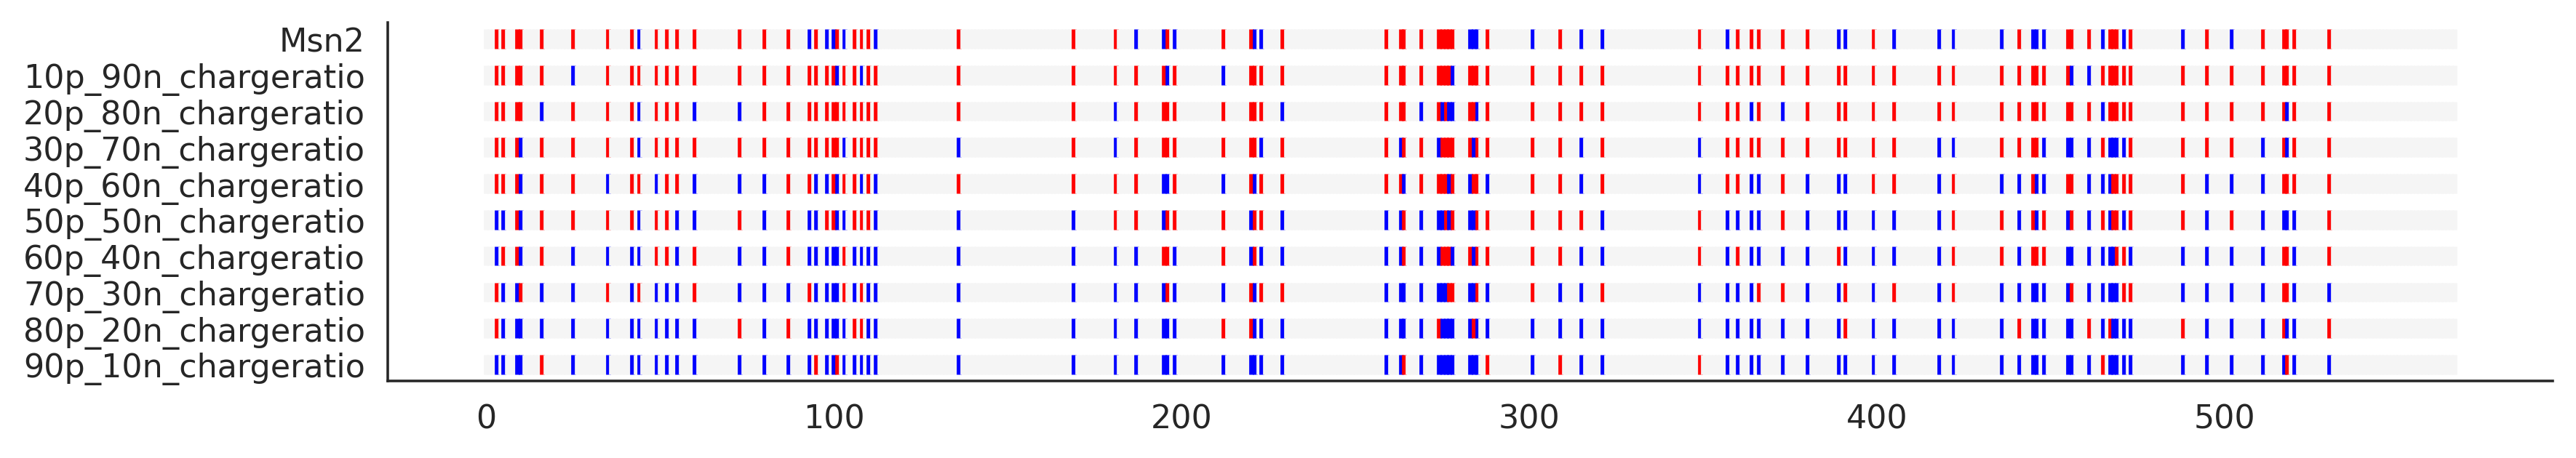

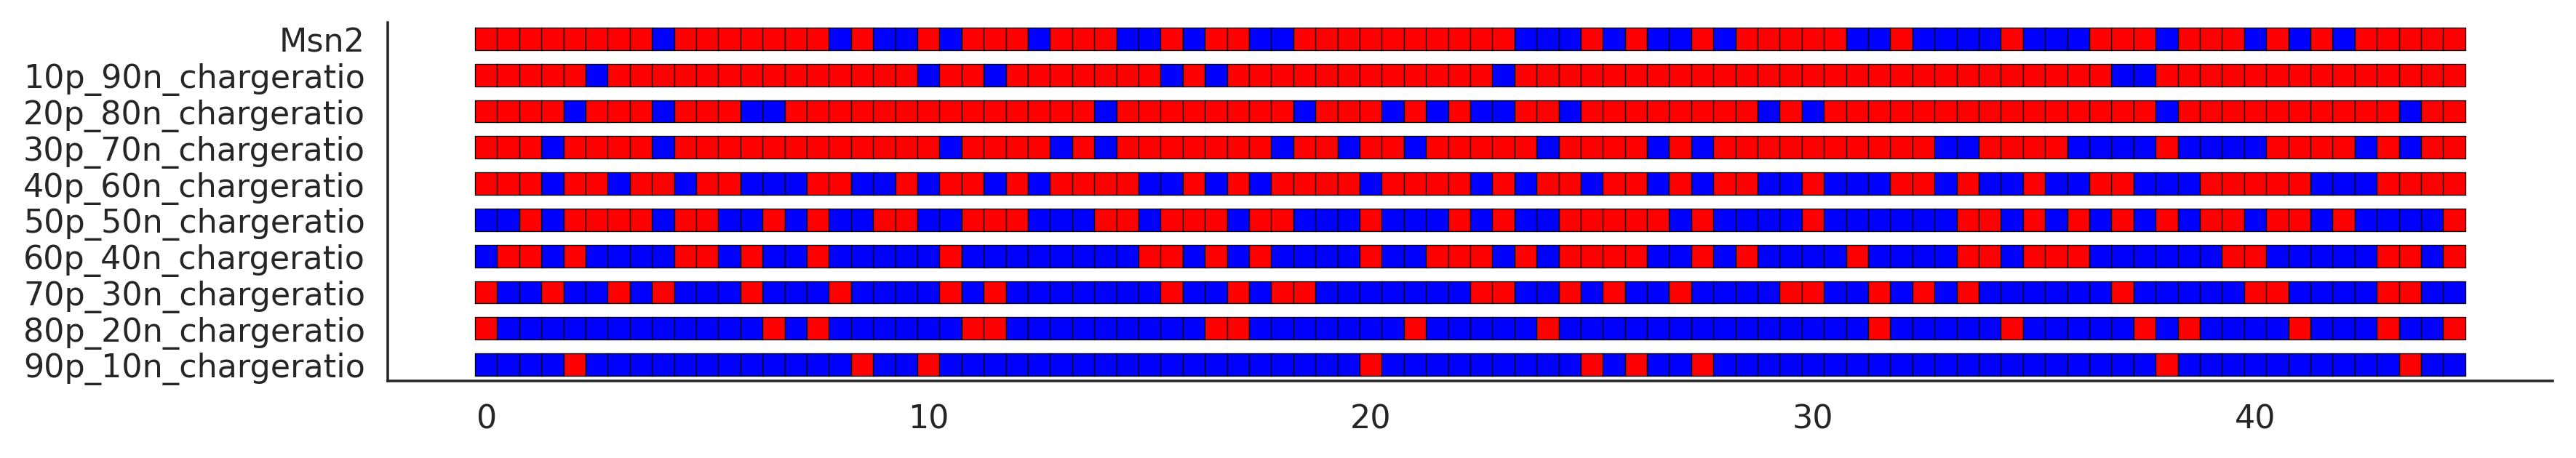

In [31]:
data_table = pd.read_csv('data/strain_data_table.csv', index_col=1).loc[:, ['Msn2_Amino_acid_seq_nozf', 'Msn2_Amino_acid_seq_wzf']]

order = ['Msn2', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']

nozf_seqs_chargeratio = data_table.loc[order, 'Msn2_Amino_acid_seq_nozf']

seq = nozf_seqs_chargeratio.loc['Msn2']

def colour_letter(letter):
    if letter.upper() in ['D', 'E']:
        return 'r'
    elif letter.upper() in ['K', 'R']:
        return 'b'
    else:
        return 'whitesmoke'
    
numeric = dict()
for name, seq in nozf_seqs_chargeratio.to_dict().items():
    numeric[name] = list(map(colour_letter, seq))
coloured = pd.DataFrame(numeric).transpose()

custom = sns.color_palette("blend:#6470b5,#E5E4E2,#cb0a3b", as_cmap=True)

fig, ax = plt.subplots(1, dpi=160, figsize=(12,2))
i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(coloured.shape[1]), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='|')
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
sns.despine(fig)

coloured = coloured[coloured != 'whitesmoke'].dropna(axis=1)

fig, ax = plt.subplots(1, dpi=160, figsize=(12,2))
i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(start=0, stop=coloured.shape[1]/2, step=.5), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='s', edgecolors='k', linewidths=.3, s=48)
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
sns.despine(fig)
fig.savefig('figures/Main/fig3/Fig3E.pdf')


## F + Supp chargeratio

/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/utils.py:117: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  scout = method(scout_x, scout_y, **kws)
/home/labs/barkailab/vovam/papers_env/lib/python3.8/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


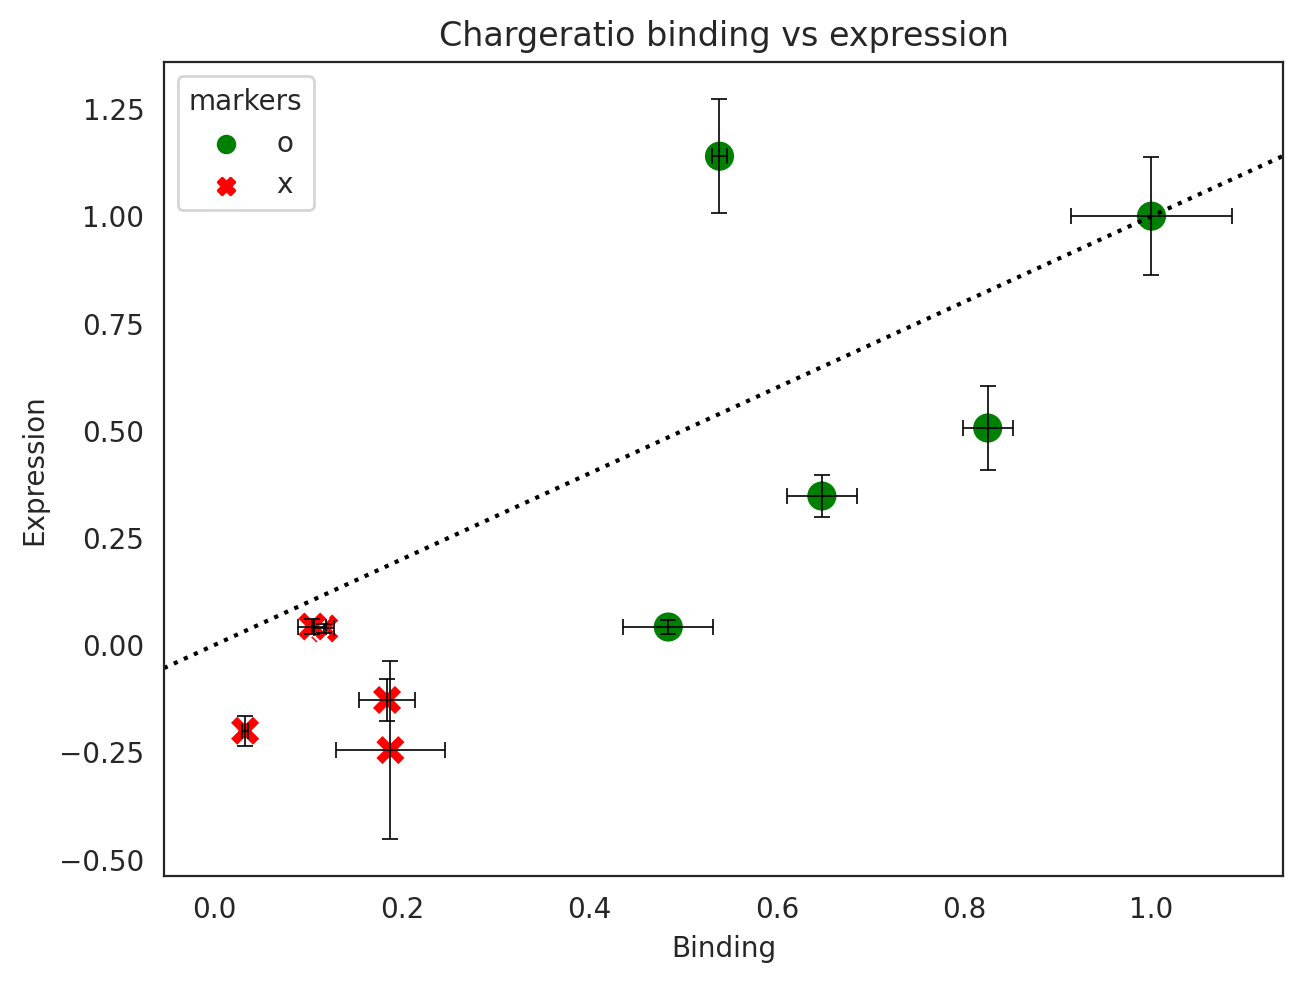

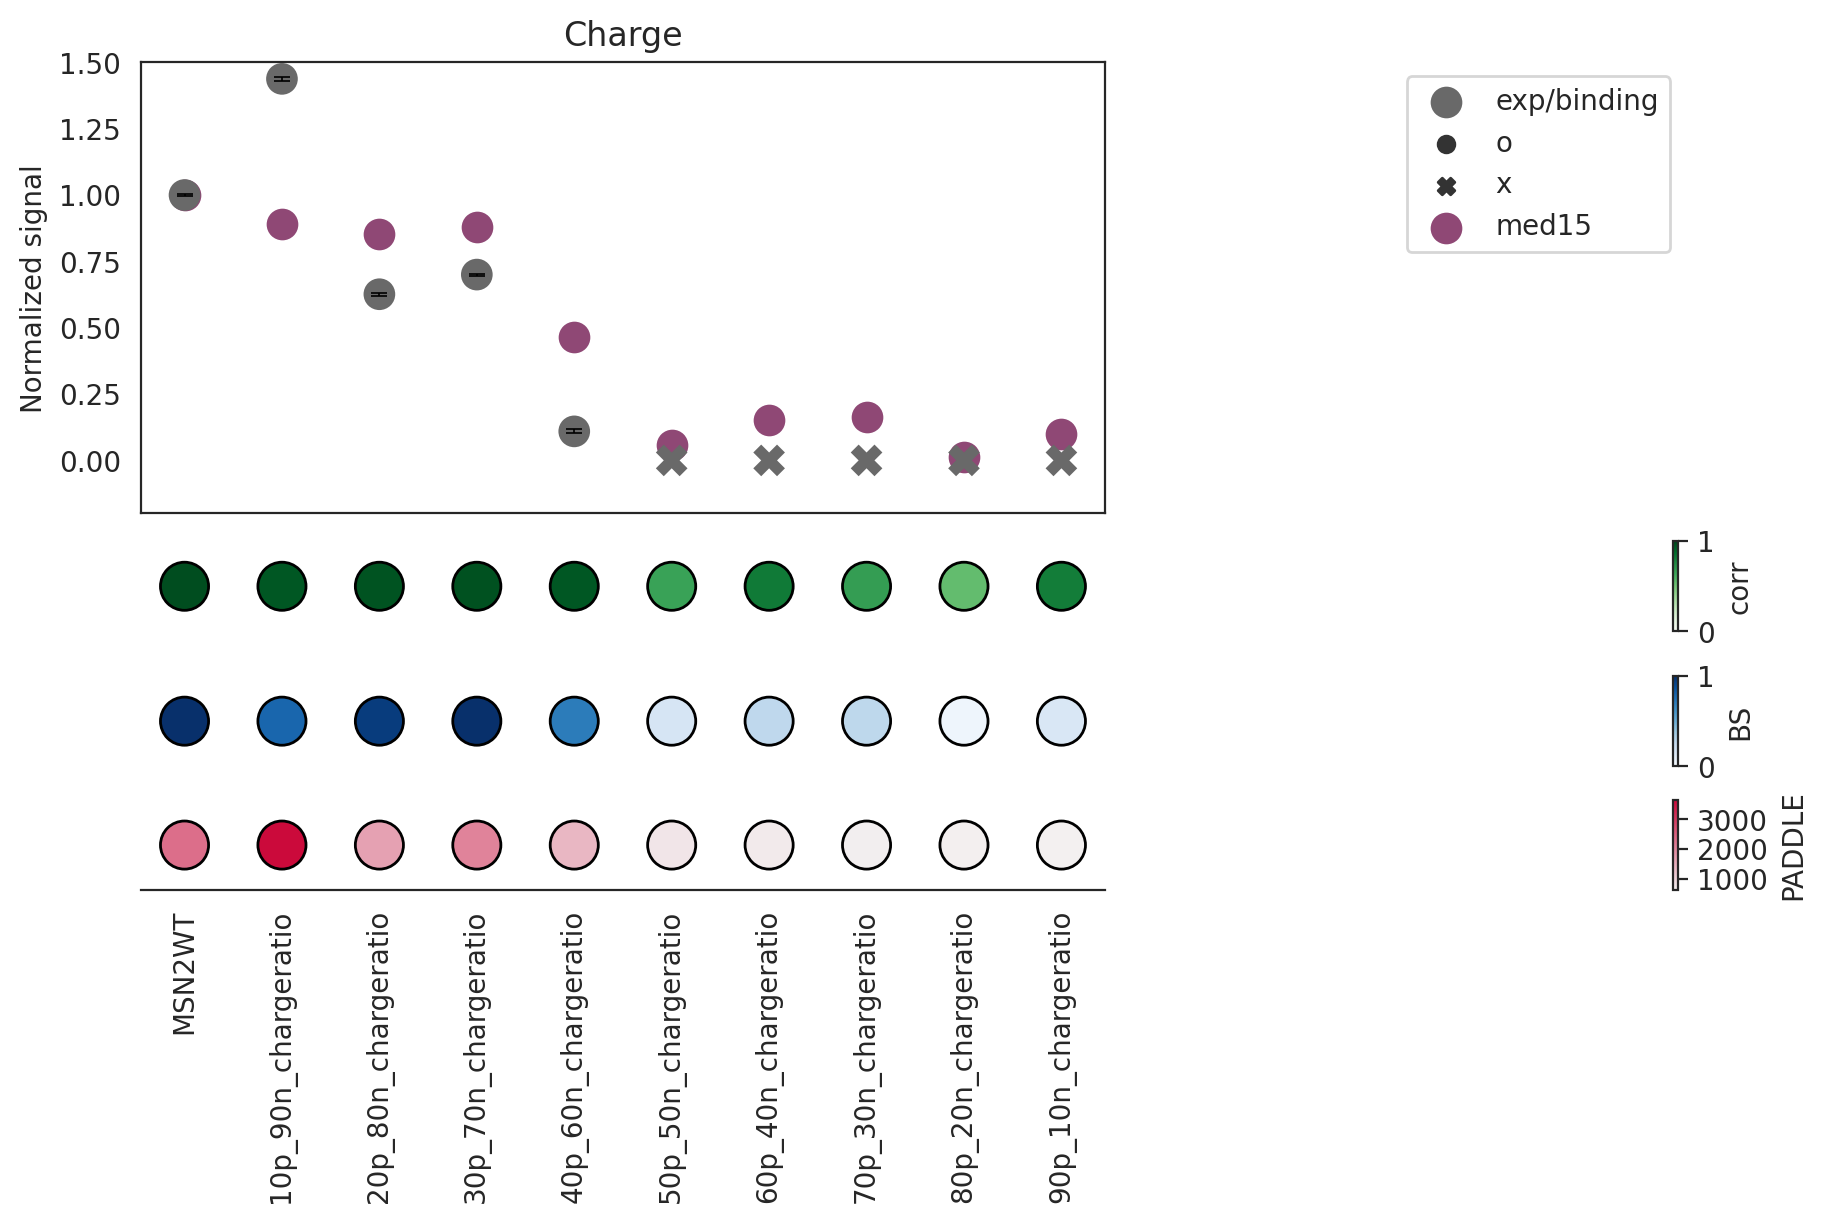

In [32]:
order = ['MSN2WT', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']



dat = all_data.loc[pd.Index(order).drop_duplicates()].copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_f<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_f'] = 0
dat.loc[dat.query("markers=='x'").index, 'zerf'] = math.nan

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_f', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'])
ax.errorbar(data=dat, x='b_f', y='e', yerr='eci', xerr='bci_f', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')
ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('Chargeratio binding vs expression')

fig.savefig('figures/Supp/S_chargeratio.pdf')

x = range(dat.shape[0])
y1 = dat.loc[:, 'a_f']
y2 = dat.loc[:, 'corr_f']
y3 = dat.loc[order, 'med_corr_f']


fig, axes = plt.subplots(4, 1, figsize=(9,6), height_ratios=[5, 1, 1, 1], sharex=True, constrained_layout=True)
size=130

ax = axes[0]
sns.scatterplot(data=dat, x=x,y='a_f',c='dimgray',s=size, linewidth=0,
               zorder=20, label='exp/binding', vmax=1, vmin=0, ax=ax, style='markers')
ax.errorbar(x, y1.squeeze().values, dat.loc[pd.Index(order).drop_duplicates(), 'zerf'].squeeze().values,zorder=20,
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.scatter(x, y3, c='#8f4875', s=size, linewidths=0, label='med15',)

ax.set_ylim([-0.2,1.5])
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
ax.set_ylabel('Normalized signal')
ax.set_title('Charge')
ax.legend(bbox_to_anchor=[1.1,.5,.5,.5])
secax.set_frame_on(False)

ax = axes[1]
s = ax.scatter(x, np.zeros(len(x)), c=all_data.loc[order, 'corr_s'].values, cmap='Greens', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='corr')

ax = axes[2]
s = ax.scatter(x, np.zeros(len(x)), c=all_data.loc[order, 'b_s'].values, cmap='Blues', edgecolors='k', s=300, vmax=1, vmin=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, )
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
fig.colorbar(s, location='right', label='BS')

paddle = all_table.loc[order, 'Paddle_pred_sum']
ax = axes[3]
s = ax.scatter(paddle.index, np.zeros(paddle.shape[0]), c=paddle, cmap=salmon_map, edgecolors='k', s=300)
ax.set_xticks(range(dat.shape[0]), dat.index, rotation=90)
fig.colorbar(s, label='PADDLE', location='right')
ax.set_yticklabels('')
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False)
fig.savefig('figures/Main/fig3/Fig3F.pdf')

plt.show()

## Supp LIVFWY delt

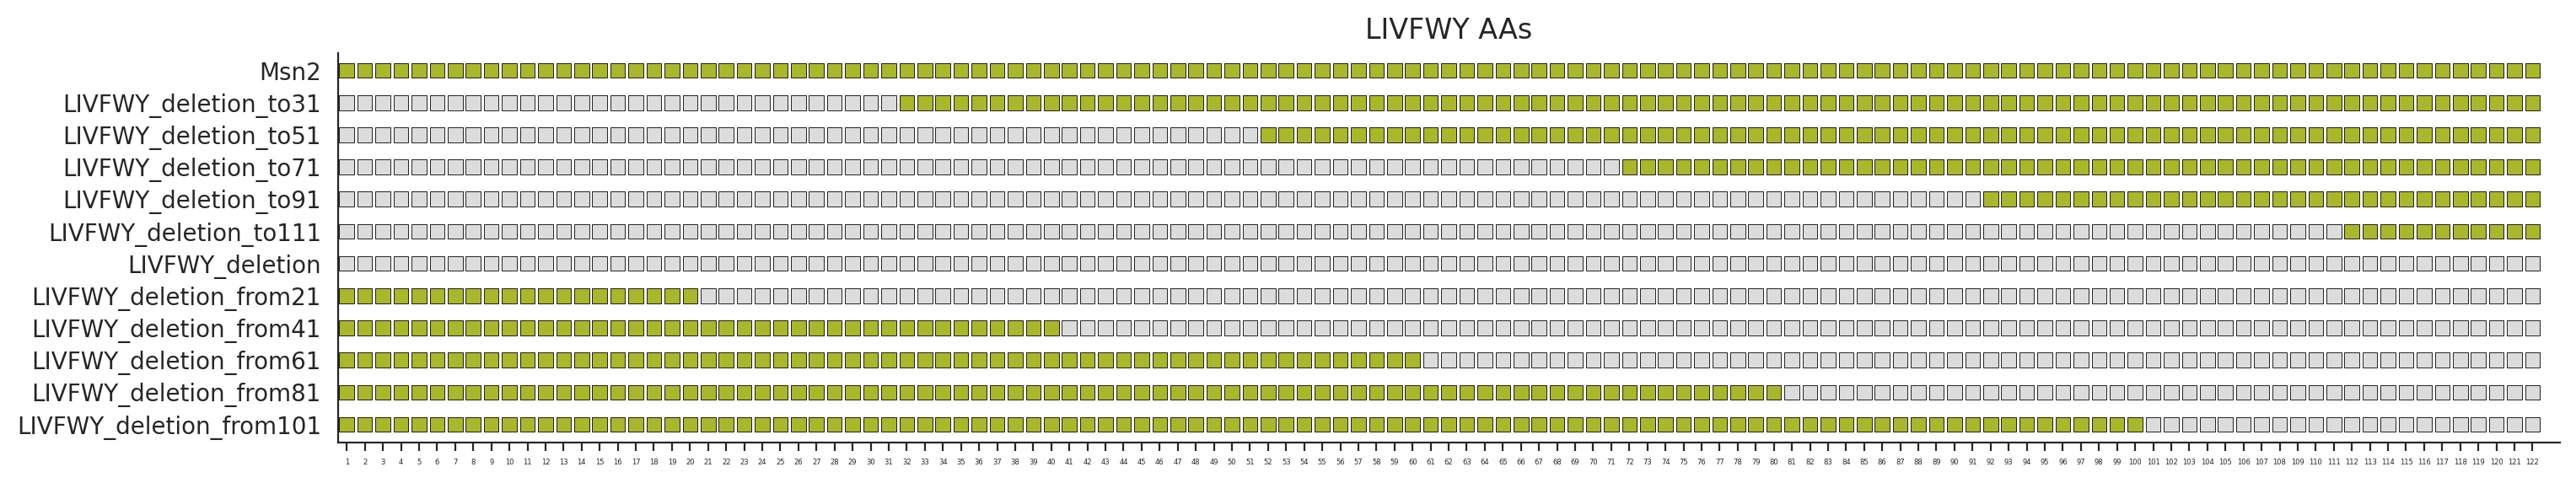

In [33]:
hydroph_seq = data_table.filter(regex='Msn2$|LIVFWY_deletion', axis=0).loc[:, 'Msn2_Amino_acid_seq_nozf'].to_dict()
hyd_fync = lambda x: True if x in 'LIVFWY' else False

dyro = dict()
for name, seq in hydroph_seq.items():
    dyro[name] = list(np.array(list(seq))[np.array(list(map(hyd_fync, seq)))])
dyro['LIVFWY_deletion'] = ['deleted'] * len(dyro['Msn2'])
dyro['LIVFWY_deletion_from101'] = dyro['LIVFWY_deletion_from101'] + ['deleted'] * 22
dyro['LIVFWY_deletion_from21'] = dyro['LIVFWY_deletion_from21'] + ['deleted'] * 102

dyro['LIVFWY_deletion_from41'] = dyro['LIVFWY_deletion_from41'] + ['deleted'] * 82
dyro['LIVFWY_deletion_from61'] = dyro['LIVFWY_deletion_from61'] + ['deleted'] * 62
dyro['LIVFWY_deletion_from81'] = dyro['LIVFWY_deletion_from81'] + ['deleted'] * 42
dyro['LIVFWY_deletion_to111'] = ['deleted'] * 111 + dyro['LIVFWY_deletion_to111'] 
dyro['LIVFWY_deletion_to31'] = ['deleted'] * 31 + dyro['LIVFWY_deletion_to31'] 
dyro['LIVFWY_deletion_to51'] = ['deleted'] * 51 + dyro['LIVFWY_deletion_to51'] 
dyro['LIVFWY_deletion_to71'] = ['deleted'] * 71 + dyro['LIVFWY_deletion_to71'] 
dyro['LIVFWY_deletion_to91'] = ['deleted'] * 91 + dyro['LIVFWY_deletion_to91'] 
seqs_df_livfwy = pd.DataFrame({i:pd.Series(k) for i, k in dyro.items()}).transpose().drop('LIVFWY_deletion_to11')

coloured = seqs_df_livfwy.applymap(lambda x: '#aab62c' if x in 'LIVFWY' else 'gainsboro')

coloured = coloured.loc[['Msn2','LIVFWY_deletion_to31', 'LIVFWY_deletion_to51', 'LIVFWY_deletion_to71',
       'LIVFWY_deletion_to91', 'LIVFWY_deletion_to111', 'LIVFWY_deletion', 'LIVFWY_deletion_from21',
       'LIVFWY_deletion_from41', 'LIVFWY_deletion_from61',
       'LIVFWY_deletion_from81', 'LIVFWY_deletion_from101',
       ]]

fig, ax = plt.subplots(1, figsize=(17,3))

i = coloured.shape[0]
while i > 0:
    ax.scatter(np.arange(coloured.shape[1]), np.zeros(coloured.shape[1])+i, 
               c=coloured.iloc[-i].values, marker='s', edgecolors='k', linewidths=.3, s=40)
    i -= 1
ax.set_yticks(range(1, coloured.shape[0]+1), coloured.index.values[::-1])
ax.set_xlim([-.5, 122.5])
ax.set_xticks(np.arange(122), np.arange(122)+1,size=3 )
sns.despine(fig)
ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
ax.set_title('LIVFWY AAs')
fig.savefig('figures/Supp/S_scheme_livfwy.pdf')

In [34]:
del_from = ['LIVFWY_deletion', 'LIVFWY_deletion_from21','LIVFWY_deletion_from41','LIVFWY_deletion_from61','LIVFWY_deletion_from81','LIVFWY_deletion_from101', 'MSN2WT', ]
del_to = ['MSN2WT', 'LIVFWY_deletion_to31', 'LIVFWY_deletion_to51',
       'LIVFWY_deletion_to71', 'LIVFWY_deletion_to91','LIVFWY_deletion_to111','LIVFWY_deletion',]

/tmp/ipykernel_248804/422757051.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_xticklabels(axi.get_xticklabels(), rotation=90)


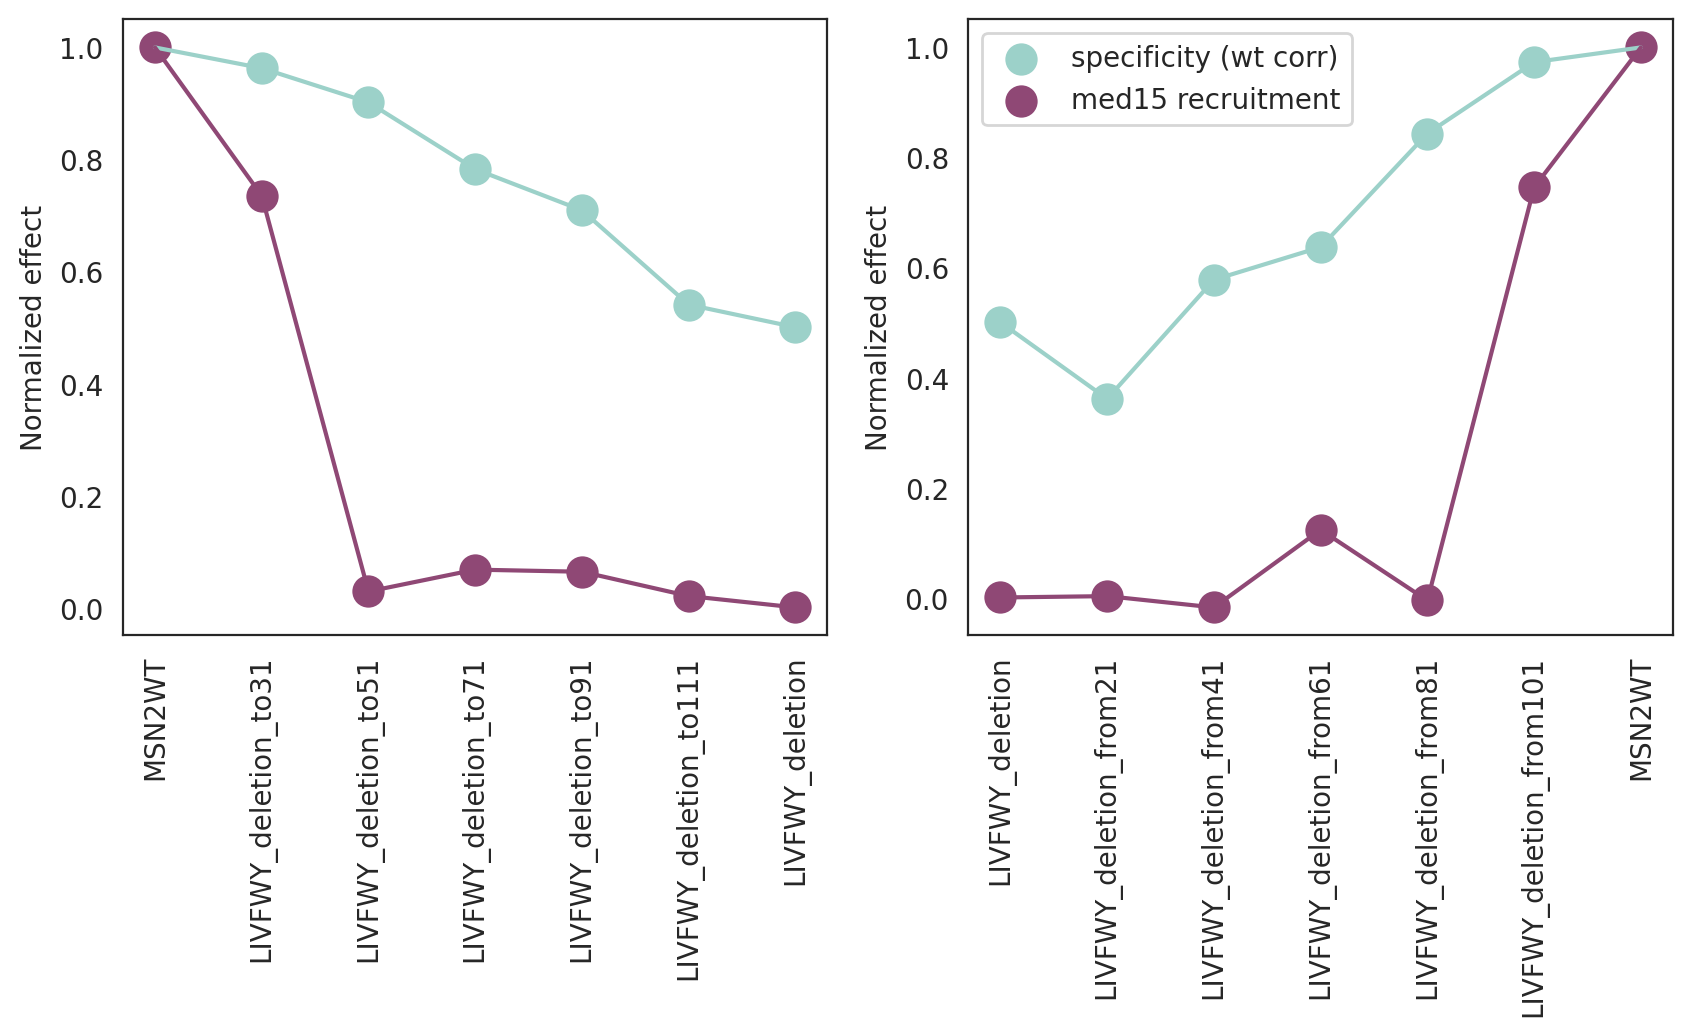

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
size=160
sns.scatterplot(data=all_data.loc[del_from], x=del_from, y='corr_f', ax=ax[1], s=size, label='specificity (wt corr)', c='#9cd1c9')
ax[1].plot(del_from,all_data.loc[del_from, 'corr_f'], c='#9cd1c9')
sns.scatterplot(data=all_data.loc[del_to], x=del_to, y='corr_f', ax=ax[0], s=size, c='#9cd1c9')
ax[0].plot(del_to, all_data.loc[del_to, 'corr_f'], c='#9cd1c9')

sns.scatterplot(data=all_data.loc[del_from], x=del_from, y='med_corr_f', ax=ax[1], s=size, c='#8f4875', label='med15 recruitment',)
ax[1].plot(del_from, all_data.loc[del_from, 'med_corr_f'], c='#8f4875')

sns.scatterplot(data=all_data.loc[del_to], x=del_to, y='med_corr_f', ax=ax[0], s=size, c='#8f4875') 
ax[0].plot(del_to, all_data.loc[del_to, 'med_corr_f'], c='#8f4875')

for axi in ax:
    axi.set_xticklabels(axi.get_xticklabels(), rotation=90)
    axi.set_ylabel('Normalized effect')
fig.savefig('figures/Supp/S_livfwy.pdf')

# Fig 4

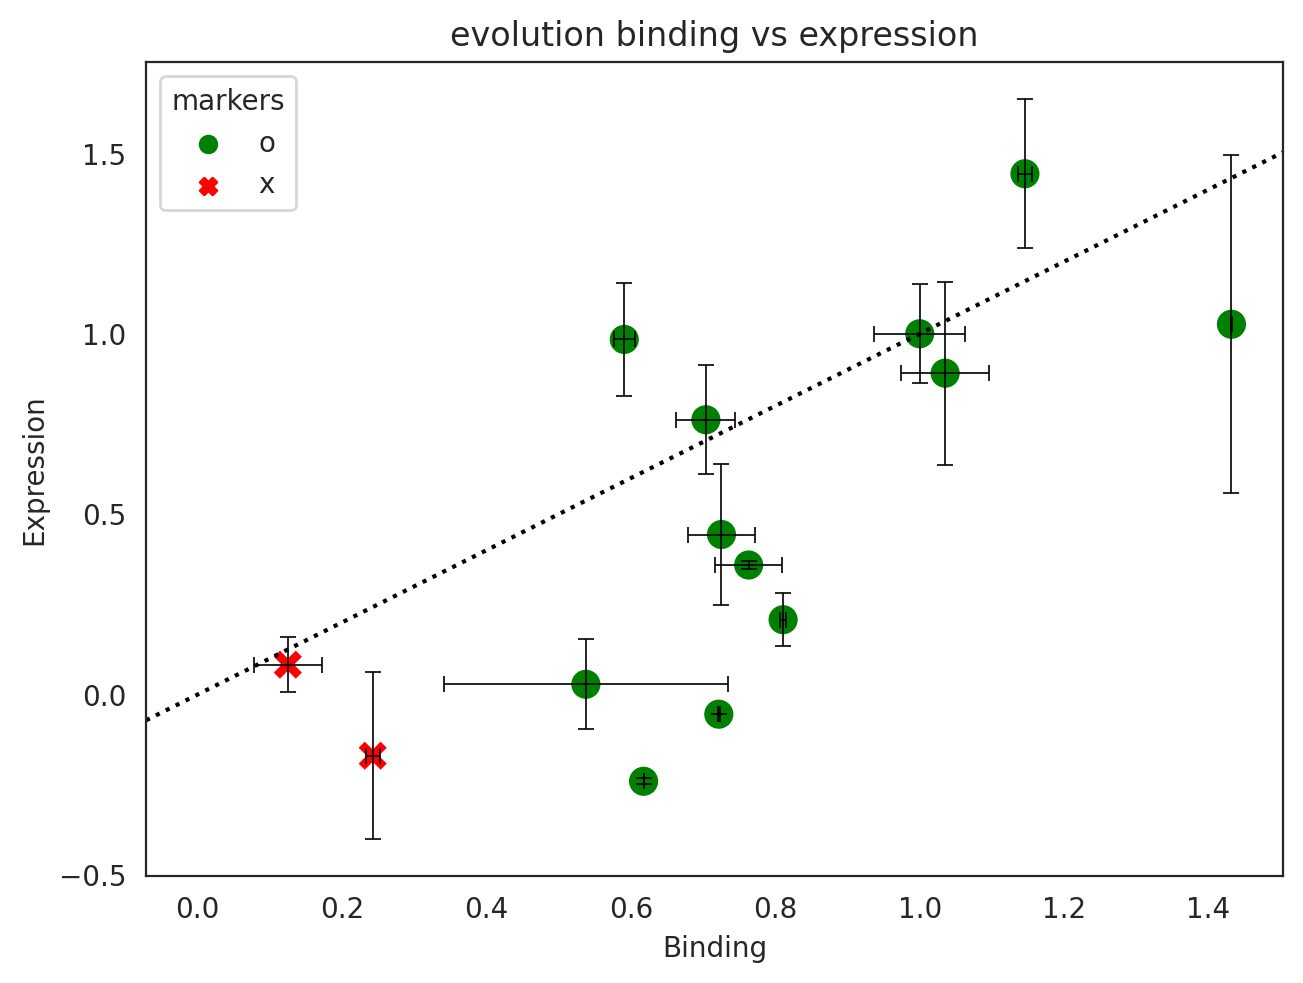

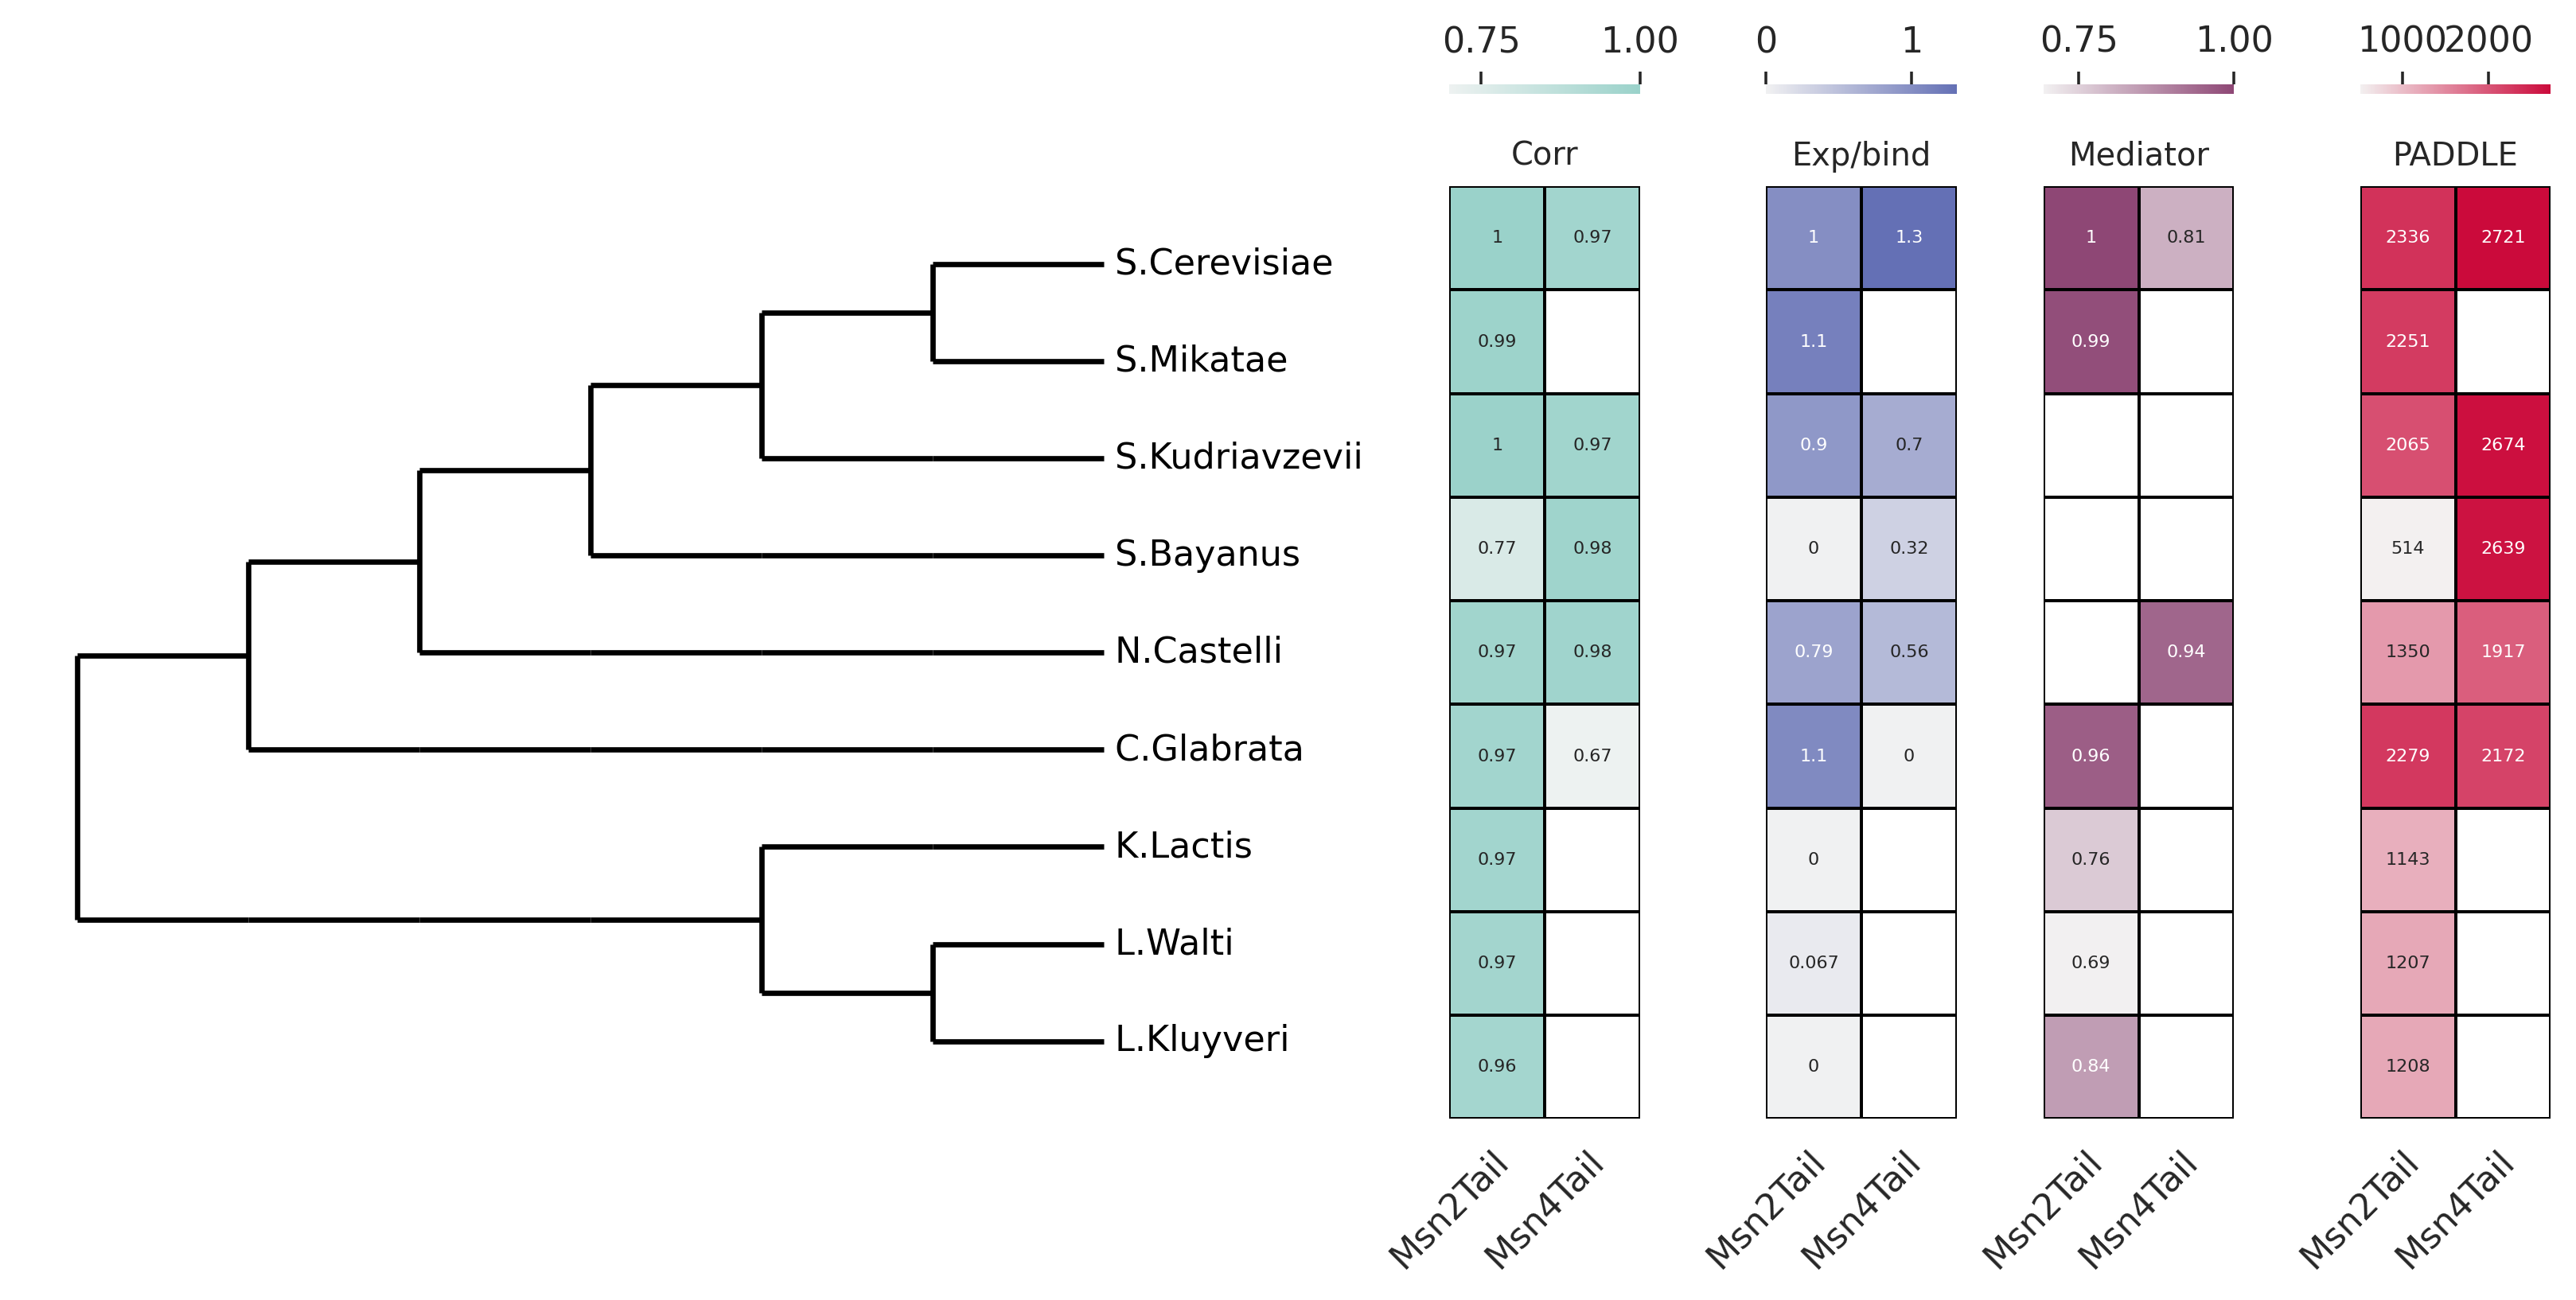

In [36]:
order = ['Msn2','Msn2_sCerm4T',  'Msn2_sMik_m2_Tail', 'Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail','Msn2_cGla_m2_Tail', 'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_lWal_m_Tail', 'Msn2_sKlu_m_Tail']
dat = all_data.loc[order]

dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_s<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_s'] = 0
dat.loc[dat.query("markers=='x'").index, 'zers'] = math.nan
fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_s', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'])
ax.errorbar(data=dat, x='b_s', y='e', yerr='eci', xerr='bci_s', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')
ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('evolution binding vs expression')
fig.savefig('figures/Supp/S_evo.pdf')



evos = ['S.cerevisiae', 'S.Mikatae', 'S.kudriavzevii', 'S.bayanus', 'N.castelli', 'C.glabrata', 'K.Lactis', 'L.walti', 'L.kluyveri']

treedata = "((((((S.Cerevisiae, S.Mikatae),( S.Kudriavzevii)), ((S.Bayanus))), (((N.Castelli)))), ((((C.Glabrata))))), (((((K.Lactis),(L.Walti, L.Kluyveri))))))"
handle = StringIO(treedata)
tree = Phylo.read(handle, "newick")


fig, axes = plt.subplots(1,5,figsize=(10,5), constrained_layout=True, width_ratios=[7,1,1,1,1], dpi=160)
ax = axes[0]
Phylo.draw(tree, do_show=False, axes=ax,)
sns.despine(ax=ax, top=True, bottom=True, left=True, right=True)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlabel('')

ax=axes[1]
evo_bind = pd.DataFrame(dat.loc[:, 'corr_s'])
evo_bind.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_bind.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_bind.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_bind.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan

evo_bind = evo_bind.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_bind = pd.DataFrame(evo_bind.values.reshape(-1,2))

sns.heatmap(evo_bind, ax=ax, cmap=bcmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, vmin=0.7, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Corr', size=9)

ax=axes[2]
evo_exp = dat.loc[:, 'a_s']
evo_exp.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_exp.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_exp.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_exp.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan

evo_exp = evo_exp.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_exp = pd.DataFrame(evo_exp.values.reshape(-1,2))
sns.heatmap(evo_exp, ax=ax, cmap=ecmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Exp/bind', size=9)

ax=axes[3]
med_drop = ['Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail', 'Msn2_sCas_m2_Tail', 'Msn2_cGla_m4_Tail']
evo_med = dat.loc[:, 'med_corr_s'].copy()
evo_med.loc['Msn2_sKud_m2_Tail'] = math.nan
evo_med.loc['Msn2_sKud_m4_Tail'] = math.nan
evo_med.loc['Msn2_sBay_m2_Tail'] = math.nan
evo_med.loc['Msn2_sBay_m4_Tail'] = math.nan
evo_med.loc['Msn2_sCas_m2_Tail'] = math.nan
evo_med.loc['Msn2_cGla_m4_Tail'] = math.nan
evo_med.loc['Msn2_sMik_m4_Tail'] = math.nan
evo_med.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
evo_med.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
evo_med.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan
evo_med = evo_med.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
       'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
       'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
       'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy',
       'Msn2_sKlu_m_Tail',

'Msn2_sKlu_m_Tail_dummy']]

evo_med = pd.DataFrame(evo_med.values.reshape(-1,2))
sns.heatmap(evo_med, ax=ax, cmap=mcmap, cbar_kws=dict(location='top'), linecolor='k', linewidths=.5, annot=True, annot_kws={'size':5})
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('Mediator', size=9)



ax = axes[4]
path = 'data/paddle_predictions/evolutions/'
lst = os.listdir(path)
def loadnpy(path, file):
    return np.load(os.path.join(path, file))[:641]

evo_paddle = pd.DataFrame({name.replace('.npy', ''):pd.Series(loadnpy(path, name)) for name in lst})
d = np.load('data/paddle_predictions/scrambles/MSN2WT.npy')

df = pd.concat([pd.DataFrame(d, columns=['Msn2']), evo_paddle], axis=1).loc[:, order]

pred_sum = df.sum().copy()
pred_sum.loc['Msn2_sMik_m4_Tail'] = math.nan
pred_sum.loc['Msn2_kLac_m_Tail_dummy'] = math.nan
pred_sum.loc['Msn2_lWal_m_Tail_dummy'] = math.nan
pred_sum.loc['Msn2_sKlu_m_Tail_dummy'] = math.nan
pred_sum = pred_sum.loc[['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
                         'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
                         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
                         'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy','Msn2_sKlu_m_Tail',
                         'Msn2_sKlu_m_Tail_dummy']]
pred_sum = pd.DataFrame(pred_sum.values.reshape(-1,2))
sns.heatmap(pred_sum, cmap=salmon_map, linewidth=.5, linecolor='k',
            annot=True, fmt='.0f', annot_kws={'size':5}, cbar_kws={'location':'top'},
            ax=ax)
ax.set_xlabel('')
ax.set_xticks([0,1], ['Msn2Tail', 'Msn4Tail'], rotation=45)
ax.set_yticklabels('')
ax.set_title('PADDLE', size=9)

fig.savefig('figures/Main/fig4/Fig4.pdf')

fig.show()

## Supp PADDLE Evolutions

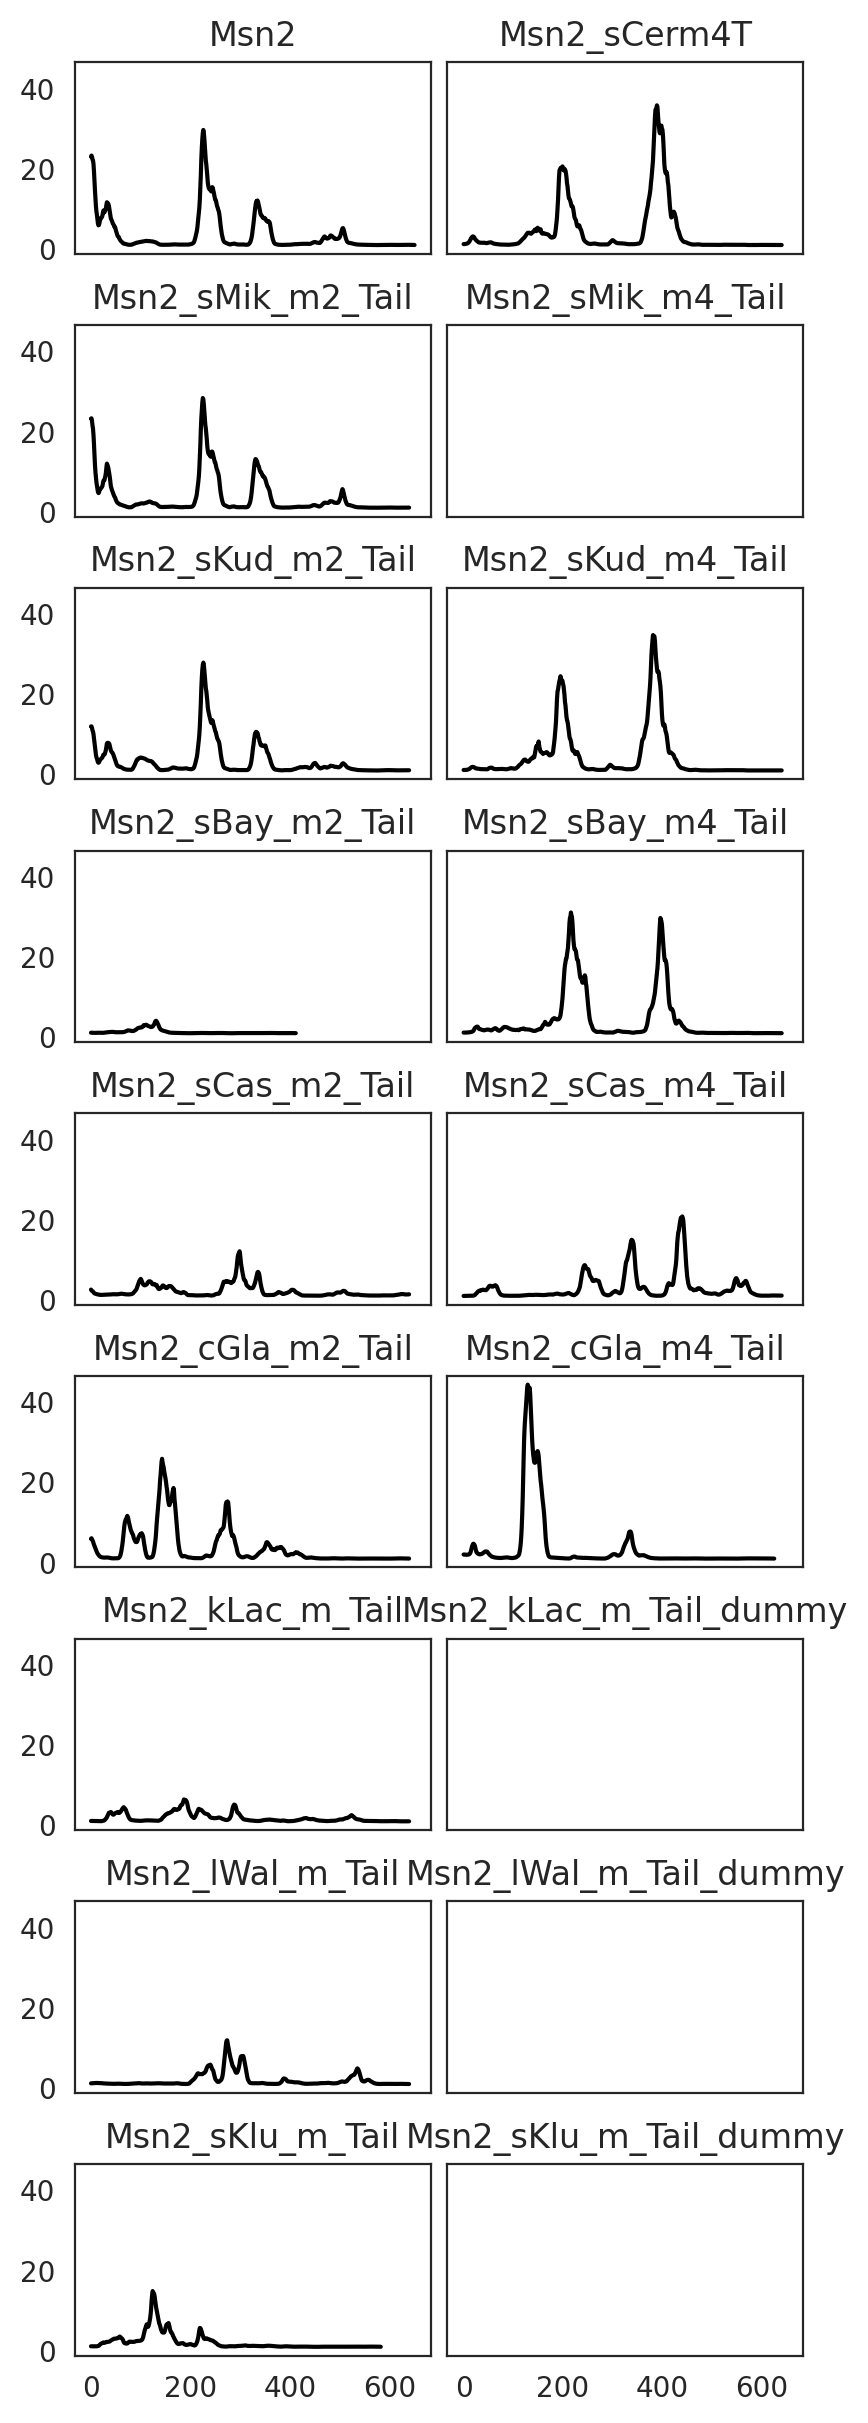

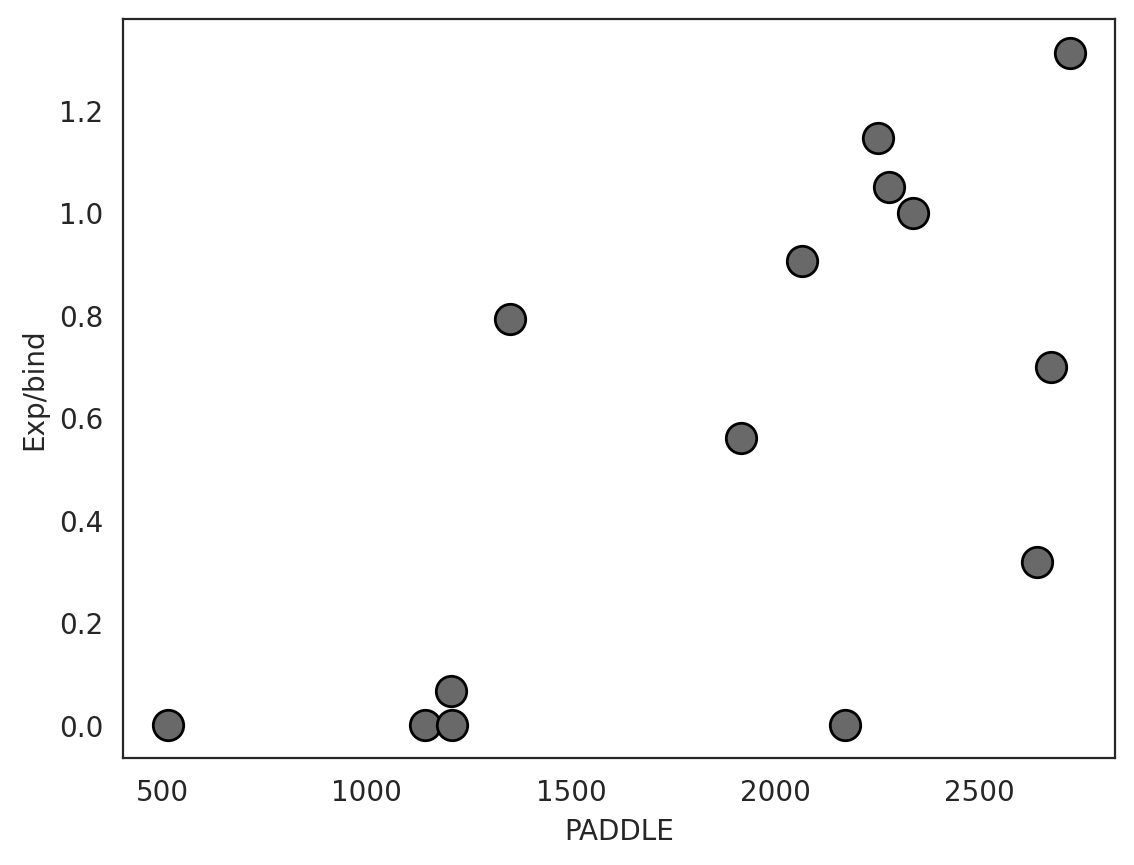

In [37]:
evo_order = ['Msn2', 'Msn2_sCerm4T', 'Msn2_sMik_m2_Tail', 'Msn2_sMik_m4_Tail', 'Msn2_sKud_m2_Tail',
                         'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
                         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail', 'Msn2_cGla_m2_Tail',
                         'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_kLac_m_Tail_dummy',
                         'Msn2_lWal_m_Tail','Msn2_lWal_m_Tail_dummy','Msn2_sKlu_m_Tail',
                         'Msn2_sKlu_m_Tail_dummy']

path = 'data/paddle_predictions/evolutions/'
lst = os.listdir(path)
def loadnpy(path, file):
    return np.load(os.path.join(path, file))[:641]

evo_paddle = pd.DataFrame({name.replace('.npy', ''):pd.Series(loadnpy(path, name)) for name in lst})
df = pd.concat([pd.DataFrame(d, columns=['Msn2']), evo_paddle], axis=1).loc[:, order]
df.loc[:,  'Msn2_sMik_m4_Tail'] = math.nan
df.loc[:,  'Msn2_kLac_m_Tail_dummy'] = math.nan
df.loc[:,  'Msn2_lWal_m_Tail_dummy'] = math.nan
df.loc[:,  'Msn2_sKlu_m_Tail_dummy'] = math.nan
df = df.loc[:, evo_order]
fig, ax = plt.subplots(int(df.shape[1]/2), 2,figsize=(4,12), constrained_layout=True, sharey=True, sharex=True)
ax = ax.flatten()
for i in range(df.shape[1]):
    ax[i].plot(df.iloc[:, i], c='k')
    ax[i].set_title("{}".format(df.columns[i]))
fig.savefig('figures/Supp/evo_paddle_profiles.pdf')
fig, ax = plt.subplots(1)
ax.scatter(pred_sum.values.flatten(), evo_exp.values.flatten(), s=120, c='dimgray', edgecolors='k')
ax.set_xlabel('PADDLE')
ax.set_ylabel('Exp/bind')
fig.savefig('figures/Supp/evo_paddle_vs_activity.pdf')


# Fig 5

In [38]:
def subgroup_def(name):
    if 'spread' in name:
        return 'spread'
    elif 'cluster' in name or name == 'Left_positive_right_negative':
        return 'cluster'
    elif 'shift' in name or 'swapped' in name:
        return 'shift/NS_swapped'
    elif 'Scramble' in name or 'random' in name:
        return 'random'
    else:
        return 'none'


preserving = ['DE_spread', 'ED_cluster2', 'ED_shift2', 'FWY_cluster2', 'FWY_cluster3',
       'FWY_random3', 'FWY_shift', 'LIV_cluster2', 'LIV_cluster3',
       'LIV_random1', 'LI_shift', 'Left_positive_right_negative', 'MSN2WT',
       'MSN2_start_nls', 'NQ_shift', 'NS_swapped', 'PG_shift', 'S_shift',
       'charged_random_cluster_2']

changing = ['A_nextto_N', 'DEKR_to_Q', 'DE_to_A', 'DE_to_N', 'DE_to_Q',
       'D_nextto_N', 'ED_deletion', 'ED_random1', 'ED_random2', 'ED_random3',
       'E_nextto_N', 'FWY_deletion', 'FWY_to_A', 'FWY_to_I', 'FWY_to_L',
       'G_to_A', 'KR_to_A', 'LIV_deletion', 'L_to_A', 'MSN2_start_nls', 'MSN2WT',
       'NQ_deletion', 'NQ_to_A', 'N_to_D', 'N_to_E', 'N_to_G', 'N_to_H',
       'N_to_Q', 'N_to_R', 'N_to_S', 'N_to_T', 'N_to_Y',
       'P_is_placed_next_to_N', 'P_to_A', 'Q_nextto_N', 'R_nextto_N',
       'ST_deletion', 'S_nextto_N', 'S_to_A', 'T_nextto_N', 'Y_nextto_N',
       'raax2', 'raax4', 'randomaa', 'LIVFWY_to_A', 'LIVFWY_to_I',
       'LIVFWY_to_Y', '90_D_charged', '90_E_charged', '90_chargedaa_to_A',
       '90_chargedaa_to_F', '90_chargedaa_to_N', '90_chargedaa_to_random_2',
       '90_chargedaa_to_random_3']

## B

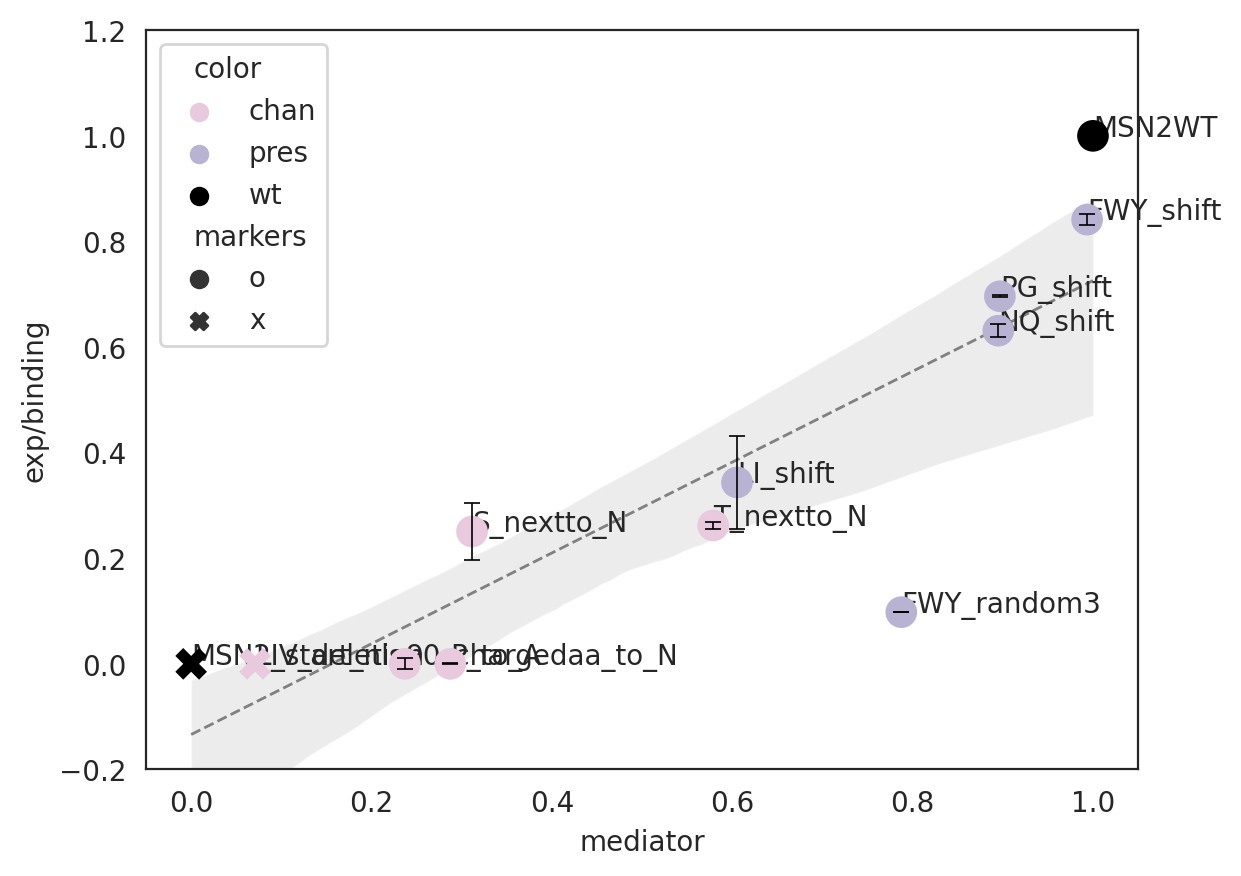

In [39]:
fig, ax = plt.subplots(1)
dat = all_data.loc[pd.Index(preserving+changing).drop_duplicates()].copy()
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_f<be_thresh).apply(lambda x: 'o' if x==False else 'x')

dat.loc[dat.query("markers=='x'").index, 'a_f'] = 0
dat.loc[dat.query("markers=='x'").index, 'zerf'] = math.nan

dat.loc[preserving, 'color'] = 'pres'
dat.loc[changing, 'color'] = 'chan'
dat.loc[['MSN2WT', 'MSN2_start_nls'], 'color'] = 'wt'

sns.regplot(dat, x='med_corr_f', y='a_f', ax=ax,scatter=False, n_boot=1000, color='gainsboro', line_kws=dict(linestyle='--', linewidth=1, color='gray'))
sns.scatterplot(data=dat, x='med_corr_f', y='a_f', linewidth=0, s=130,
                hue='color', palette=['#e8c9de', '#b8b2d3', 'k'], hue_order=['chan', 'pres', 'wt'], zorder=20, style='markers')
ax.set_xlabel('mediator')
ax.set_ylabel('exp/binding')
ax.errorbar(dat.med_corr_f, dat.a_f, dat.zerf.squeeze().values,zorder=20,
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.set_ylim([-.2, 1.2])

for i in dat.index:
    ax.annotate(i, (dat.med_corr_f[i], dat.a_f[i]))
fig.savefig('figures/Main/fig5/Fig5B.pdf')


In [40]:
dat = pd.concat([all_table.loc[preserving].loc[:, ['Group', 'Paddle_pred_sum']].copy(), all_data.loc[preserving]], axis=1)
dat.loc[:, 'subgroups'] = list(map(subgroup_def, dat.index))


In [41]:
annot = dat.filter(regex='cluster', axis=0).filter(regex='ED|FWY|LIV', axis=0).index

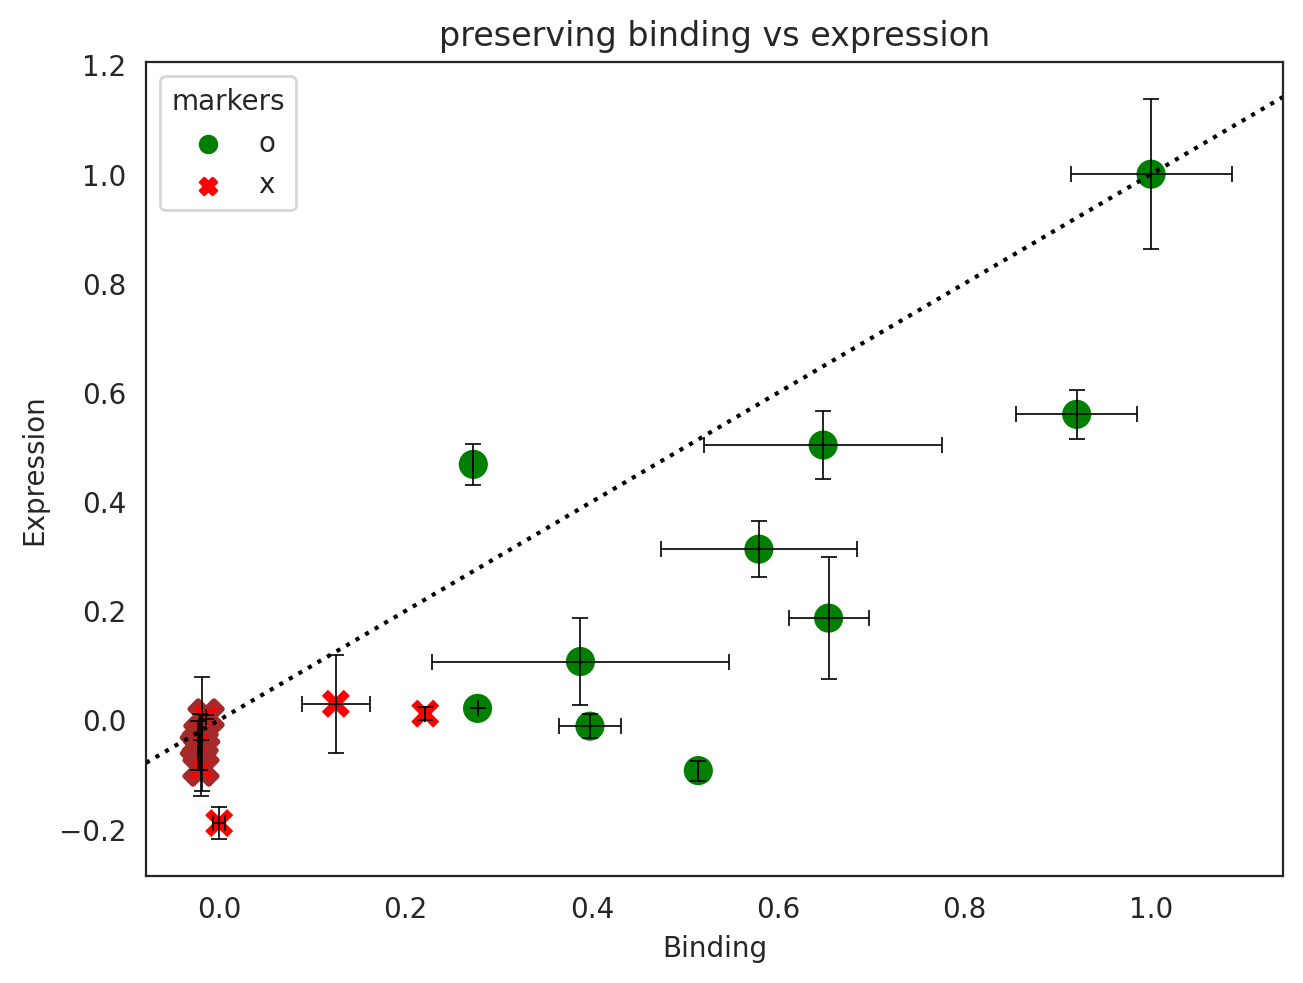

In [42]:
dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_f<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_f'] = 0
dat.loc[dat.query("markers=='x'").index, 'zerf'] = math.nan

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_f', y='e', s=130, style='markers', hue='markers', palette=['g', 'r'])
ax.errorbar(data=dat, x='b_f', y='e', yerr='eci', xerr='bci_f', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.scatter(dat.b_f.loc[annot], dat.e.loc[annot], edgecolors='brown', marker='X', facecolors='None', linewidths=2, s=130)

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('preserving binding vs expression')
fig.savefig('figures/Supp/S_preserv.pdf')


/tmp/ipykernel_248804/1026076678.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)


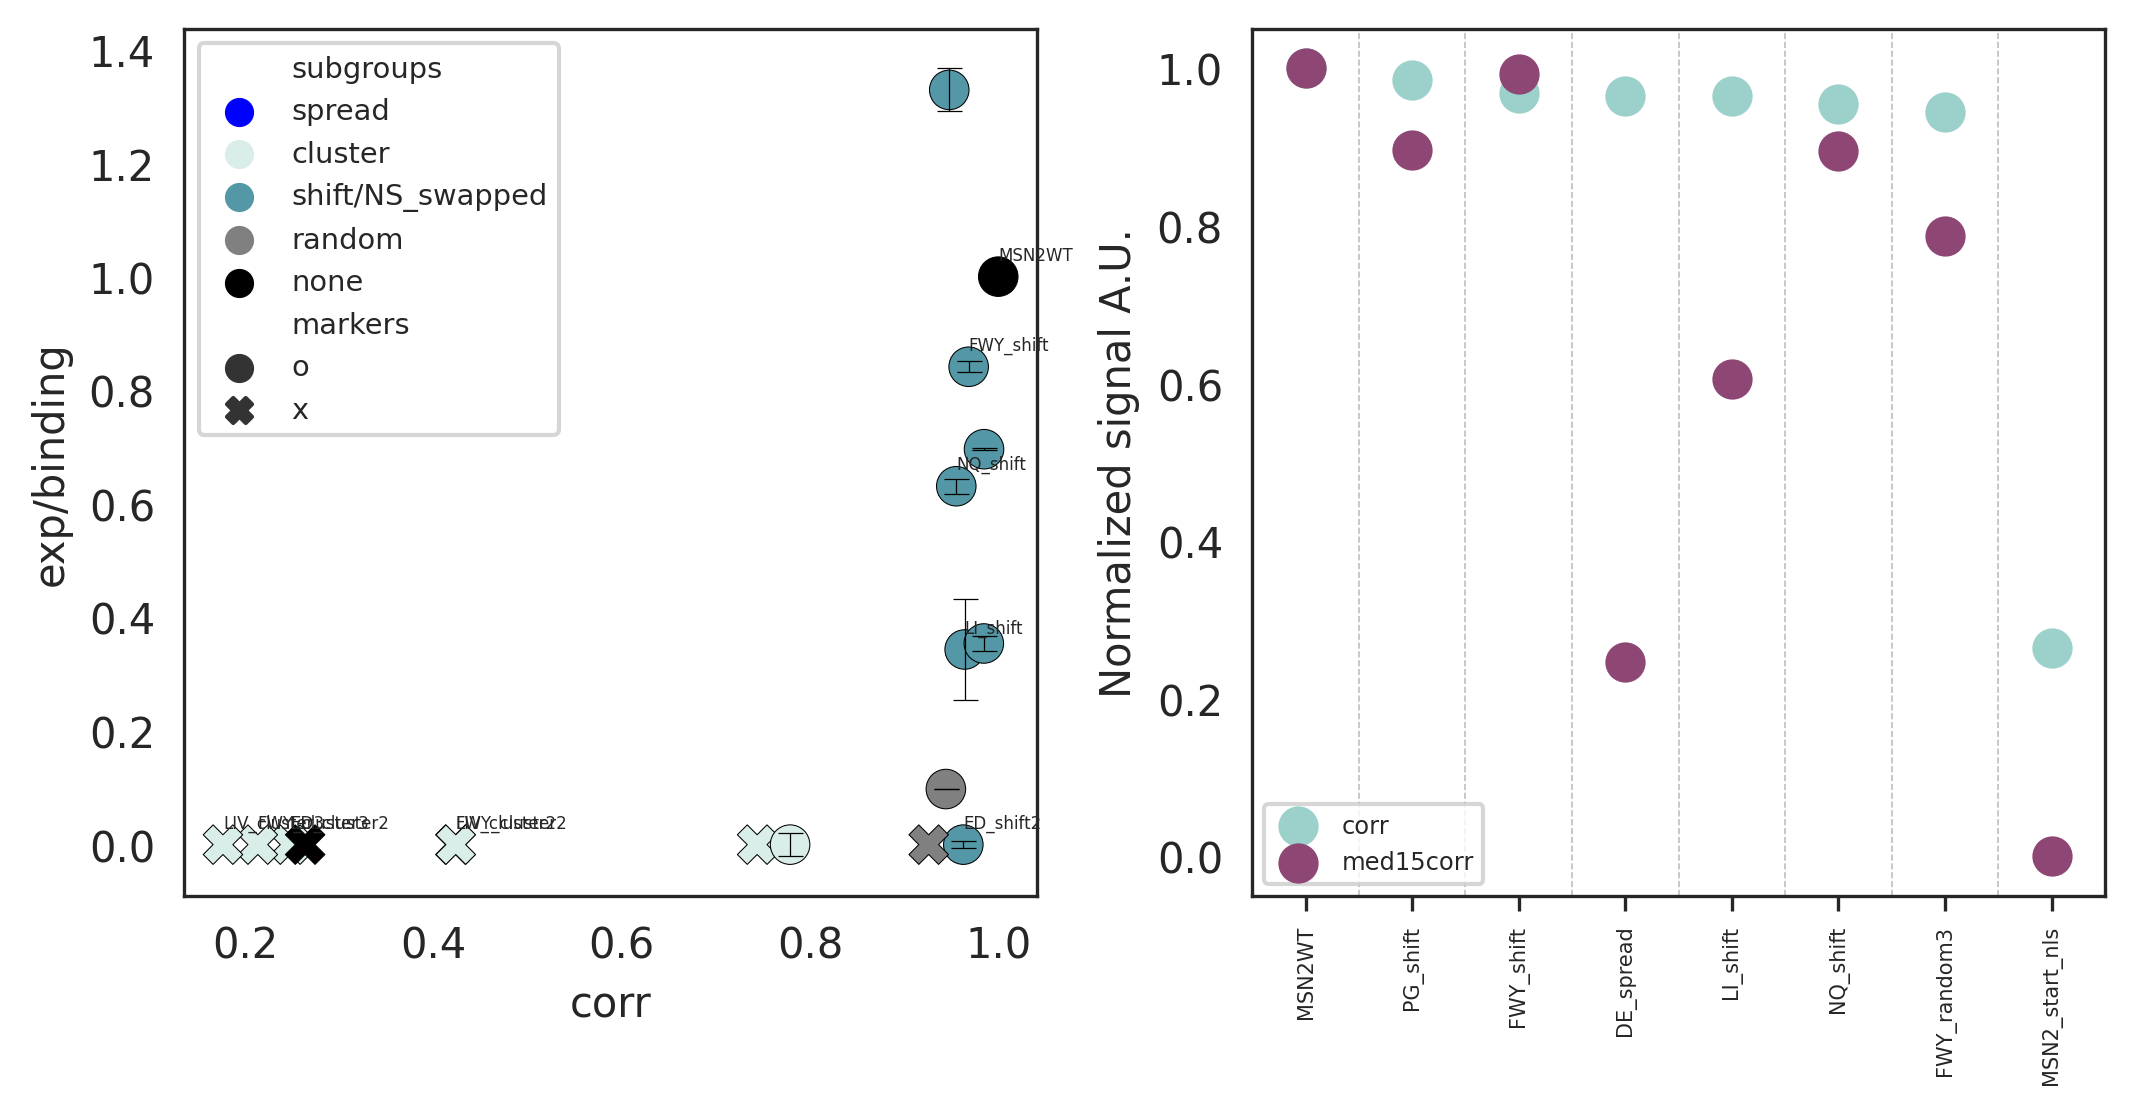

In [43]:
fig, axes = plt.subplots(1,2, figsize=(7,3.6), dpi=150, constrained_layout=True, width_ratios=[1,1], sharey=False)
ann_s = 4
dot_s = 90

    
ax = axes[0]

s = sns.scatterplot(data=dat, x='corr_f', y='a_f', hue='subgroups',
                s=dot_s, ax=ax, palette=['blue', '#d9eee9', '#5497a6', '#808080', 'k'],
                    zorder=20, linewidth=0.25, style='markers', edgecolor='k')

errordat = dat.loc[:, ['corr_f', 'a_f', 'zerf']].dropna()
ax.errorbar(errordat.corr_f, errordat.a_f, errordat.loc[:, 'zerf'].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, zorder=20)

annot = ['MSN2WT', 'NQ_shift', 'ED_shift2', 'LI_shift', 'FWY_shift', 'ED_cluster2', 'LIV_cluster2', 'LIV_cluster3', 'FWY_cluster2', 'FWY_cluster3']
for i in annot:
    ax.annotate(i, (dat.corr_f.loc[i], dat.a_f.loc[i]+.03), size=ann_s, zorder=20)

ax.legend(fontsize="x-small")
# ax.set_ylim([-0.1,1.2])

ax.set_xlabel('corr')
ax.set_ylabel('exp/binding')


ax = axes[1]
med_dat = dat.loc[:, ['med_corr_f', 'corr_f']].dropna().sort_values(by='corr_f', ascending=False)

ax.scatter(med_dat.index, med_dat.corr_f, label='corr', zorder=20, s=dot_s-15, c='#9bd1ca')
ax.scatter(med_dat.index, med_dat.med_corr_f, label='med15corr', zorder=20, s=dot_s-15, c='#8e4775')
ax.legend(loc='lower left', fontsize='xx-small')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)
ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
for i in np.arange(0.5, 8, 1):
    ax.axvline(i, c='gray', linewidth=.4, alpha=0.5, linestyle='--')
ax.set_xlim([-0.5, 7.5])
ax.set_ylabel('Normalized signal A.U.')

fig.savefig('figures/Main/fig5/Fig5C_D.pdf')


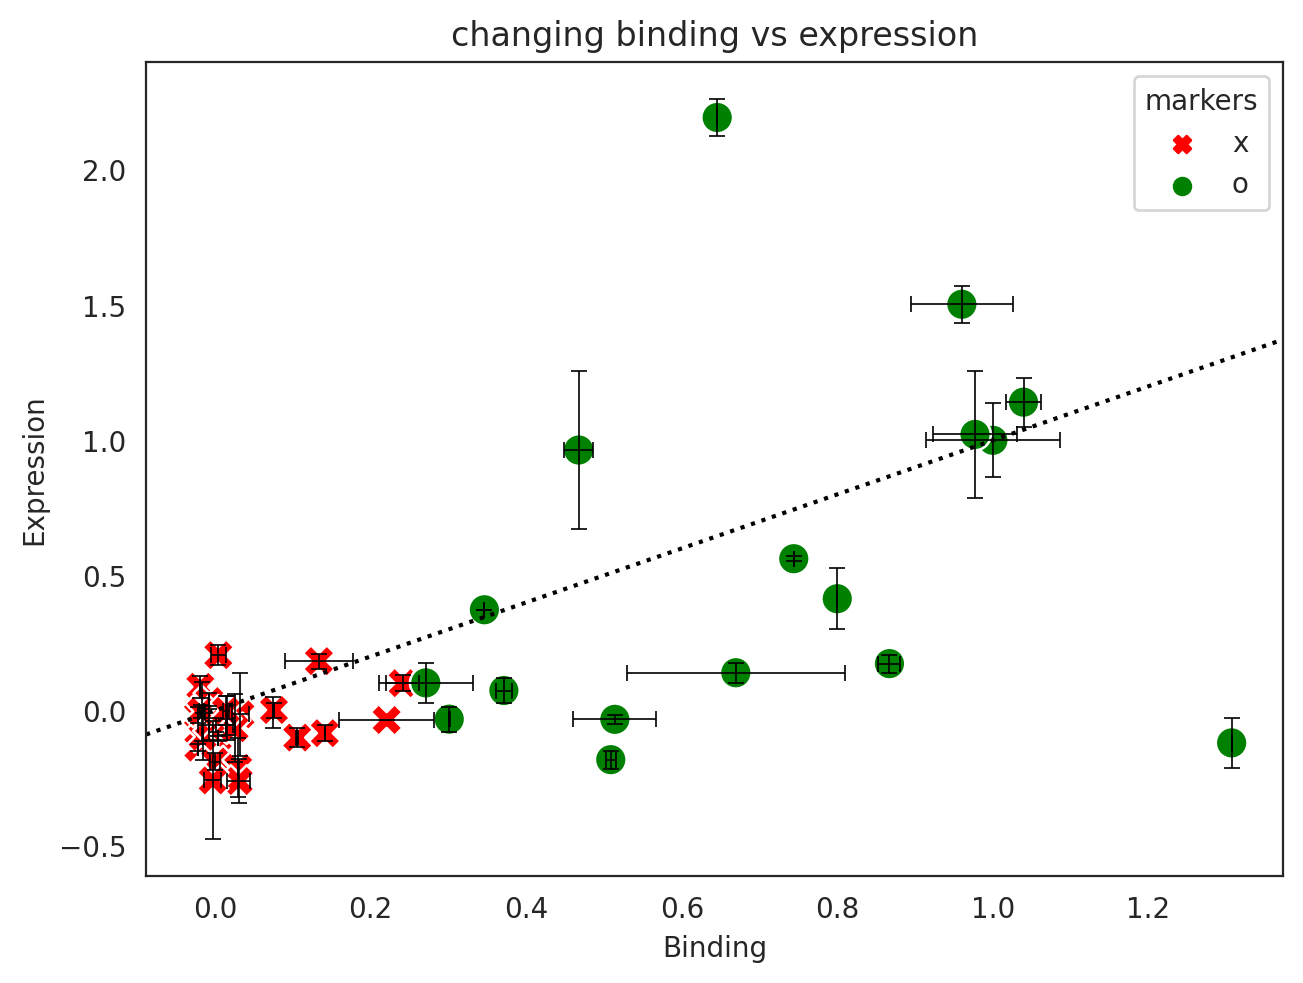

In [44]:
dat = pd.concat([all_table.loc[changing].loc[:, ['Group', 'Paddle_pred_sum']].copy(), all_data.loc[changing]], axis=1)
annot = ['MSN2WT', '90_chargedaa_to_A', '90_chargedaa_to_N', '90_chargedaa_to_F', 'FWY_to_A', 'N_to_Q', 'S_to_A', 'KR_to_A', 'MSN2_start_nls']

to_annot = lambda x:'to annot' if x in annot else 'not annot'

dat.loc[:, 'subgroups'] = list(map(to_annot, dat.index))

dat.loc[:, 'markers'] = np.logical_and(dat.e<be_thresh, dat.b_f<be_thresh).apply(lambda x: 'o' if x==False else 'x')
dat.loc[dat.query("markers=='x'").index, 'a_f'] = 0
dat.loc[dat.query("markers=='x'").index, 'zerf'] = math.nan

fig, ax = plt.subplots(1, constrained_layout=True)
sns.scatterplot(data=dat, x='b_f', y='e', s=130, style='markers', hue='markers', palette=['r', 'g'], style_order=['o', 'x'])
ax.errorbar(data=dat, x='b_f', y='e', yerr='eci', xerr='bci_f', 
            fmt='None', capsize=3, c='k', capthick=.6, elinewidth=.6)
ax.axline((0,0), slope=1, c='k', linestyle=':')

ax.set_xlabel('Binding')
ax.set_ylabel('Expression')
ax.set_title('changing binding vs expression')
fig.savefig('figures/Supp/S_changing.pdf')


/tmp/ipykernel_248804/2953749035.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)


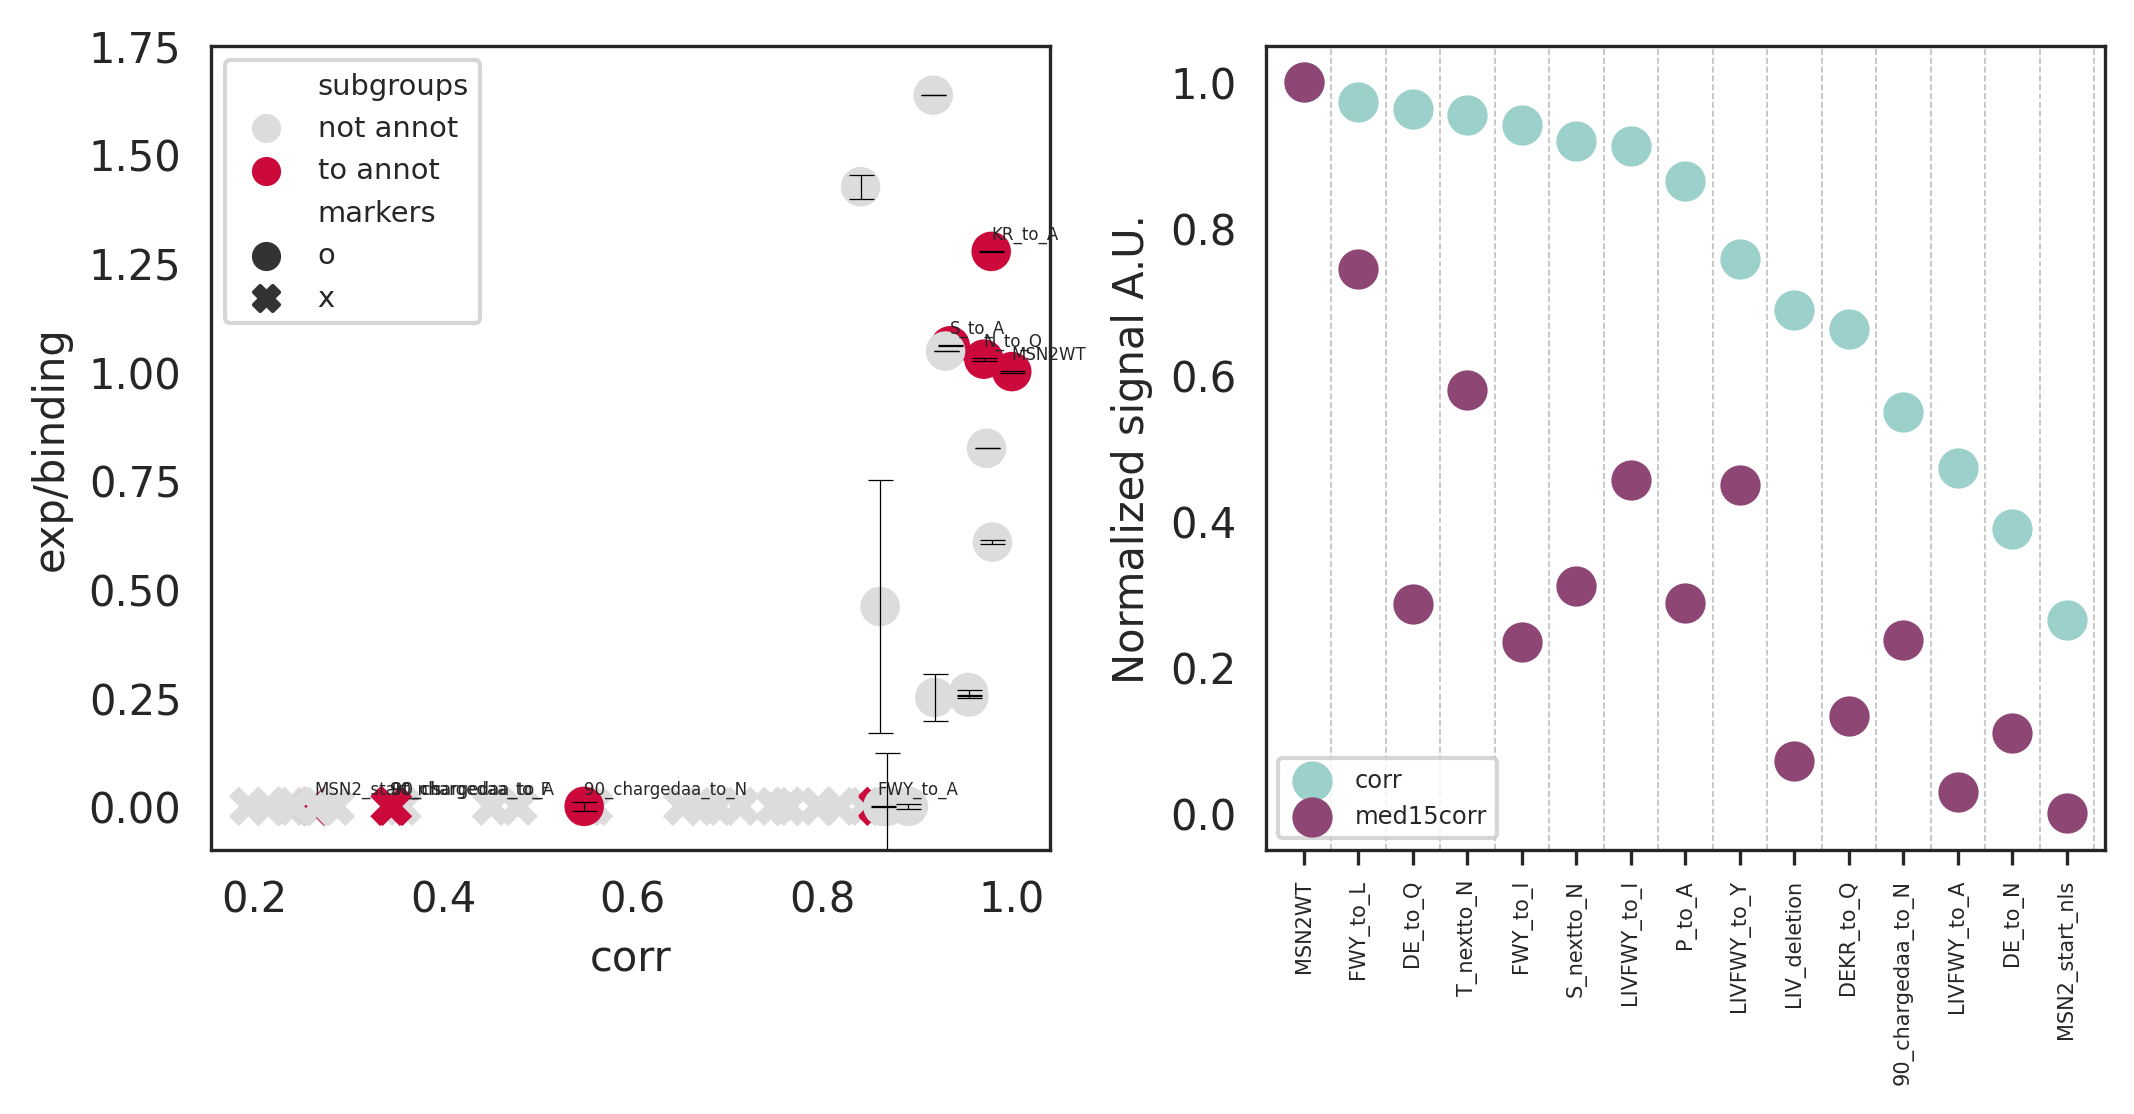

In [45]:
fig, axes = plt.subplots(1,2, figsize=(7,3.6), dpi=150, constrained_layout=True, width_ratios=[1,1], sharey=False)
ann_s = 4
dot_s = 90

    
ax = axes[0]

s = sns.scatterplot(data=dat, x='corr_f', y='a_f', hue='subgroups',
                s=dot_s, ax=ax, palette=["gainsboro", "#cb0a3b"], zorder=20, linewidth=0, style='markers', style_order=['o', 'x'])
errordat = dat.loc[:, ['corr_f', 'a_f', 'zerf']].dropna()
ax.errorbar(errordat.corr_f, errordat.a_f, errordat.loc[:, 'zerf'].squeeze().values,
            fmt='None', capsize=3, c='k', linewidth=.3, capthick=.3, zorder=20)

for i in annot:
    ax.annotate(i, (dat.corr_f.loc[i], dat.a_f.loc[i]+.03), size=ann_s, zorder=20)

ax.set_ylim([-0.1,1.75])
ax.legend(fontsize="x-small")
ax.set_xlabel('corr')
ax.set_ylabel('exp/binding')


ax = axes[1]
med_dat = dat.loc[:, ['med_corr_f', 'corr_f']].dropna().sort_values(by='corr_f', ascending=False)

ax.scatter(med_dat.index, med_dat.corr_f, label='corr', zorder=20, s=dot_s-15, c='#9bd1ca')
ax.scatter(med_dat.index, med_dat.med_corr_f, label='med15corr', zorder=20, s=dot_s-15, c='#8e4775')
ax.legend(loc='lower left', fontsize='xx-small')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=5)

ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
for i in np.arange(0.5, 15, 1):
    ax.axvline(i, c='gray', linewidth=.4, alpha=0.5, linestyle='--')
ax.set_ylabel('Normalized signal A.U.')

fig.savefig('figures/Main/fig5/Fig5E_F.pdf')


# Supp table strains

In [46]:
evo = ['Msn2','Msn2_sCerm4T',  'Msn2_sMik_m2_Tail', 'Msn2_sKud_m2_Tail', 'Msn2_sKud_m4_Tail', 'Msn2_sBay_m2_Tail', 'Msn2_sBay_m4_Tail',
         'Msn2_sCas_m2_Tail', 'Msn2_sCas_m4_Tail','Msn2_cGla_m2_Tail', 'Msn2_cGla_m4_Tail', 'Msn2_kLac_m_Tail','Msn2_lWal_m_Tail', 'Msn2_sKlu_m_Tail']
chrgrto = ['MSN2WT', '10p_90n_chargeratio', '20p_80n_chargeratio', '30p_70n_chargeratio',
 '40p_60n_chargeratio', '50p_50n_chargeratio', '60p_40n_chargeratio', '70p_30n_chargeratio',
 '80p_20n_chargeratio', '90p_10n_chargeratio']
strain_table = {'Truncations':len(trunc)-1,
                'Truncations (dMsn4)':len(trunc_dmsn4)-1,
               'Overlapping deletions':len(overlap)-1,
                'Overlapping deletions (dMsn4)':len(overlap_dmsn4)-2,
               'Composition preserving':len(preserving)-2,
               'Composition changing':len(changing)-2,
               'LIVFWY deletions':len(del_from + del_to)-4,
                'Orthologous IDRs': len(evo)-1,
               'Charge ratio changes': len(chrgrto)-1,
               'Replicated segments':len(nwn),
               'Scrambles':3,
               'Controls':5}
supp_df_strains = pd.DataFrame(strain_table, index=['number of strains']).transpose()

supp_df_strains.to_csv('strain_summary.csv')

# Proms raw med15/msn2

In [47]:
norm = pd.read_parquet('data/norm_msn2.parquet.gzip')
norm_med = pd.read_parquet('data/norm_med.parquet.gzip')
df_for_sp = pd.read_csv('data/frame_for_spcalc.csv', index_col=4)
proms_msn = sp_og.loc[t_for_med, ['MSN2WT', 'Msn2']].mean(axis=1).sort_values(ascending=False)[:6].index


In [48]:
def return_prom_sig_df(df, prom_coords, mean = False, in_prom=1000, in_orf=300):
    coords = prom_coords.loc[['chr_loc', 'start', 'stop']].apply(np.int).to_dict()
    chrmsm = coords['chr_loc']
    start = coords['start']
    stop = coords['stop']
    ndf = df.loc[chrmsm]
    
    if stop-start>0:
        get_sig = lambda x: x[start-in_prom:start+in_orf]
    else:
        get_sig = lambda x: x[start-in_orf:start+in_prom][::-1]
    if not mean:    
        return pd.DataFrame(ndf.apply(get_sig).to_dict())
    else:
        new = pd.DataFrame(ndf.apply(get_sig).to_dict())
        new.columns = ['_'.join(name.split('_')[:-1]) for name in new.columns]
        return new.transpose().reset_index().groupby('index').mean().transpose().rename_axis(None, axis=1)

/tmp/ipykernel_248804/3871976546.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coords = prom_coords.loc[['chr_loc', 'start', 'stop']].apply(np.int).to_dict()
/tmp/ipykernel_248804/3871976546.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for add

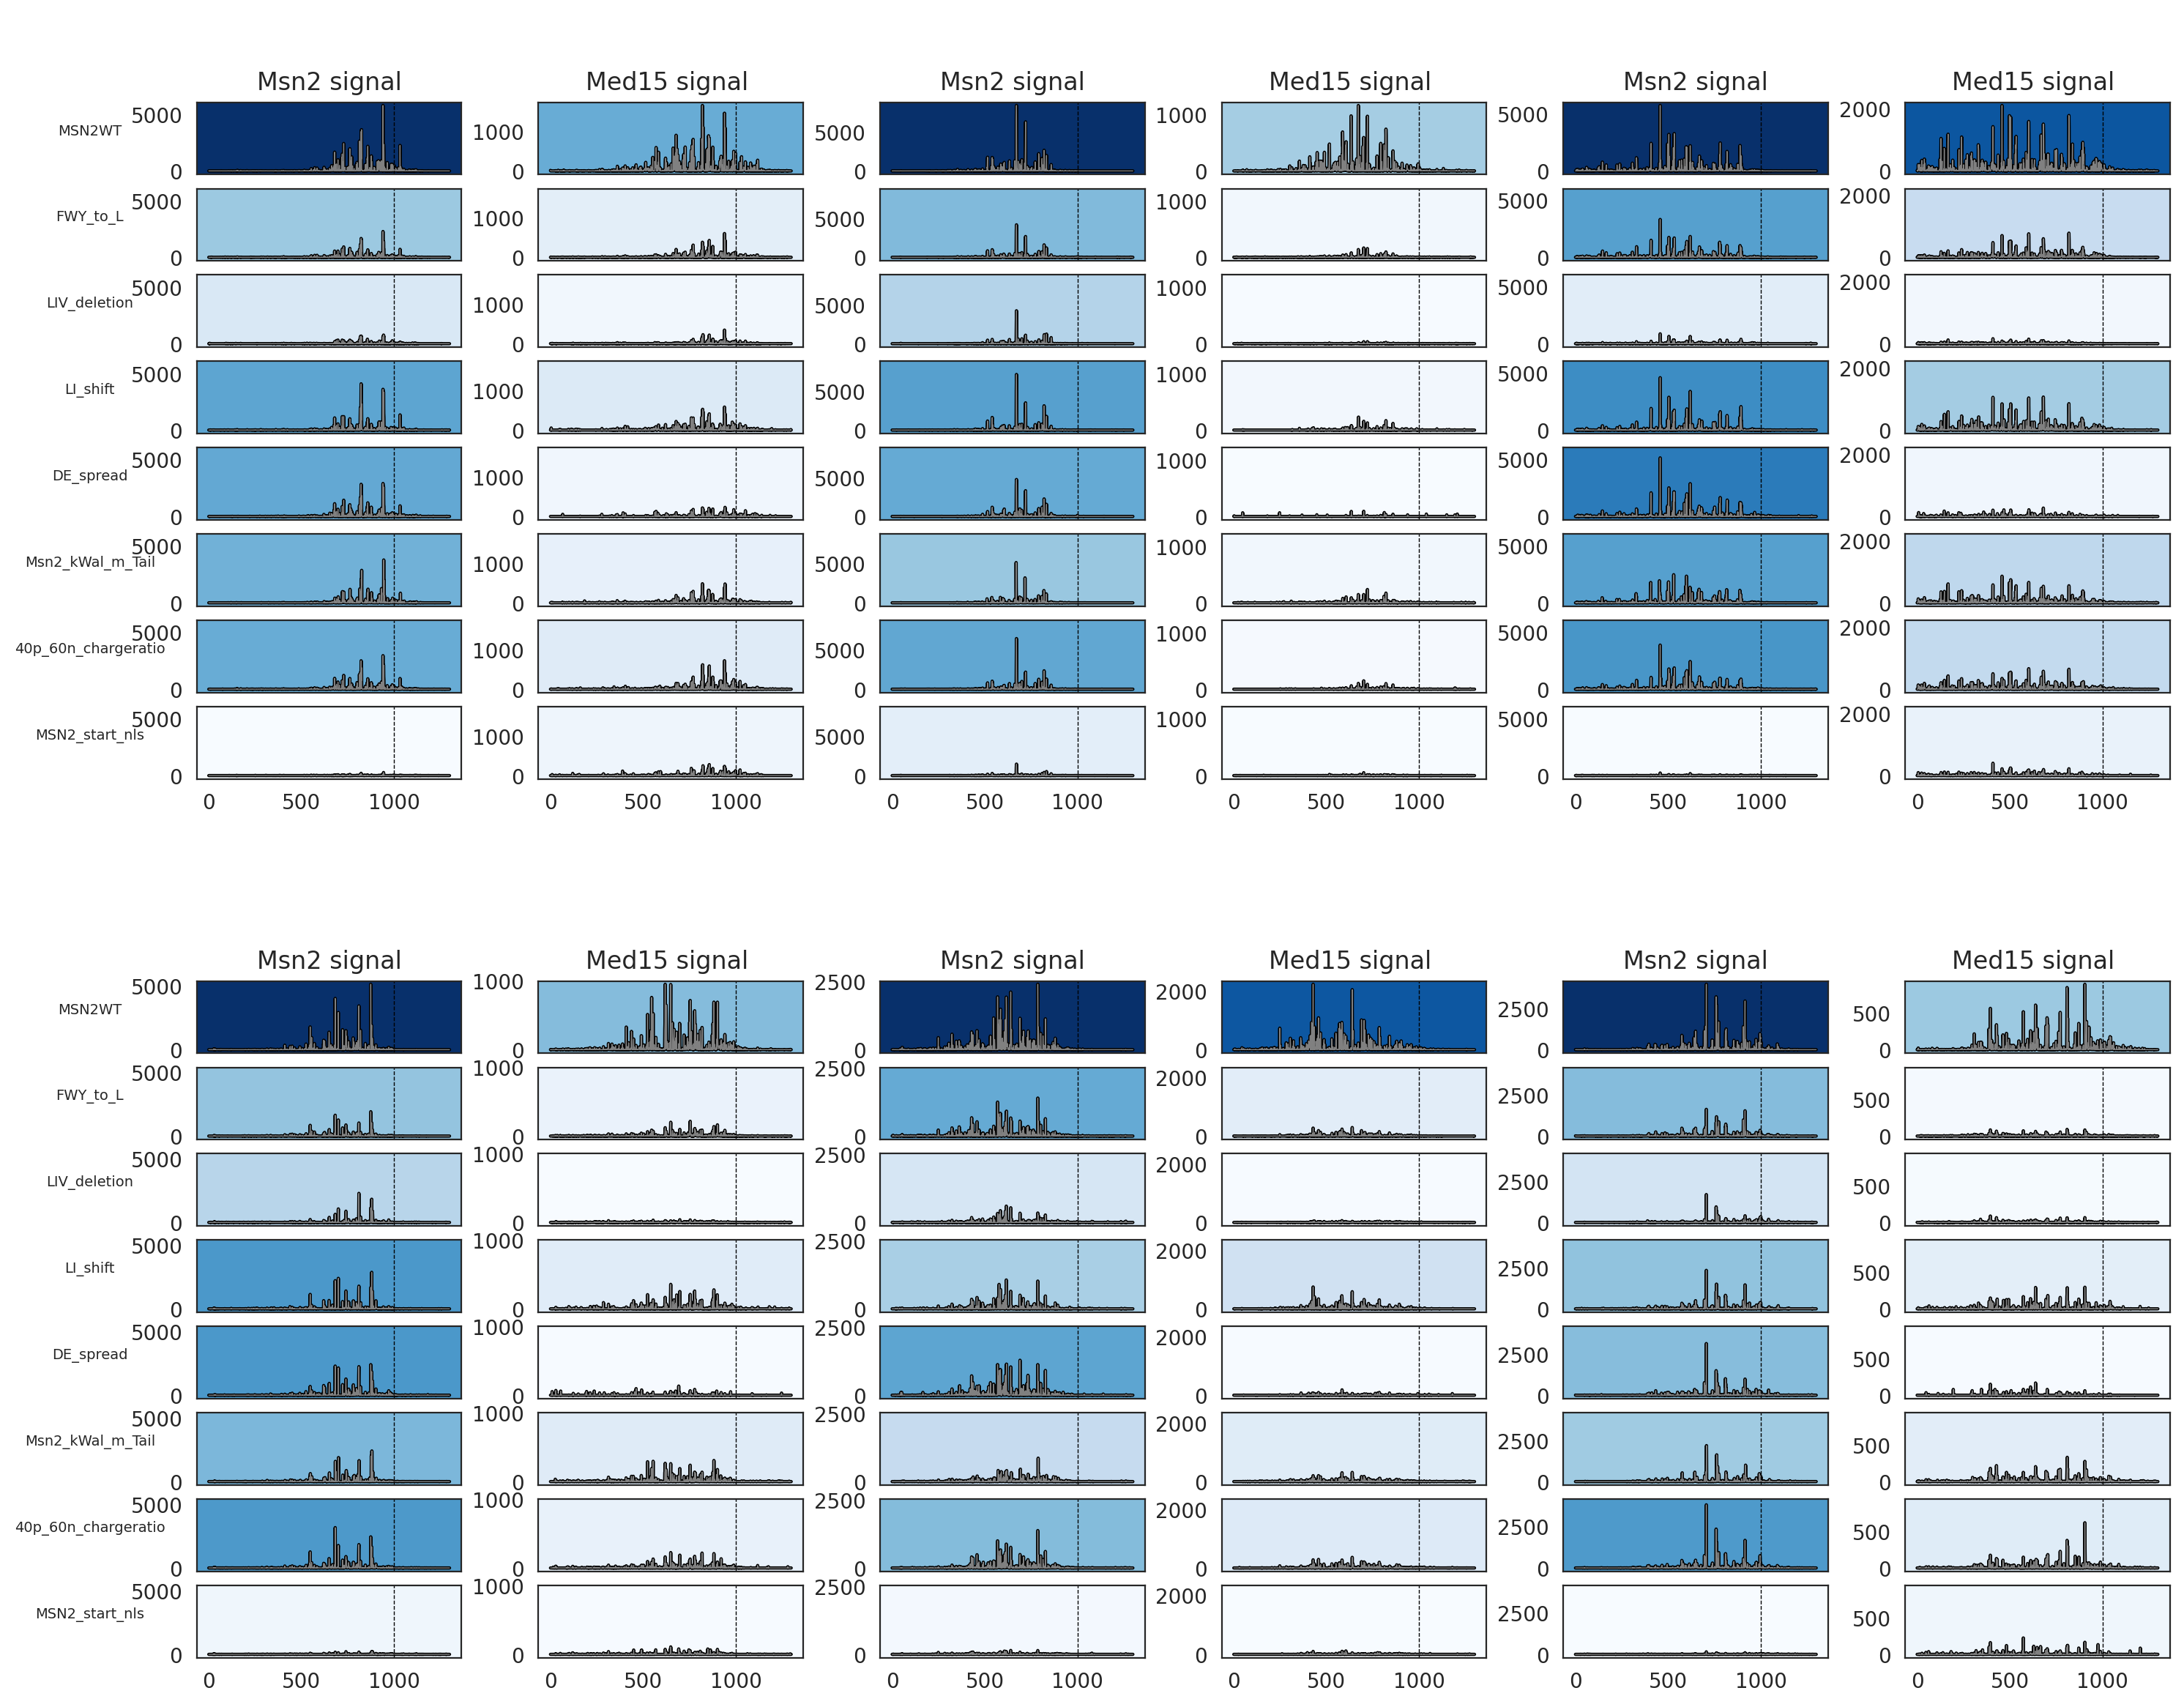

In [49]:
cmap = plt.cm.Blues 
strains = changing 

prom_order = proms_msn
order = ['MSN2WT', 'FWY_to_L', 'LIV_deletion', 'LI_shift', 'DE_spread', 'Msn2_kWal_m_Tail', '40p_60n_chargeratio', 'MSN2_start_nls']

fig = plt.figure(constrained_layout=False, figsize=(14,12))

subfigs = fig.subfigures(2,3)
subfigs = subfigs.flatten()

for subfig, prom in zip(subfigs, prom_order):

    msnsig = return_prom_sig_df(norm, df_for_sp.loc[prom], mean=True).loc[:, order]
    medsig = return_prom_sig_df(norm_med, df_for_sp.loc[prom], mean=True)
    medsig.columns = medsig.rename({'Msn2':'MSN2WT'}, axis=1).columns
    medsig = medsig.loc[:, order]
    
    normalize = mcolors.Normalize(vmin=min(msnsig.sum().min(),medsig.sum().min()) , vmax=max(msnsig.sum().max(),medsig.sum().max()))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
    sm.set_array([]) 

    subsubf = subfig.subfigures(1,2)
    msnax = subsubf[0].subplots(len(order), 1, sharex=True, sharey=True)
    medax = subsubf[1].subplots(len(order), 1, sharex=True, sharey=True)
    
    msnax[0].set_title('Msn2 signal')
    medax[0].set_title('Med15 signal ')
    for ax1, ax2, strain in zip(msnax, medax, order):
        max_val = msnsig.loc[:, strain].sum()
        color = cmap(normalize(max_val))
        ax1.plot(msnsig.loc[:, strain], c='gray', path_effects=[pe.Stroke(linewidth=1.6, foreground='k'), pe.Normal()], lw=.5)
        ax1.set_facecolor(color)
        max_val = medsig.loc[:, strain].sum()
        color = cmap(normalize(max_val))
        ax2.plot(medsig.loc[:, strain], c='gray', path_effects=[pe.Stroke(linewidth=1.6, foreground='k'), pe.Normal()], lw=.5)
        ax2.set_facecolor(color)
        if prom == prom_order[0] or prom == prom_order[3]:
            ax1.set_ylabel(strain, size=7, rotation=0, labelpad=20)
        ax1.axvline(1000, c='k', linestyle='--', lw=.5)
        ax2.axvline(1000, c='k', linestyle='--', lw=.5)
    subfig.suptitle(prom)

fig.savefig('figures/Supp/norm_profiles_msn2_med15.pdf')

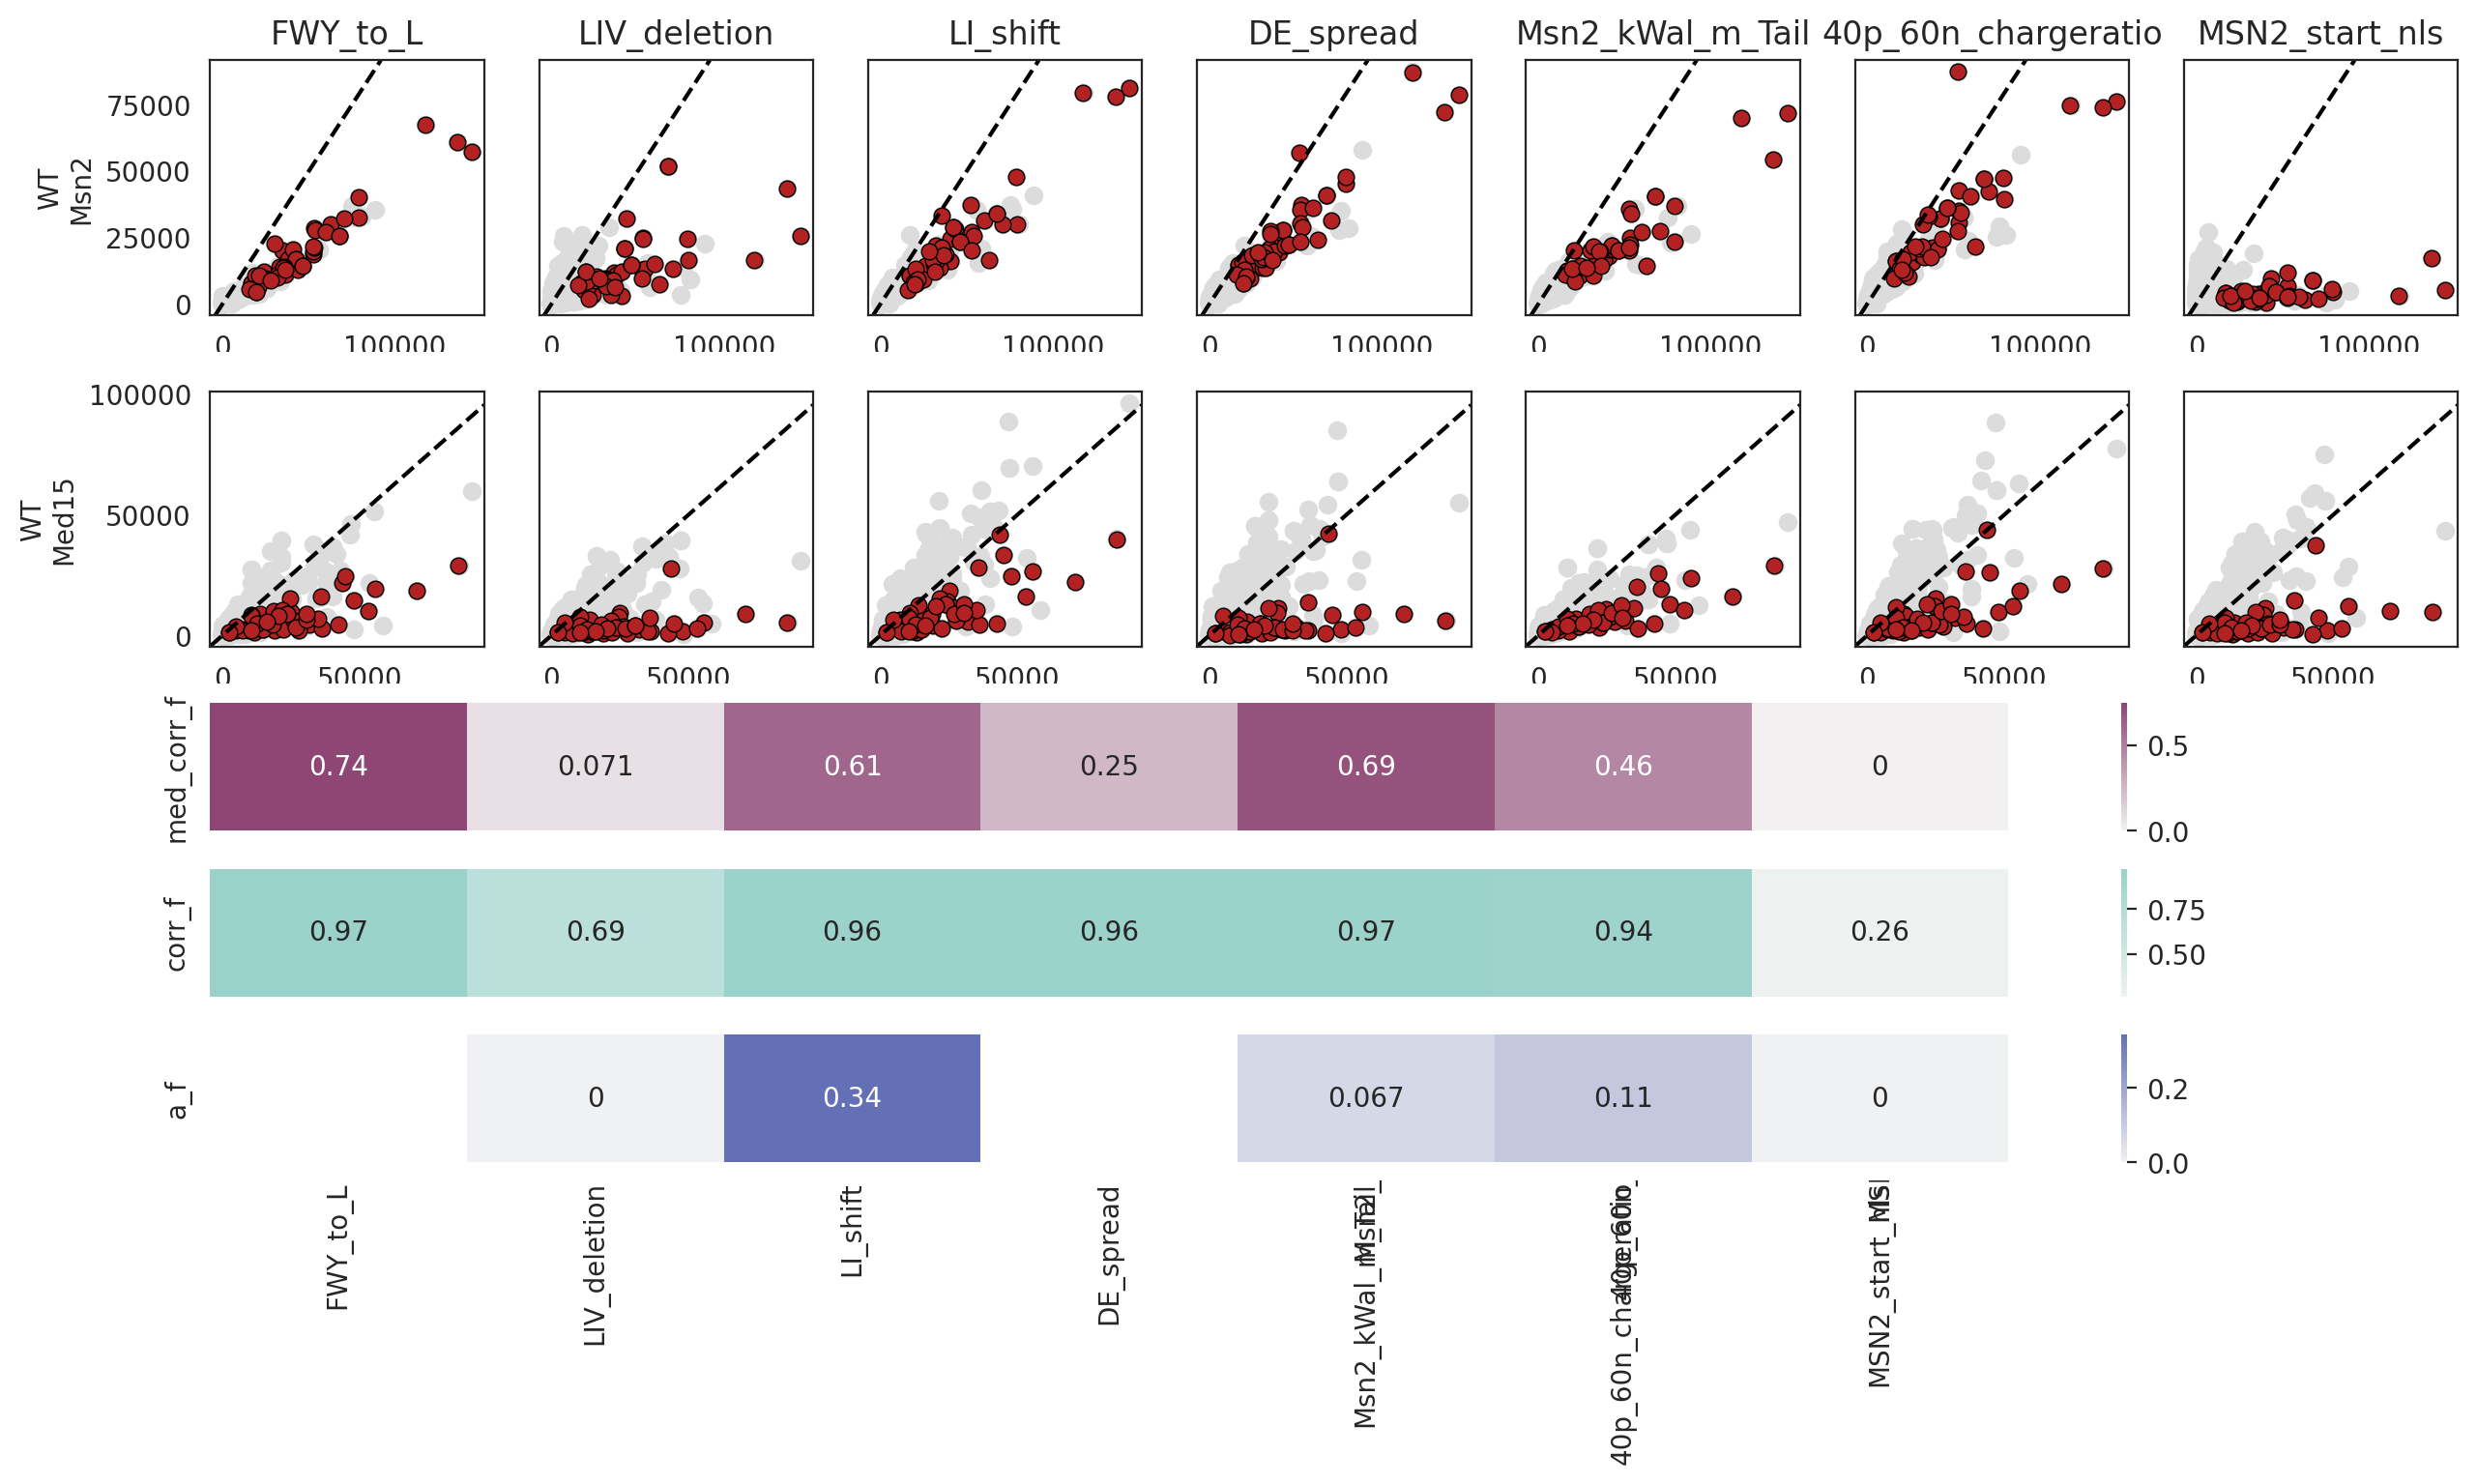

In [50]:
sp = sp.rename({'Msn2_lWal_m_Tail':'Msn2_kWal_m_Tail'}, axis=1)
med = med.rename({'Msn2_lWal_m_Tail':'Msn2_kWal_m_Tail'}, axis=1)
sp_og = sp_og.rename({'Msn2_lWal_m_Tail':'Msn2_kWal_m_Tail'}, axis=1)


cd = all_data.loc[[
 'FWY_to_L',
 'LIV_deletion',
 'LI_shift',
 'DE_spread',
 '40p_60n_chargeratio',
 'MSN2_start_nls'], 'med_corr_f']
cd.loc['Msn2_kWal_m_Tail'] = all_data.loc['Msn2_lWal_m_Tail', 'med_corr_s']
cd = cd.loc[order[1:]]


cd2= all_data.loc[[
 'FWY_to_L',
 'LIV_deletion',
 'LI_shift',
 'DE_spread',
 '40p_60n_chargeratio',
 'MSN2_start_nls'], 'corr_f']
cd2.loc['Msn2_kWal_m_Tail'] = all_data.loc['Msn2_lWal_m_Tail', 'corr_s']
cd2 = cd2.loc[order[1:]]

cd3= all_data.loc[[
 'FWY_to_L',
 'LIV_deletion',
 'LI_shift',
 'DE_spread',
 '40p_60n_chargeratio',
 'MSN2_start_nls'], 'a_f']
cd3.loc['Msn2_kWal_m_Tail'] = all_data.loc['Msn2_lWal_m_Tail', 'a_s']
cd3 = cd3.loc[order[1:]]

fig = plt.figure(figsize=(15, 6), constrained_layout=False)
subf = fig.subfigures(5, 1, height_ratios=[3,3,1.5,1.5,1.5])
ax1, ax2 = subf[0].subplots(1,len(order)-1, sharex=True, sharey=True), subf[1].subplots(1,len(order)-1, sharex=True, sharey=True)

def draw(strain, sp, med, targets, axi1, axi2):
    axi1.scatter(sp.loc[:, "MSN2WT"], sp.loc[:, strain], c='gainsboro', rasterized=True)
    axi2.scatter(med.loc[:, 'Msn2'], med.loc[:, strain], c='gainsboro', rasterized=True)

    axi1.scatter(sp.loc[targets, "MSN2WT"], sp.loc[targets, strain], c='firebrick', edgecolors='k', linewidths=.5)
    axi2.scatter(med.loc[targets, 'Msn2'], med.loc[targets, strain], c='firebrick', edgecolors='k', linewidths=.5)
    
    axi1.set_title(strain)
    axi1.axline((0,0), slope=1, c='k', linestyle='--')
    axi2.axline((0,0), slope=1, c='k', linestyle='--')

for i,axi1, axi2, in zip(order[1:], ax1, ax2):
    draw(i, sp_og, med, t_for_med, axi1, axi2)
ax1[0].set_ylabel('WT\nMsn2')
ax2[0].set_ylabel('WT\nMed15')

medax = subf[2].subplots(1)
sns.heatmap(pd.DataFrame(cd).transpose(), ax=medax, cbar_kws={'location':'right'}, cmap=mcmap, annot=True)
medax.set_xticklabels('')
corrax = subf[3].subplots(1)
corrax.set_xticklabels('')

sns.heatmap(pd.DataFrame(cd2).transpose(), ax=corrax, cbar_kws={'location':'right'}, cmap=bcmap, annot=True)
bax = subf[4].subplots(1)
sns.heatmap(pd.DataFrame(cd3).transpose(), ax=bax, cbar_kws={'location':'right'}, cmap=ecmap, annot=True)

fig.savefig('figures/Supp/sumprom_profiles_msn2_med15.pdf')

# PADDLE Scrambles

/tmp/ipykernel_248804/989995512.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pieces = np.array([s1, s2, s3, s4, s5, s6])


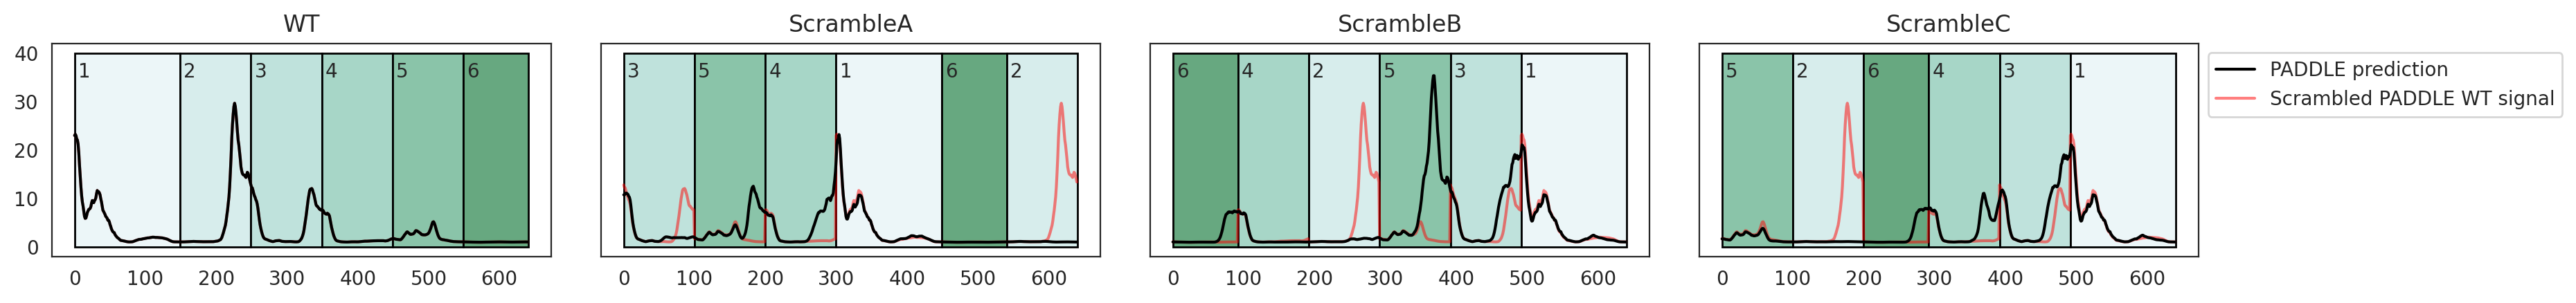

In [51]:
a = np.load('data/paddle_predictions/scrambles/Msn2_Scramble1.npy')
b = np.load('data/paddle_predictions/scrambles/Msn2_Scramble2.npy')
c = np.load('data/paddle_predictions/scrambles/Msn2_Scramble3.npy')
d = np.load('data/paddle_predictions/scrambles/MSN2WT.npy')
df = pd.DataFrame({'WT' : d[:641],
                  'ScrambleA' : a[:641],
                  'ScrambleB' : b[:641],
                  'ScrambleC' : c[:641]})

scr_len = np.array([149,100,100,100,100,92])

scr_colors = sns.cubehelix_palette(n_colors=6, start=2, rot=.2, gamma=.3)
scr_colors = np.array(scr_colors.as_hex())

scr1 = scr_len[np.array([2,4,3,0,5,1,])]
scr2 = scr_len[np.array([5,3,1,4,2,0,])]
scr3 = scr_len[np.array([4,1,5,3,2,0,])]


scr1_c = scr_colors[np.array([2,4,3,0,5,1,])]
scr2_c = scr_colors[np.array([5,3,1,4,2,0,])]
scr3_c = scr_colors[np.array([4,1,5,3,2,0,])]
scr_c = np.array([scr_colors, scr1_c, scr2_c, scr3_c]).T

s1 = df.WT[:149].values
s2 = df.WT[149:249].values
s3 = df.WT[249:349].values
s4 = df.WT[349:449].values
s5 = df.WT[449:549].values
s6 = df.WT[549:641].values
pieces = np.array([s1, s2, s3, s4, s5, s6])

piece0 = np.concatenate(pieces)
piece1 = np.concatenate(pieces[np.array([2,4,3,0,5,1,])])
piece2 = np.concatenate(pieces[np.array([5,3,1,4,2,0,])])
piece3 = np.concatenate(pieces[np.array([4,1,5,3,2,0,])])


 

scramb = {0 : [scr_len, scr_colors, [0,1,2,3,4,5], piece0],
         1 : [scr1, scr1_c, [2,4,3,0,5,1,], piece1],
         2 : [scr2, scr2_c, [5,3,1,4,2,0,], piece2],
         3 : [scr3, scr3_c, [4,1,5,3,2,0,], piece3]}

fig, ax = plt.subplots(1,4, figsize=(20,2), sharey=True)
ax = ax.flatten()
for i in range(df.shape[1]):
    ax[i].plot(df.iloc[:, i], c='k', label='PADDLE prediction', zorder=20)
    ax[i].plot(scramb[i][3], c='r', alpha=.5, label='Scrambled PADDLE WT signal', zorder=10)

    ax[i].set_title("{}".format(df.columns[i]))
    
    cmsm = [0] + list(np.cumsum(scramb[i][0]))
    leng = scramb[i][0]
    cs = scramb[i][1]
    ann = scramb[i][2]
    
    for enum,k in enumerate(cmsm[1:]):
        ax[i].add_patch(Rectangle((cmsm[enum], 0), leng[enum], 40,edgecolor='k',
             facecolor = cs[enum],
             fill=True,
             lw=1))
        ax[i].text(cmsm[enum]+5, 35, ann[enum]+1)
ax[-1].legend(bbox_to_anchor=[1,1])
fig.subplots_adjust(wspace=0.1)

fig.savefig('figures/Supp/Paddle_scrambles.pdf')

# Gene-Dynamics

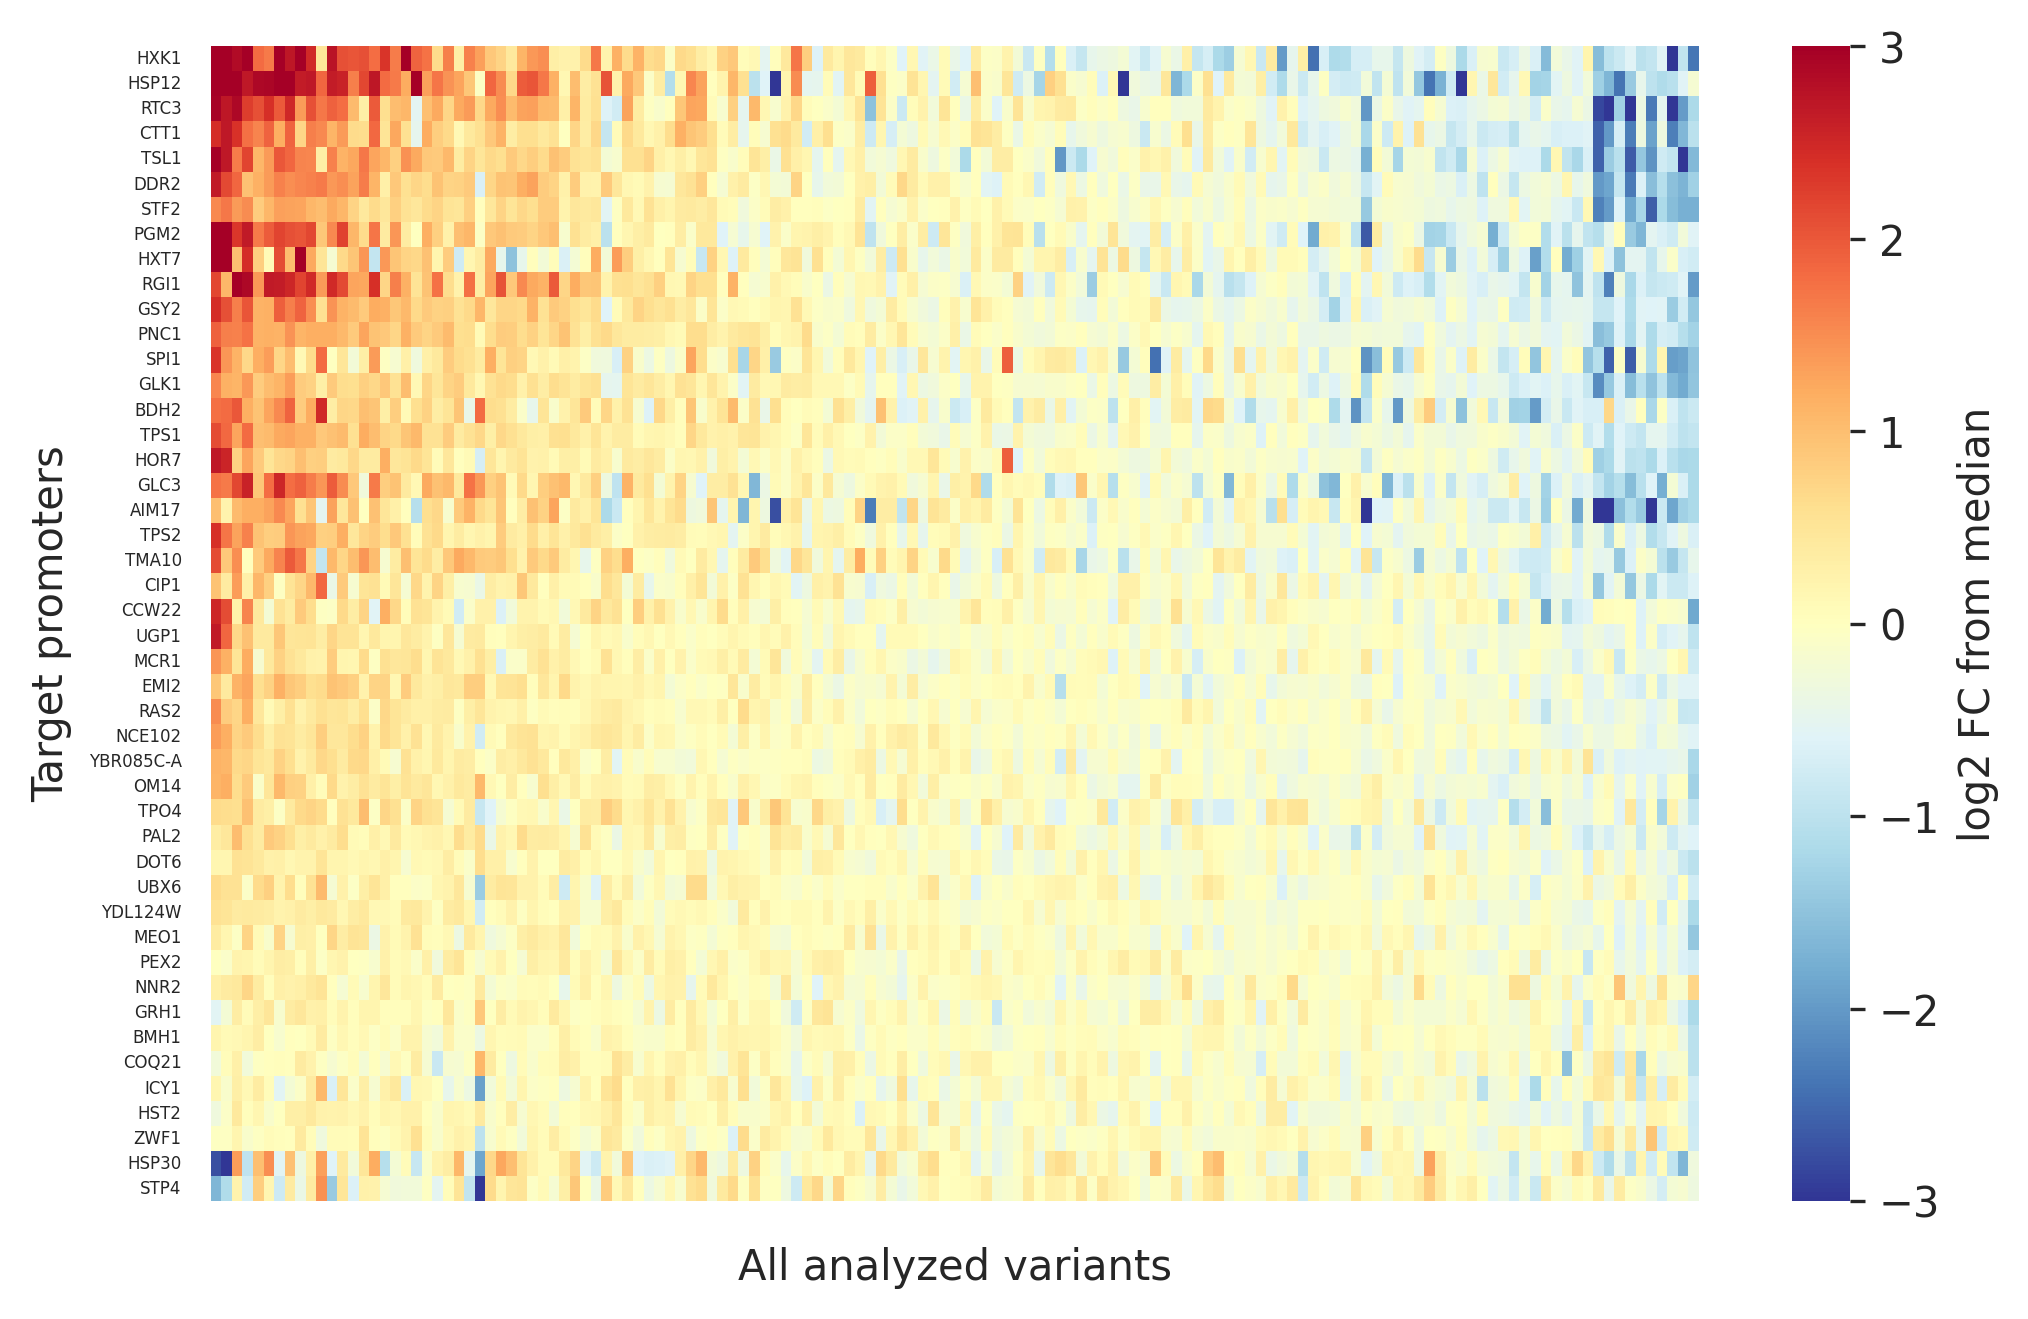

In [52]:
prb = ['G_is_placed_next_to_N',
 'G_P_deletion',
 'LIV_cluster1',
 'ED_shift1',
 'Msn2_Scramble30',
 'Msn2_dZF',
 'BY',
 'MotA_3rep1',
 'MotA_4rep1',
 'Msn2_Scramble10',
 'Msn2_dZF',
 'dMsn2',]

df = average.drop(prb, axis=1).loc[targets].copy()
df = df.loc[df.loc[(df.median(axis=1)>=4).values].index]
df = df.sub(df.median(axis=1), axis=0)
df = df.loc[:, df.median().sort_values(ascending=False).index]
df = df.loc[(df.iloc[:, :5].median(axis=1) - df.iloc[:, -5:].median(axis=1)).sort_values(ascending=False).index, :]

fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
sns.heatmap(df, cmap='RdYlBu_r', vmax=3, vmin=-3, ax=ax, square=False, cbar_kws={'label':'log2 FC from median'})
ax.set_xticklabels('')
ax.set_xlabel('All analyzed variants')
ax.set_yticks(np.arange(df.shape[0])+.5, df.index, size=4)
ax.set_ylabel('Target promoters')

fig.savefig('figures/Supp/clustering.pdf')
